In [1]:
# 手順と機能(ESPAR map)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 各要素の積のデータが用意できたら「 https://chemapps.stolaf.edu/jmol/swingjs/site/jvxlCoder.html 」に
# 　アクセスする。
# 4 Valuesに積のデータをリスト形式で入力し、積データのmin、maxも入力する。
# 5 Testを実行すると、データが変換されるので、escapedのデータを記録しておく。
# 6 Jvxlファイルのコピーをエディタで開く。 i-ESP mapとe-ESP mapのどちらでもよい。
# 7 jvxlColorDataのdataをescapedのデータで置き換える。また、max,minも変更
# 8 Jmolで表示

In [2]:
# 手順と機能(ESPAR plot)
# 1 Jmol上「getProperty isosurfaceInfo.vertexValues」で得たi-ESPとe-ESP mapの表面のESPデータのlistを作る。
# 2 それぞれの要素の積を計算する。→この結果をテキストファイルで出力する。min, maxもとる
# 3 int, exのデータをdfに変換
# 4 int, exのデータから相関プロットを作成（ヒストグラムつき）
# 4 積のデータについて、全体のmax, minを元に、4分割表示なら、上位75%<積<100%の範囲、中位50<積<75の範囲、
# 25<積<50の範囲、下位0<積<25の範囲を特定し、フラグをつける。または新たなdfを作成する。このとき、範囲に含まれないindexのデータは0にする。
# もとのESPAR plotを灰色で表示し、範囲ないのデータを赤で表示して重ねる。
# 5 この範囲外のデータが0のリストを作成し、ESPAR mapに投影する。

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# i-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たi-ESPデータ
int_list = [0.037759252, 0.034955494, 0.037506677, 0.038264446, 0.03684994, 0.03568802, 0.034728162, 0.034854464, 0.037860297, 0.036900453, 0.039552666, 0.039148517, 0.041396596, 0.04144711, 0.042230137, 0.031520255, 0.032909505, 0.0352081, 0.03806237, 0.040133618, 0.04253324, 0.0425585, 0.042634286, 0.031343438, 0.024346642, 0.029322691, 0.031040318, 0.0343998, 0.03962844, 0.04230591, 0.042508, 0.023664646, 0.026973598, 0.029853143, 0.032429583, 0.035662748, 0.038289703, 0.04056304, 0.040638812, 0.026670493, 0.026544191, 0.028135516, 0.031368695, 0.034425057, 0.037052013, 0.03957794, 0.03793607, 0.027983971, 0.029701583, 0.032252766, 0.035890095, 0.034652375, 0.033187352, 0.033237882, 0.037228815, 0.035814308, 0.04121978, 0.038491778, 0.041623928, 0.038769625, 0.041927032, 0.04015889, 0.04190176, 0.041876502, 0.042760573, 0.031924404, 0.028691225, 0.027529307, 0.028716482, 0.03394512, 0.04271006, 0.042912133, 0.04334154, 0.027933441, 0.026443161, 0.02525597, 0.02422034, 0.025710635, 0.031520255, 0.04303842, 0.042811103, 0.043467827, 0.026796795, 0.023487829, 0.022022806, 0.02313421, 0.042634286, 0.043265752, 0.02977737, 0.024750791, 0.021163993, 0.021239765, 0.040967174, 0.041497625, 0.032783203, 0.03002996, 0.021744959, 0.02015362, 0.024043538, 0.038921185, 0.040083118, 0.03935059, 0.03212648, 0.02977737, 0.024700262, 0.019471623, 0.020911388, 0.026342131, 0.029752113, 0.03237907, 0.034627132, 0.036294244, 0.035763793, 0.025988497, 0.020431466, 0.01929482, 0.022603758, 0.028817512, 0.030686699, 0.033187352, 0.057612978, 0.058118157, 0.057739265, 0.056299485, 0.056350015, 0.056072168, 0.058800153, 0.059103273, 0.058901183, 0.057410903, 0.056728907, 0.054910235, 0.055794306, 0.054682918, 0.058926456, 0.0580929, 0.058118157, 0.056855194, 0.05655209, 0.055971123, 0.05561749, 0.055188097, 0.056173198, 0.05624897, 0.055238612, 0.055314384, 0.055188097, 0.05561749, 0.056703635, 0.0543798, 0.053192608, 0.053647287, 0.05311685, 0.053975664, 0.056046896, 0.05511231, 0.052359052, 0.049858414, 0.05150024, 0.05127292, 0.051853873, 0.053849347, 0.050944544, 0.0481913, 0.04730723, 0.05127292, 0.05198016, 0.045943238, 0.04462976, 0.041346066, 0.04642316, 0.040689327, 0.045438044, 0.043189995, 0.046145312, 0.044503473, 0.044427685, 0.043189995, 0.043796204, 0.04372043, 0.043745674, 0.04278583, 0.037531935, 0.035763793, 0.03351573, 0.04243221, 0.04278583, 0.04278583, 0.034374528, 0.03245484, 0.031646557, 0.028943814, 0.04238168, 0.042811103, 0.04283636, 0.031798102, 0.02848915, 0.04159867, 0.03609217, 0.0288933, 0.04154814, 0.037607707, 0.037683494, 0.037254073, 0.03384409, 0.03935059, 0.037860297, 0.038264446, 0.038289703, 0.03604164, 0.03490498, 0.038491778, 0.03844125, 0.03808763, 0.038163416, 0.035890095, 0.034728162, 0.032909505, 0.035839565, 0.036875196, 0.03553646, 0.03793607, 0.03732986, 0.03692571, 0.03384409, 0.031798102, 0.028969072, 0.020557769, 0.019092731, 0.021315552, 0.026241086, 0.030257292, 0.031924404, 0.030863516, 0.033717804, 0.035789065, 0.03515757, 0.034273498, 0.03222751, 0.029979445, 0.030156262, 0.023462571, 0.021820731, 0.018057115, 0.017678224, 0.020911388, 0.017728753, 0.028868042, 0.033717804, 0.031621285, 0.021845989, 0.017930828, 0.017602451, 0.0572846, 0.058017112, 0.05738563, 0.05551646, 0.055541717, 0.055339642, 0.06127555, 0.061578654, 0.06097243, 0.05933059, 0.05933059, 0.053445213, 0.054935493, 0.05294002, 0.061982803, 0.05978527, 0.052712686, 0.054556616, 0.053041063, 0.061730213, 0.060315706, 0.05991154, 0.05511231, 0.05240958, 0.052081205, 0.045892723, 0.057966597, 0.05763822, 0.056602605, 0.050742485, 0.04561486, 0.04606954, 0.04478132, 0.05594585, 0.054935493, 0.0535715, 0.04821656, 0.046726264, 0.04561486, 0.046145312, 0.046145312, 0.051752843, 0.051247664, 0.051222406, 0.047357745, 0.048772268, 0.049782626, 0.050009973, 0.05147498, 0.048772268, 0.04874701, 0.04829233, 0.047105156, 0.048873298, 0.045311756, 0.044326656, 0.046246342, 0.0425585, 0.03962844, 0.043063678, 0.041472368, 0.03808763, 0.036370017, 0.035561718, 0.04079037, 0.04066407, 0.036950983, 0.03394512, 0.040108375, 0.039199032, 0.03935059, 0.039224304, 0.038188674, 0.03975474, 0.04015889, 0.03962844, 0.038769625, 0.03844125, 0.0389717, 0.037658222, 0.038769625, 0.038845412, 0.038921185, 0.035965867, 0.03839075, 0.038491778, 0.03343994, 0.03369253, 0.03834022, 0.037733994, 0.037885554, 0.031116106, 0.031747587, 0.03053514, 0.036622606, 0.03657209, 0.035890095, 0.029979445, 0.019168518, 0.020178892, 0.027276717, 0.020178892, 0.036370017, 0.034450315, 0.03379356, 0.032732688, 0.030787744, 0.029095374, 0.029297449, 0.022527985, 0.017526679, 0.016112156, 0.01656682, 0.019825257, 0.03207595, 0.030105732, 0.058446534, 0.061199777, 0.059280075, 0.05614794, 0.053773575, 0.050919287, 0.052763216, 0.051222406, 0.06200806, 0.06468553, 0.050363593, 0.052611656, 0.048115514, 0.06501391, 0.0652665, 0.06253851, 0.047635607, 0.051702328, 0.04228065, 0.043568857, 0.041497625, 0.06420561, 0.04553909, 0.041623928, 0.042760573, 0.042204864, 0.061401837, 0.044351913, 0.043568857, 0.057183556, 0.055213355, 0.043568857, 0.04551383, 0.045008652, 0.05435454, 0.053798847, 0.049226917, 0.048645966, 0.047862925, 0.048166044, 0.046448417, 0.04576642, 0.042204864, 0.041927032, 0.042659543, 0.043922506, 0.040916674, 0.03978, 0.039805256, 0.038996957, 0.039098002, 0.03967897, 0.03945162, 0.037506677, 0.03912326, 0.036774166, 0.037456147, 0.03882014, 0.03727933, 0.038794883, 0.034627132, 0.037456147, 0.033389427, 0.036774166, 0.031494997, 0.031873874, 0.03546069, 0.037456147, 0.02591271, 0.024851821, 0.03568802, 0.035081796, 0.01866334, 0.018638082, 0.03379356, 0.03336417, 0.03399565, 0.02884277, 0.022351183, 0.017450891, 0.01583431, 0.015606962, 0.016162671, 0.015505932, 0.03157077, 0.030131005, 0.028413378, 0.026897825, 0.020860888, 0.016390018, 0.014874466, 0.01512704, 0.0627911, 0.06375096, 0.06231118, 0.05857282, 0.054783948, 0.052055947, 0.049782626, 0.04950478, 0.06832286, 0.0688533, 0.06607478, 0.049429007, 0.041750215, 0.04718093, 0.039199032, 0.040234677, 0.039552666, 0.07132871, 0.040613554, 0.04106822, 0.04293739, 0.06948478, 0.04407405, 0.043164723, 0.045059167, 0.06607478, 0.043543614, 0.04518547, 0.062083848, 0.044857092, 0.044730805, 0.044882365, 0.05624897, 0.05465766, 0.046549447, 0.046473674, 0.047585078, 0.04755982, 0.04104296, 0.04422561, 0.041977547, 0.041927032, 0.040739857, 0.039173774, 0.04132081, 0.04111875, 0.03839075, 0.0379866, 0.040209405, 0.03546069, 0.03831496, 0.033136837, 0.038188674, 0.035864823, 0.03237907, 0.03498075, 0.028640695, 0.034071423, 0.02386672, 0.023336284, 0.033288382, 0.023967765, 0.019345336, 0.03245484, 0.032833733, 0.018587567, 0.01825919, 0.01681941, 0.03245484, 0.030914031, 0.031823374, 0.01532913, 0.016112156, 0.01532913, 0.030711956, 0.029019587, 0.026822053, 0.0253065, 0.025205456, 0.018562295, 0.015000753, 0.014217727, 0.014445044, 0.015202828, 0.06486235, 0.06604952, 0.058901183, 0.054253496, 0.05112136, 0.04910063, 0.041270293, 0.048166044, 0.037228815, 0.03962844, 0.037557177, 0.08077564, 0.08034622, 0.08006837, 0.07961369, 0.078906454, 0.07855282, 0.07880541, 0.079058, 0.073728316, 0.074637644, 0.03796134, 0.042659543, 0.040765114, 0.045059167, 0.0772646, 0.07728987, 0.07680995, 0.07787082, 0.08001784, 0.08024519, 0.04745879, 0.04566539, 0.048115514, 0.07395565, 0.07345047, 0.07428401, 0.076127954, 0.07698675, 0.0793611, 0.04844389, 0.049378477, 0.04958055, 0.072995804, 0.07572379, 0.0753449, 0.046397902, 0.050262548, 0.06948478, 0.046978854, 0.058370747, 0.044756047, 0.049302705, 0.0399063, 0.040184148, 0.03831496, 0.04217962, 0.042103834, 0.03250537, 0.039173774, 0.039047487, 0.03106559, 0.029550038, 0.038517036, 0.027049385, 0.036647864, 0.024397157, 0.036117427, 0.032757945, 0.022048078, 0.03146974, 0.020178892, 0.03043411, 0.020734586, 0.01825919, 0.029550038, 0.017804526, 0.017501421, 0.028817512, 0.029550038, 0.028817512, 0.017223574, 0.017046757, 0.027276717, 0.016642608, 0.016516306, 0.027251445, 0.025609605, 0.023816206, 0.022654288, 0.022022806, 0.015253343, 0.013308391, 0.013611503, 0.014899708, 0.015657492, 0.024624504, 0.024068795, 0.024068795, 0.026670493, 0.026721008, 0.027327232, 0.027680866, 0.027150415, 0.027074628, 0.027074628, 0.020987175, 0.022805832, 0.025180198, 0.026291601, 0.026822053, 0.02699887, 0.017779268, 0.01924429, 0.021947019, 0.023462571, 0.024573974, 0.025862195, 0.015026011, 0.014571346, 0.016693123, 0.018865414, 0.02068407, 0.021467112, 0.04657472, 0.046498932, 0.046549447, 0.04839336, 0.049681596, 0.05162654, 0.05294002, 0.055213355, 0.0138388425, 0.01578378, 0.020355709, 0.044276126, 0.04409931, 0.04409931, 0.047711365, 0.050767727, 0.05516284, 0.056223713, 0.05963371, 0.062917404, 0.039931558, 0.042129107, 0.046145312, 0.05112136, 0.056122668, 0.06160391, 0.066276856, 0.06807027, 0.06918166, 0.036142685, 0.039476894, 0.044857092, 0.050464623, 0.056451045, 0.0635994, 0.07286952, 0.07360201, 0.08274583, 0.08405932, 0.08244274, 0.07898223, 0.07956319, 0.076456316, 0.07713831, 0.07504179, 0.03669838, 0.03657209, 0.04245747, 0.048822783, 0.056072168, 0.06455923, 0.073829345, 0.07163181, 0.08671153, 0.08719144, 0.08522125, 0.0809777, 0.07956319, 0.07814867, 0.07504179, 0.077694006, 0.077517204, 0.06665576, 0.060694598, 0.06668102, 0.05561749, 0.04975737, 0.041724943, 0.036875196, 0.035738535, 0.038264446, 0.03783504, 0.043114208, 0.03945162, 0.042508, 0.04566539, 0.05420298, 0.06493812, 0.056274228, 0.08471606, 0.081735484, 0.07926007, 0.07857808, 0.08249325, 0.08201332, 0.07875488, 0.069863655, 0.08125556, 0.043695174, 0.04407405, 0.045791678, 0.04553909, 0.04601901, 0.045993753, 0.0454128, 0.054152466, 0.07915903, 0.077517204, 0.08042201, 0.08560013, 0.0844382, 0.047686107, 0.047105156, 0.046953596, 0.0470799, 0.07307158, 0.07350098, 0.07334944, 0.08034622, 0.086206354, 0.04829233, 0.047130413, 0.068777524, 0.068625964, 0.0698384, 0.07102559, 0.07441031, 0.08069985, 0.079335846, 0.049454264, 0.047585078, 0.06743879, 0.068903826, 0.06857545, 0.068423904, 0.07041936, 0.07395565, 0.049353234, 0.049075373, 0.06190703, 0.064155094, 0.062083848, 0.061376594, 0.047761895, 0.046120055, 0.052737944, 0.05268743, 0.043745674, 0.038845412, 0.052636914, 0.04288686, 0.030105732, 0.035864823, 0.038517036, 0.02833759, 0.025432788, 0.035182826, 0.03548593, 0.021972291, 0.03285899, 0.01939585, 0.030484624, 0.0288933, 0.01790557, 0.026746266, 0.017779268, 0.025685392, 0.018208675, 0.024902351, 0.018284462, 0.019926287, 0.024952866, 0.024068795, 0.021113463, 0.021315552, 0.023209997, 0.027150415, 0.022780575, 0.021290295, 0.020961918, 0.021366067, 0.020658813, 0.02015362, 0.016440518, 0.012828469, 0.012575887, 0.013182104, 0.014546089, 0.013131574, 0.017450891, 0.019471623, 0.012828469, 0.024851821, 0.024573974, 0.025079153, 0.024599232, 0.022957392, 0.020987175, 0.024472944, 0.024548717, 0.02684731, 0.027428262, 0.024144582, 0.026695766, 0.024018265, 0.024447687, 0.024195082, 0.02020415, 0.017577194, 0.020279922, 0.026721008, 0.025786422, 0.014419787, 0.01929482, 0.027150415, 0.02838812, 0.029145874, 0.029044844, 0.011312917, 0.01573328, 0.026493676, 0.02884277, 0.028766997, 0.04372043, 0.043922506, 0.04397302, 0.043947764, 0.045791678, 0.046195827, 0.048241816, 0.04947952, 0.008736484, 0.010150991, 0.014318764, 0.02411931, 0.025053896, 0.031343438, 0.031621285, 0.03748142, 0.03791081, 0.044831835, 0.044806577, 0.050338335, 0.055870093, 0.056829937, 0.05819393, 0.058547564, 0.0073724836, 0.005705379, 0.0071956664, 0.010403588, 0.0132578835, 0.014697649, 0.016288958, 0.021138735, 0.029954188, 0.03796134, 0.06402879, 0.06769138, 0.002472207, -0.0016702935, -0.00035681576, 0.0017649457, 0.0047202706, 0.009014338, 0.016945712, 0.02422034, 0.03543543, 0.07847703, 0.079386376, 0.079487406, 0.07675942, 0.080927186, 0.07749195, 0.07357677, 0.073980905, 0.07266744, -0.007303089, -0.009323828, -0.007303089, -0.0032868832, 0.002472207, 0.011237137, 0.018436007, 0.030333064, 0.08949005, 0.09158655, 0.089515306, 0.09194019, 0.08825233, 0.08188703, 0.07112662, 0.07468816, 0.071934916, -0.009829007, -0.007328354, -0.0004831031, 0.004669763, 0.0042150915, 0.012045436, 0.023361541, 0.035890095, 0.078199185, 0.092950545, 0.0936578, 0.07190966, 0.07744142, 0.07789608, 0.06306896, 0.06357414, 0.0517781, 0.043467827, 0.037405632, 0.03434927, 0.035410173, 0.04154814, 0.041649185, 0.04359413, 0.04245747, 0.04387199, 0.04452873, 0.0031036958, 0.006362118, 0.016061641, 0.028438635, 0.038618065, 0.06536753, 0.08466553, 0.08312472, 0.08506969, 0.08602954, 0.08481709, 0.085019164, 0.07865385, 0.04462976, 0.046246342, 0.046296857, 0.046221085, 0.0043919086, 0.010428846, 0.01247485, 0.020052575, 0.032101206, 0.029827885, 0.039274804, 0.04233118, 0.051954918, 0.050313078, 0.06577168, 0.08224066, 0.07958845, 0.046953596, 0.019370578, 0.04228065, 0.07370306, 0.0735515, 0.04591798, 0.06903011, 0.06832286, 0.06865122, 0.04556436, 0.06306896, 0.063397326, 0.0662516, 0.06849968, 0.046094798, 0.059027486, 0.051222406, 0.05311685, 0.05559223, 0.057663493, 0.061149247, 0.047206186, 0.04755982, 0.045741163, 0.044503473, 0.046044283, 0.047989227, 0.051247664, 0.04253324, 0.04205332, 0.040866144, 0.04253324, 0.047610335, 0.04402355, 0.03043411, 0.03250537, 0.026367389, 0.024498202, 0.028716482, 0.028514408, 0.021113463, 0.024649762, 0.019067474, 0.027781896, 0.023816206, 0.018890671, 0.022957392, 0.021871261, 0.020759843, 0.021719702, 0.020658813, 0.023487829, 0.023588873, 0.02303318, 0.023311026, 0.019673698, 0.025483318, 0.019143261, 0.01974947, 0.018991701, 0.025003381, 0.02596324, 0.017930828, 0.020002075, 0.017501421, 0.017652966, 0.017349862, 0.02659472, 0.026569448, 0.0261148, 0.01583431, 0.01232329, 0.011969656, 0.014268242, 0.012828469, 0.018840142, 0.024573974, 0.025937982, 0.018562295, 0.017930828, 0.02144184, 0.02015362, 0.024548717, 0.020431466, 0.019193776, 0.02313421, 0.019269548, 0.015985854, 0.0132578835, 0.019522138, 0.019067474, 0.020406209, 0.011287659, 0.010100484, 0.011792839, 0.021012433, 0.02566012, 0.021037705, 0.006362118, 0.011742316, 0.020860888, 0.025937982, 0.025836952, 0.004088804, 0.008534417, 0.029499508, 0.028817512, 0.034475558, 0.030939288, 0.039830513, 0.037557177, 0.039072745, 0.040916674, 0.044579245, 0.04958055, 0.048923813, 0.0031542107, 0.0030531734, 0.05038885, 0.058219187, 0.0014618337, 0.0030026585, 0.06269007, 0.069409005, 0.07052039, -0.009172268, -0.008641824, -0.0038173199, 0.08698938, 0.07880541, 0.087343, 0.081786, 0.07345047, 0.06971211, 0.0682976, 0.06948478, 0.06807027, -0.011294037, -0.01573965, -0.013542108, -0.010612041, 0.09247062, 0.08996997, 0.06855019, 0.07178337, 0.06963634, -0.01889705, -0.019427486, -0.017381497, -0.0145777315, -0.010435231, -0.004474066, 0.003911987, 0.07062144, 0.07708778, 0.06973737, 0.060593538, 0.06304369, 0.04834286, 0.04041148, 0.035258614, 0.033263125, 0.035991125, 0.040487252, 0.040386222, 0.04205332, 0.043013178, 0.044579245, 0.044579245, -0.020842008, -0.020614669, -0.020134747, -0.017305724, -0.011218265, -0.0026806667, 0.08544857, 0.07034358, 0.04510968, 0.045867465, -0.01798772, -0.011698186, -0.01101619, -0.0077072456, 0.00080509484, 0.009999432, 0.031798102, 0.05192966, 0.065948494, 0.08547383, 0.08408456, 0.08529701, 0.0454128, -0.009323828, -0.003741555, -0.0036405176, 0.0047960505, 0.013333648, 0.022654288, 0.032934763, 0.04869648, 0.034172453, 0.06660523, 0.07539541, 0.045438044, 0.045715906, 0.04591798, -0.003665775, 0.0027500615, 0.010277286, 0.019446366, 0.032328553, 0.068625964, 0.0682976, 0.0454128, 0.045337014, 0.053798847, 0.056375273, 0.04344257, 0.04344257, 0.046448417, 0.044553988, 0.04950478, 0.043392055, 0.044175096, 0.038491778, 0.04005786, 0.043644644, 0.04253324, 0.04253324, 0.04260903, 0.036774166, 0.03384409, 0.034652375, 0.03669838, 0.03791081, 0.03957794, 0.04359413, 0.04240694, 0.03194966, 0.03285899, 0.030004688, 0.026872568, 0.025710635, 0.025028639, 0.025710635, 0.02540753, 0.024649762, 0.024776049, 0.020305179, 0.01990103, 0.023563616, 0.022174366, 0.017652966, 0.02149237, 0.014697649, 0.023689903, 0.015026011, 0.025735907, 0.0150765255, 0.016465776, 0.0150765255, 0.023689903, 0.025685392, 0.016996227, 0.014596604, 0.025584348, 0.025584348, 0.014445044, 0.016011126, 0.012803212, 0.0270999, 0.012550615, 0.009948917, 0.012601137, 0.009696335, 0.026670493, 0.027428262, 0.027807154, 0.009721592, 0.012752689, 0.019067474, 0.025230713, 0.026190571, 0.027301975, 0.026973598, 0.0103783235, 0.010226771, 0.011439204, 0.013308391, 0.014495574, 0.014520831, 0.014141947, 0.012929507, 0.017981328, 0.0138388425, 0.005326487, 0.013485208, 0.019572653, 0.009216413, 0.004897088, 0.0008808747, 0.009064853, 0.019496895, 0.013030544, 0.015228085, 0.014546089, -0.00088725984, 0.026645236, 0.018309705, 0.027706124, 0.020380951, 0.03096456, 0.027882941, 0.034071423, 0.033818834, -0.0019228905, 0.034803934, 0.038592808, 0.04382146, 0.047231443, 0.045059167, -0.0024785995, 0.0027247965, 0.055339642, 0.05609741, 0.05559223, -0.009980559, -0.0067979023, 0.067969225, -0.015436545, -0.015057653, 0.08719144, 0.088984855, 0.07544594, 0.07004047, 0.06665576, 0.06511494, 0.065443315, -0.016244836, -0.019099124, -0.016800538, 0.064306654, 0.05869911, 0.0645845, 0.056324743, -0.021473482, -0.021448225, -0.019755855, 0.056223713, 0.06860071, 0.05998733, 0.060593538, 0.04606954, 0.058320217, 0.03791081, 0.033414684, 0.03222751, 0.036066897, 0.03844125, 0.038618065, 0.040461995, 0.04159867, 0.04308895, -0.021599777, -0.02407518, -0.024100438, -0.02303955, -0.02099356, 0.06051778, 0.043518357, 0.044402428, -0.025489695, -0.025944352, -0.02407518, -0.023266882, -0.016825803, 0.08547383, 0.043922506, 0.045210727, 0.043947764, -0.02329214, -0.01937697, -0.016724765, -0.011900261, 0.044604503, 0.06375096, 0.053773575, 0.073374696, 0.07572379, 0.044301398, -0.013441071, -0.007580936, -0.0071010143, -0.00017999858, 0.0074482635, 0.015303858, 0.024144582, 0.03935059, 0.0243719, 0.058926456, 0.059886284, 0.04359413, -0.001114592, 0.005654864, 0.013737805, 0.024094053, 0.046776794, 0.04657472, 0.04159867, 0.03808763, 0.043947764, 0.041371323, 0.041699685, 0.031924404, 0.033818834, 0.041472368, 0.04144711, 0.030737214, 0.027857684, 0.030509882, 0.035258614, 0.034273498, 0.026695766, 0.023841463, 0.023891978, 0.02581168, 0.025533818, 0.024447687, 0.03222751, 0.02750405, 0.023790948, 0.020355709, 0.016061641, 0.012575887, 0.006766267, 0.0074735135, 0.01775401, 0.025331758, 0.022831105, 0.004442431, 0.002699539, 0.0046192408, 0.02659472, 0.023917235, 0.007675603, 0.010049954, 0.007423006, 0.026342131, 0.026771523, 0.014015645, 0.0070693716, 0.026872568, 0.007296711, 0.027200945, 0.007423006, 0.013308391, 0.007094629, 0.02566012, 0.02735249, 0.0068925545, 0.01088351, 0.006766267, 0.02735249, 0.02874174, 0.0070693716, 0.009898394, 0.009797372, 0.015505932, 0.028868042, 0.029044844, 0.016187929, 0.022426955, 0.025129683, 0.026544191, 0.028211303, 0.028438635, 0.008559674, 0.008584924, 0.01224751, 0.008534417, 0.0036341324, 0.0031036958, 0.007347226, 0.008509159, 0.008483887, 0.0064378977, 0.0011587292, 0.0036846548, -0.0003315583, -0.0029079989, -0.0016702935, 0.008736484, 0.00052725524, 0.00065355, 0.0005777776, -0.0029585063, -0.007303089, 0.006943077, 0.012196995, 0.008610196, 0.011944398, 0.011413947, -0.008187167, 0.013156846, 0.02015362, 0.033237882, 0.027251445, -0.0078082755, 0.030914031, 0.039375864, 0.039931558, -0.015663877, 0.050565667, 0.05152551, -0.019427486, 0.051070847, 0.06271533, -0.020614669, 0.08186177, 0.08678732, 0.07236434, 0.08150814, 0.067236714, 0.0645845, 0.058370747, 0.05299055, 0.059254818, 0.049807884, -0.02132193, -0.020261042, 0.084615014, 0.049353234, 0.046726264, 0.053495727, 0.04569065, -0.021751337, -0.021978669, 0.046094798, 0.059153788, 0.044301398, 0.03394512, 0.030131005, 0.029802628, 0.034222983, 0.036268987, 0.037203558, 0.038668595, 0.040714584, 0.040967174, -0.023721546, -0.023847848, -0.024100438, 0.04243221, 0.04233118, -0.025969617, -0.026904203, -0.027131535, -0.026348509, 0.042962648, 0.04372043, -0.027560942, -0.028369233, -0.025969617, -0.023595259, -0.020715706, 0.05991154, 0.041825987, 0.041825987, -0.021776594, -0.017305724, -0.0154618025, -0.007656716, 0.034803934, 0.055642746, 0.03930006, 0.053849347, 0.04111875, -0.01581543, -0.010384716, -0.004575096, 0.0016891807, 0.009140633, 0.018840142, 0.033288382, 0.041497625, 0.04652419, 0.04041148, 0.040487252, 0.04111875, 0.03172233, 0.03450083, 0.03957794, 0.027226202, 0.024776049, 0.040689327, 0.039426364, 0.020305179, 0.021265022, 0.036496304, 0.020027332, 0.017627709, 0.017602451, 0.031116106, 0.029347949, 0.0152786, 0.012676917, 0.011717059, 0.010327809, 0.0063115954, 0.029979445, 0.029600553, 0.008003965, 0.002952136, -0.0065705776, -0.007985085, -0.0018723682, 0.029802628, 0.03002996, -0.007884048, -0.003665775, 0.0042908713, 0.028312333, 0.027226202, 0.0042150915, 0.003937237, 0.003608875, 0.027706124, 0.02818603, 0.006210558, 0.003836207, 0.028564923, 0.0040382743, 0.0049223453, 0.0048465803, 0.028640695, 0.029499508, 0.028110258, 0.0060084835, 0.0062610805, 0.011388697, 0.011363439, 0.011792839, 0.029853143, 0.020456739, 0.016339488, 0.022426955, 0.030560412, 0.030509882, 0.022906877, 0.025685392, 0.027857684, 0.029297449, 0.030131005, 0.008433379, -0.00068517774, 0.00062829256, -0.0024028197, 0.0034825876, 0.004088804, -0.0003315583, -0.0054339096, -0.008793384, -0.0101573765, -0.0069747195, -0.010031082, -0.0036405176, -0.009500638, -0.008970194, -0.0062674657, -0.010889895, -0.013592623, -0.0030595586, -0.00096303225, 0.0025479794, 0.01073195, 0.0072714463, -0.020437859, 0.008711234, 0.016541563, 0.02361413, 0.019143261, -0.026777908, -0.02912701, -0.024807699, 0.027403004, 0.030813001, -0.030061595, -0.021347187, 0.0425585, -0.026399024, -0.022307038, 0.047534548, 0.05602164, -0.023569994, -0.023241624, 0.07132871, 0.06753983, 0.07110136, 0.05847179, 0.05253587, 0.047862925, 0.04437717, 0.041497625, 0.04829233, 0.040108375, -0.022433333, -0.02099356, 0.07981577, 0.038794883, 0.035763793, 0.03732986, 0.035561718, -0.020160012, -0.021524005, 0.035662748, 0.040386222, 0.03002996, 0.0243719, 0.024675004, 0.025053896, 0.025079153, 0.032404326, 0.03369253, 0.034601875, 0.03369253, 0.0363195, 0.036799423, 0.040537782, -0.020463116, -0.021220893, -0.023822583, 0.035637505, 0.02838812, 0.030787744, 0.03361676, 0.03667312, 0.03836549, 0.03930006, 0.041421853, -0.022408076, -0.024201475, -0.025742285, 0.04005786, 0.039855786, -0.024883471, -0.02708102, -0.027535684, -0.027106278, -0.025489695, 0.0399063, 0.04144711, -0.02528762, -0.022130221, -0.021448225, 0.05420298, 0.05372306, 0.05412721, 0.039375864, 0.040689327, -0.017154165, -0.01248122, -0.012304403, -0.0053581297, 0.0013608038, 0.008231305, 0.015758522, 0.0298784, 0.016945712, 0.038921185, 0.038011856, -0.012354925, -0.0076819733, -0.0022260025, 0.0052002, 0.015354387, 0.025786422, 0.03839075, 0.038542308, 0.039274804, 0.016895197, 0.01990103, 0.037102528, 0.015202828, 0.011489734, 0.036344744, 0.03543543, 0.035662748, 0.010226771, 0.009292193, 0.017223574, 0.03808763, 0.034172453, 0.00931745, 0.008736484, 0.008357599, 0.011489734, 0.035814308, 0.034955494, 0.005957976, 0.0027247965, -0.0022260025, -0.010233149, -0.009677455, 0.03477869, 0.031697072, 0.031267665, -0.011773959, -0.013516843, -0.009551153, -0.009374343, 0.031166635, 0.02972684, -0.0015439913, 0.008963816, 0.005402267, 0.0073977485, 0.029979445, 0.028211303, 0.004114054, 0.0077766404, 0.0077008605, 0.007902928, 0.030282564, 0.028539665, 0.006210558, 0.013737805, 0.0132831335, 0.015455417, 0.030484624, 0.020431466, 0.020229392, 0.021290295, 0.031116106, 0.03101506, 0.030939288, 0.022856362, 0.023184724, 0.025357015, 0.030585669, 0.030383594, 0.030585669, 0.02596324, 0.027680866, 0.029827885, -0.011799224, -0.009601675, -0.008566052, -0.014072552, -0.013769433, -0.014148325, -0.007985085, -0.009424865, -0.006747395, -0.008768119, -0.015714392, -0.017204687, -0.016851053, -0.09326004, -0.09540707, -0.093159005, -0.086515844, -0.013744175, -0.02124615, -0.016522683, -0.012759075, -0.10109039, -0.104929775, -0.0979835, -0.08729888, -0.07898861, -0.071511894, -0.05436092, -0.049839526, -0.025717027, -0.012430705, -0.008944936, -0.004701391, 0.0007040724, 0.005402267, 0.0023459047, -0.105005555, -0.10455089, -0.10194919, -0.09361367, -0.081817634, -0.06393415, -0.036325872, 0.007246189, 0.01239907, -0.101519786, -0.0981098, -0.089041755, -0.0763364, -0.05711417, 0.016187929, 0.021997549, -0.09586173, -0.09376522, -0.08414148, -0.07072886, -0.05069834, 0.030762486, 0.035612248, 0.032176994, -0.091870785, -0.083282664, -0.07883705, -0.064590886, -0.043549992, 0.043770947, -0.0775741, -0.061534524, -0.03933171, -0.03359788, 0.060012586, 0.05243484, 0.059204303, 0.046195827, 0.042078577, 0.039199032, 0.037228815, 0.034702905, 0.032429583, -0.023544736, -0.021119855, 0.06410458, 0.03212648, 0.027731381, 0.026140057, -0.018215045, -0.016724765, 0.022527985, 0.033187352, 0.020103104, 0.024195082, 0.025053896, 0.034374528, -0.015209205, -0.015714392, 0.015960597, 0.015708007, 0.01775401, 0.024043538, 0.03002996, 0.03172233, 0.03361676, 0.03386935, 0.03692571, -0.018796012, -0.019402236, 0.03376832, 0.035789065, 0.036016382, 0.039072745, -0.021902889, -0.023873106, -0.02425199, -0.027131535, 0.0361932, 0.037733994, -0.024807699, -0.022761695, -0.021422967, -0.021978669, 0.054076694, 0.036167942, 0.03743089, -0.020791486, -0.017533049, -0.016244836, 0.024826579, 0.036774166, 0.03654682, 0.037658222, -0.014148325, -0.009955309, -0.004953988, -0.0012661368, 0.0022196174, 0.010252029, 0.00974685, 0.019067474, 0.037052013, 0.037860297, 0.03887067, 0.0023206472, 0.002699539, 0.035182826, 0.036900453, 0.0021438375, 0.0003251806, -2.8446317e-05, 0.035738535, 0.036167942, 0.035991125, 0.0008556172, 0.00067881495, 0.0408914, 0.03967897, 0.0011839867, 0.0027500615, 0.005654864, 0.04238168, 0.04503391, 0.043543614, 0.03912326, 0.0027500615, 0.0022196174, 0.00045147538, -0.0032363608, -0.009424865, 0.042255394, 0.037380375, 0.034652375, 0.03343994, -0.01273381, -0.014729284, -0.013794698, -0.00965219, 0.019193776, 0.018233933, 0.019016959, 0.028160773, 0.028059743, 0.02818603, 0.032757945, 0.031217135, 0.030610926, -0.011470854, -0.004448794, 0.0059832335, 0.011388697, 0.019168518, 0.026241086, 0.030813001, 0.030838259, 0.01512704, 0.027125157, 0.024472944, 0.024877079, 0.030762486, 0.030863516, 0.021088205, 0.02288162, 0.030863516, 0.030914031, 0.023437329, 0.023209997, 0.024700262, 0.030787744, 0.030257292, 0.030888774, 0.025937982, 0.026089527, 0.028034486, 0.028211303, 0.029802628, 0.029928915, -0.016648985, -0.016396396, -0.011597149, -0.017735124, -0.019351713, -0.01995793, -0.105813846, -0.10846606, -0.10515711, -0.099802166, -0.09793299, -0.08969849, -0.08717258, -0.073936775, -0.07381048, -0.073381074, -0.01978112, -0.02278696, -0.016345873, -0.020488374, -0.021953411, -0.022130221, -0.109299615, -0.11058783, -0.10796087, -0.10205023, -0.07987268, -0.062822744, -0.04648006, -0.039028607, -0.026803166, -0.022029184, -0.019174896, -0.014754549, -0.018972829, -0.110613085, -0.109627984, -0.108971246, -0.10513185, -0.015335508, -0.010511003, -0.0051560625, -0.0027311817, -0.10798614, -0.10667266, 0.0010576919, 0.0064126328, -0.10556126, -0.10359104, 0.008963816, 0.014722891, -0.102100745, -0.09982742, 0.021189265, 0.023664646, -0.09656899, -0.095508106, -0.0888902, 0.034273498, -0.09320952, -0.086187474, -0.08315637, -0.07244648, -0.057619352, -0.03700787, 0.05008573, 0.041699685, 0.048418634, 0.036066897, 0.033010535, 0.031217135, 0.030080475, 0.028034486, 0.025887452, -0.08118616, -0.06706628, -0.049637455, -0.04564651, -0.031147748, 0.053925134, 0.025508575, 0.020380951, 0.018461265, -0.027990349, -0.02667687, -0.018114015, 0.012676917, 0.009847887, -0.025565468, -0.017179422, -0.016522683, -0.015007138, 0.0046192408, 0.0031036958, 0.0043413863, 0.013207354, 0.023664646, 0.030004688, 0.030838259, -0.016118541, -0.0128095895, -0.011672929, -0.011698186, 0.007018864, 0.014924966, 0.01712253, 0.02899433, 0.030105732, 0.03253063, 0.03503128, -0.01589121, -0.018265568, -0.019174896, 0.016895197, 0.02581168, 0.02818603, 0.03043411, 0.032000177, 0.034601875, -0.018265568, -0.01945275, -0.017103642, -0.017861426, 0.033061065, 0.033642016, 0.03376832, 0.035081796, -0.017785646, -0.016522683, -0.016042762, 0.03333891, 0.03394512, 0.037658222, 0.035965867, -0.015032396, -0.014400922, -0.014527209, -0.009121746, -0.0035899952, 0.00211858, 0.008408122, 0.034425057, 0.0361932, -0.014072552, -0.0131127015, -0.011243522, -0.010990933, -0.0069747195, 0.036748894, 0.03513231, -0.01101619, -0.011294037, -0.0154618025, -0.012026556, -0.0017713308, 0.03821393, 0.041977547, 0.039552666, -0.01644691, -0.016295359, -0.016169056, -0.0054844245, 0.04851968, 0.05006049, 0.048115514, 0.041699685, -0.011900261, -0.0048529506, -0.001695551, 0.052737944, 0.05218225, 0.051727585, 0.048267074, -0.001442954, 0.00017362088, 0.00065355, -0.00050837547, -0.0071515366, 0.045160197, 0.043467827, 0.0434931, 0.044655018, 0.043947764, 0.039830513, 0.035713278, -0.010334186, -0.012986399, -0.011546634, 0.020759843, 0.018334962, 0.03351573, 0.0335915, 0.039047487, 0.036799423, 0.03394512, 0.03285899, 0.031697072, -0.009702712, -0.0024280697, 0.008155525, 0.028110258, 0.031343438, 0.030762486, 0.03189913, 0.030838259, 0.030686699, 0.030509882, 0.031166635, 0.026468419, 0.027251445, 0.027706124, 0.029221661, 0.029272191, 0.030711956, 0.02376569, 0.026215829, 0.028135516, 0.02745352, 0.029524766, 0.030484624, 0.02540753, 0.027731381, 0.029272191, -0.10697577, -0.10879443, -0.10684947, -0.102252305, -0.10164608, -0.09414411, -0.093159005, -0.08446985, -0.019301198, -0.020766228, -0.01995793, -0.021877632, -0.021978669, -0.110360496, -0.1102342, -0.110512055, -0.10960272, -0.10945117, -0.08224704, -0.063555256, -0.057770904, -0.048475534, -0.024049915, -0.026323244, -0.0202863, -0.01970534, -0.023266882, -0.025237098, -0.025818065, -0.10937539, -0.10935013, -0.10942591, -0.11058783, -0.031905517, -0.02586858, -0.024024665, -0.022761695, -0.10770828, -0.10924909, -0.023822583, -0.019654825, -0.014855586, -0.009222783, -0.008187167, -0.10611696, -0.10791036, -0.0032868832, 0.00047674775, -0.10419726, -0.10556126, 0.0038867295, 0.00787767, -0.1016966, -0.102252305, 0.015202828, 0.015606962, -0.09831187, -0.09818558, 0.025180198, -0.095432326, -0.09209812, -0.089925826, 0.03935059, 0.03250537, 0.035839565, 0.025786422, 0.023538344, 0.02262903, 0.022098579, 0.021037705, 0.020077847, -0.085783325, -0.079215944, -0.07583121, -0.064590886, -0.048374496, 0.041194506, 0.018486522, 0.0132578835, 0.013081066, -0.0737347, -0.05873076, -0.03998846, -0.038397126, 0.005579084, 0.0068925545, -0.037841424, -0.023696288, -0.021599777, 0.0047708005, -0.0038173199, -0.005711749, -0.0057370216, -0.020058967, -0.013819955, -0.013643146, -0.012380183, -0.011672929, -0.0026806667, 0.00065355, -0.013491586, -0.011698186, -0.010814115, -0.009829007, -0.009450123, -0.017204687, -0.010031082, 0.0067410097, 0.009721592, 0.02525597, -0.010738336, -0.008389235, -0.011698186, 0.018461265, 0.023260511, -0.012127593, -0.013643146, -0.014325142, 0.026518948, 0.026746266, 0.032732688, -0.019579045, -0.019629568, -0.014779799, 0.027301975, 0.033389427, 0.034551345, -0.020816743, -0.020513639, -0.018038236, -0.014148325, 0.040714584, 0.037304603, -0.0202863, -0.01995793, -0.019149639, -0.020892523, -0.019553788, 0.04154814, 0.047862925, 0.04617057, -0.022509106, -0.02450458, -0.023393176, -0.016623728, 0.052889504, -0.024428807, -0.023721546, -0.019932672, -0.01970534, -0.01248122, 0.055238612, 0.055314384, -0.014072552, -0.0050802827, 0.00095665455, 0.0035078377, 0.005326487, -0.004373029, 0.053419955, 0.049378477, -0.0051055327, -0.008616567, -0.0047519132, -0.0070504993, 0.0021691024, 0.017501421, 0.012525357, 0.01573328, 0.031040318, 0.044932865, 0.0046445057, 0.030888774, 0.028665952, -0.10849132, -0.10879443, -0.10950168, -0.10644533, -0.102656454, -0.095836475, -0.08580858, -0.08280274, -0.07065308, -0.07009739, -0.068985984, -0.02099356, -0.021978669, -0.10871865, -0.10748095, -0.044913985, -0.039154895, -0.025009766, -0.01995793, -0.019301198, -0.020589411, -0.022332296, -0.024529845, -0.026550576, -0.026954725, -0.10737991, -0.10586436, -0.027763017, -0.027384132, -0.104601406, -0.10399519, -0.1047277, -0.025338136, -0.022281773, -0.017836168, -0.014400922, -0.010435231, -0.102504894, -0.105005555, -0.012279145, -0.0066210926, -0.005686499, -0.10088831, -0.10356578, -0.00038206577, 0.0008303672, -0.09896861, -0.1003326, 0.0075745657, 0.014672391, -0.09720047, -0.09636692, 0.011994913, 0.015228085, -0.09199708, -0.092123374, 0.018966444, 0.034172453, 0.016238458, 0.015606962, 0.012575887, 0.01239907, 0.013409428, 0.013636768, 0.015354387, -0.089269094, -0.08340897, -0.08242386, 0.013358913, 0.011641279, 0.00941848, 0.012777954, -0.0797969, -0.06747043, -0.0616103, -0.053931512, 0.0068167895, 0.0025732443, -0.051759224, -0.029783756, -0.028950192, -0.0015945137, -0.009323828, -0.010308929, -0.007757753, -0.016851053, -0.016472168, -0.011142485, -0.008616567, -0.007328354, -0.012380183, -0.01094041, -0.01086463, -0.010485746, -0.009601675, -0.00836397, 0.0017396882, 0.0007040724, -0.00010421872, 0.002952136, -0.00785879, -0.00083673745, 0.003836207, -0.01094041, -0.010965668, -0.009677455, -0.0065705776, 0.005654864, -0.0012914091, -0.007884048, -0.0033373982, 0.002952136, 0.0082818195, -0.014628246, -0.014602989, 0.018334962, -0.018593937, -0.02182711, -0.019654825, 0.029044844, 0.03172233, -0.02374681, -0.02425199, -0.022130221, 0.040285178, 0.04056304, -0.024428807, -0.023898363, -0.023544736, -0.023367919, -0.022130221, 0.052005433, -0.023569994, -0.023519479, -0.026626348, -0.02667687, 0.06352361, 0.065291755, 0.061553396, -0.027409382, -0.026474796, -0.025489695, -0.02003371, 0.07433454, -0.02604539, -0.022610143, -0.017128907, -0.0095764175, 0.00022415072, 0.011868618, 0.014950238, 0.005579084, -0.0038425773, -0.0009377748, 0.07148027, 0.067514576, 0.061048217, 0.07415772, -0.00071044266, 0.004088804, 0.016491048, 0.0050486475, 0.033490457, 0.057183556, -0.10455089, -0.10487926, -0.10495503, -0.101342976, -0.10222705, -0.095356554, -0.09593751, -0.09131508, -0.10568755, -0.10515711, -0.107607245, -0.1058391, -0.086667396, -0.072724335, -0.060246307, -0.10391941, -0.10285852, -0.10692525, -0.05069834, -0.031097226, -0.019856893, -0.0151586905, -0.018215045, -0.021145113, -0.023443699, -0.02450458, -0.026525319, -0.100787275, -0.10073675, -0.101216674, -0.026222207, -0.027207315, -0.027232572, -0.09861498, -0.023974136, -0.022130221, -0.021700814, -0.01824031, -0.097048916, -0.018543422, -0.014097802, -0.011950776, -0.007656716, -0.095583886, -0.009172268, -0.005787529, -0.0010135546, -0.093916774, -0.0025796294, 0.00014837086, -0.09199708, -0.09530603, 0.0005525127, 0.0017396882, -0.09050679, -0.0883345, 0.0028763562, -0.00023052096, -0.001367189, 0.00037569553, 0.003027916, 0.005250722, 0.009292193, -0.08308059, -0.08191867, 0.0008808747, 0.0022196174, 0.0036846548, 0.0053517446, 0.0051244274, 0.0068167895, -0.07375996, -0.06699051, -0.06504555, 0.004897088, 0.0022953972, 0.002472207, -0.06135771, -0.04519184, -0.030920409, -0.029278569, 0.0016639084, -0.0020744428, -0.0038173199, -0.010031082, -0.024555102, -0.018038236, -0.016648985, -0.004549831, -0.011420339, -0.012582257, -0.012455963, -0.014880836, -0.012102336, -0.012077078, 0.0017902106, 0.02020415, 0.014116697, 0.009645812, 0.018562295, -0.0122286305, -0.006999977, -0.006924197, -0.012279145, -0.011950776, -0.0104604885, -0.0061411634, 0.0015376136, 0.00075458735, -0.0009125173, -0.0067726523, 0.0025732443, 0.005326487, -0.0027311817, -0.012582257, 0.015303858, 0.01543016, -0.021625042, -0.022079699, 0.018638082, 0.03053514, -0.026247464, -0.026373759, 0.04849442, 0.049125887, 0.049024858, -0.026525319, -0.025489695, -0.025237098, 0.0699647, 0.06316999, -0.025388658, -0.024150953, -0.02278696, -0.025009766, -0.026500061, 0.08762086, -0.025413916, -0.025717027, -0.025641248, 0.021366067, 0.019623183, 0.019976817, 0.019774742, 0.06453397, -0.02425199, -0.020261042, -0.014678769, -0.007328354, -0.0022512525, 0.002699539, 0.010832988, -0.010283671, 0.060164146, 0.06175547, 0.039982073, -0.017229944, -0.024176218, -0.022180736, -0.001619786, 0.011792839, 0.012020163, 0.027680866, 0.009519517, -0.024378292, -0.02149874, -0.011243522, 0.006210558, -0.101999715, -0.10283326, -0.09929698, -0.09389152, -0.085859105, -0.08593488, -0.08555599, -0.102100745, -0.101039864, -0.10290904, -0.07292641, -0.055977505, -0.09970113, -0.09783195, -0.05256752, -0.032739073, -0.02157452, -0.015082918, -0.011849746, -0.012834847, -0.018012978, -0.022862732, -0.09591225, -0.09517974, -0.011470854, -0.016093284, -0.019806378, -0.022837482, -0.022938512, -0.027182057, -0.092603296, -0.022887997, -0.022610143, -0.021776594, -0.023165852, -0.022079699, -0.09083516, -0.01978112, -0.020008452, -0.018038236, -0.017684609, -0.014830321, -0.089193314, -0.014830321, -0.011824481, -0.009980559, -0.08757673, -0.010662556, -0.010031082, -0.00965219, -0.085783325, -0.009753227, -0.009424865, -0.08376259, -0.082828, -0.009197526, -0.012253888, -0.014173582, -0.013314769, -0.006873682, -0.013163216, -0.077346765, -0.07967061, -0.010031082, -0.006166436, -0.003994137, 0.001562871, -0.07689209, -0.06789984, -0.064843476, -0.004953988, -0.0017460734, -0.00012948364, 0.000981912, -0.055396542, -0.039003342, -0.029152267, 0.00022415072, 0.0007293299, 0.00037569553, -0.020488374, -0.017078392, 0.0015881434, -0.00030630082, -0.004474066, -0.011167742, -0.013971515, -0.01273381, -0.012178116, 0.017829783, -0.0038678348, -0.009500638, -0.008970194, -0.008970194, -0.013087437, -0.01402203, -0.014501959, -0.016295359, -0.0154618025, -0.011976033, -0.007328354, -0.0012661368, -0.0066968724, -0.00040733814, 0.00022415072, -0.016598463, -0.016219579, -0.012506478, -0.013668396, -0.014628246, -0.012935884, 0.015303858, 0.015101783, -0.022206001, -0.022483855, -0.022104964, 0.018082388, 0.037557177, 0.03096456, -0.025085539, -0.026373759, -0.026601098, 0.049125887, -0.026449539, -0.026474796, -0.025565468, 0.042760573, -0.024908729, -0.021902889, -0.018922307, -0.020463116, 0.034121938, -0.021220893, -0.021170378, -0.023721546, 0.01964844, 0.022831105, -0.021119855, -0.01882127, -0.014476694, -0.013668396, -0.013592623, -0.00836397, -0.0047266483, -0.0040951744, -0.008338712, -0.012961149, 0.006715752, 0.0063368604, -0.011874996, -0.011445589, -0.013238996, -0.017128907, -0.025641248, -0.031956032, -0.035795435, -0.035618618, -0.01402203, -0.014047287, -0.04665687, -0.055977505, -0.057392016, -0.057442535, -0.052946404, -0.05696261, -0.043019548, -0.030617304, -0.014047287, -0.058377128, -0.0981098, -0.098665506, -0.09586173, -0.09086042, -0.083813116, -0.08401518, -0.097048916, -0.09571018, -0.0985392, -0.08325741, -0.07067834, -0.05524499, -0.093815744, -0.09149189, -0.05064782, -0.03210759, -0.021397702, -0.015082918, -0.012127593, -0.08871339, -0.08787984, -0.011799224, -0.010738336, -0.011369817, -0.016244836, -0.08434355, -0.011167742, -0.013441071, -0.014956616, -0.02099356, -0.08169134, -0.013643146, -0.010561526, -0.011546634, -0.016093284, -0.018290825, -0.01798772, -0.07931697, -0.006999977, -0.011294037, -0.014653511, -0.014476694, -0.014527209, -0.015714392, -0.077270985, -0.016194321, -0.016851053, -0.016648985, -0.016497426, -0.07537655, -0.016750015, -0.01735624, -0.07381048, -0.072800115, -0.017305724, -0.020614669, -0.022281773, -0.022054449, -0.01970534, -0.06812717, -0.021978669, -0.019503266, -0.017406762, -0.068026125, -0.059943195, -0.056305874, -0.013971515, -0.009222783, -0.0029585063, -0.047970355, -0.031753965, -0.022660665, -0.002604887, -0.00050837547, 0.0010071769, -0.01581543, -0.013390556, 0.006715752, 0.00651367, 0.0036341324, -0.012102336, -0.01240544, 0.008130267, 0.014874466, 0.010681443, -0.0015439913, -0.007631466, -0.013567366, -0.019553788, -0.02091778, -0.018770754, 0.015000753, 0.003987767, 0.0029268637, -0.001367189, -0.0012408793, -0.024807699, -0.025691763, -0.025237098, -0.022382818, -0.018417127, -0.014779799, 0.0029016137, -0.0013166592, 0.002396427, 0.0025479794, -0.025615983, -0.024782434, -0.02157452, -0.023090072, -0.022963777, -0.02253437, 0.0057559013, 0.0059327036, -0.023620509, -0.025767542, -0.025767542, -0.026500061, 0.006538935, -0.027182057, -0.026601098, -0.023620509, -0.022079699, 0.0034825876, -0.020892523, -0.016623728, -0.011218265, -0.012531742, -0.0027564391, -0.013137959, -0.01248122, -0.016017504, -0.012354925, -0.012152851, -0.0125569925, -0.0125569925, -0.013668396, 0.004492946, -0.02465614, -0.011496112, -0.011167742, -0.011496112, -0.011824481, -0.013895735, -0.019275934, -0.029783756, -0.027889311, -0.04145349, -0.011672929, -0.0142746195, -0.020058967, -0.028748125, -0.04607591, -0.047566198, -0.054158848, -0.057013135, -0.05673528, -0.055977505, -0.06080201, -0.06375733, -0.045798063, -0.049132273, -0.06400992, -0.07201707, -0.07328004, -0.07519974, -0.0755281, -0.07595751, -0.07080464, -0.075730175, -0.09432092, -0.09159294, -0.09323478, -0.086919986, -0.08669266, -0.09075938, -0.090001605, -0.093007445, -0.093411595, -0.07959483, -0.066712655, -0.058074012, -0.08590962, -0.084242515, -0.04567177, -0.029960565, -0.020185262, -0.013516843, -0.012178116, -0.081312455, -0.078811795, -0.011294037, -0.0104604885, -0.0104604885, -0.077902466, -0.073381074, -0.008540787, -0.008389235, -0.06865761, -0.0034637004, -0.0051055327, -0.06456563, 0.003078431, 0.006362118, 0.002396427, -0.006873682, -0.013036922, -0.014501959, -0.061206155, 0.017956086, 0.017173044, -0.0024785995, 0.014950238, -0.012986399, -0.018417127, -0.02099356, -0.021877632, -0.021448225, -0.021473482, -0.05873076, 0.01775401, -0.021599777, -0.022357553, -0.058478165, -0.056634244, -0.022635408, -0.0257928, -0.02700524, -0.027232572, -0.054386176, -0.06693999, -0.053249516, -0.027182057, -0.024731912, -0.024226733, -0.048374496, -0.040822007, -0.019579045, -0.017179422, -0.037740387, -0.022054449, -0.011294037, -0.008742869, -0.0066968724, -0.008389235, -0.0065705776, -0.007328354, 0.0011334717, -0.0072273165, -0.0119255185, 0.0061853006, 0.0076503456, -0.018139273, -0.021195635, -0.021195635, 0.0059327036, -0.005534947, -0.0026301444, -0.025641248, -0.027030505, -0.02708102, -0.005686499, -0.019250676, -0.026348509, -0.027409382, -0.012910627, -0.028318718, -0.028445013, -0.027207315, -0.023974136, -0.024049915, -0.027358867, -0.026474796, -0.018088758, -0.024428807, -0.024428807, -0.025767542, -0.026474796, -0.026878946, -0.024832949, -0.025060289, -0.025413916, -0.026171692, -0.023544736, -0.029884785, -0.025186583, -0.02458036, -0.021902889, -0.016244836, -0.0078082755, 0.00022415072, -0.00081148, -0.0020997077, -0.00083673745, -0.035239726, -0.0068231598, -0.011597149, -0.043171108, -0.008667089, -0.010233149, -0.012304403, -0.054436695, -0.010586783, -0.010207899, -0.01086463, -0.05575017, -0.06542444, -0.010839373, -0.012279145, -0.015209205, -0.016926832, -0.0239994, -0.03584595, -0.06585385, -0.07178974, -0.07494715, -0.017684609, -0.025969617, -0.038397126, -0.060322084, -0.06383311, -0.06863235, -0.072497, -0.077346765, -0.08078201, -0.0804789, -0.08330792, -0.073381074, -0.08111037, -0.08535392, -0.08656636, -0.08477296, -0.09055731, -0.08684421, -0.08815769, -0.08507607, -0.08353526, -0.086440064, -0.0854297, -0.080984086, -0.07325478, -0.06398466, -0.06226704, -0.07926646, -0.08055468, -0.07492188, -0.05986742, -0.03771513, -0.025514945, -0.016977355, -0.014729284, -0.0128095895, -0.07237071, -0.06598014, -0.012380183, -0.010409966, -0.010485746, -0.010435231, -0.056028023, -0.054537732, -0.010359451, -0.009930044, -0.0084397495, -0.04347422, -0.008869156, -0.006873682, -0.03554284, -0.0006346628, 0.0010576919, -0.030162632, -0.0004831031, 0.0005777776, 0.014192462, -0.007075757, -0.01599224, -0.021953411, -0.024454065, -0.024883471, -0.024933986, -0.022256516, -0.02708102, -0.024782434, -0.024555102, -0.02450458, -0.02675265, -0.026803166, -0.02450458, -0.023645774, -0.02374681, -0.027156793, -0.027737752, -0.02766198, -0.027788274, -0.023696288, -0.027182057, -0.028722867, -0.028040871, -0.027283095, -0.025590725, -0.026323244, -0.019604303, -0.033901, -0.0054844245, -0.0057370216, -0.0053581297, -0.025136061, -0.020791486, -0.019427486, 0.0059327036, 0.0040382743, 0.006134793, -0.018341348, -0.012077078, 0.0011587292, -0.007126279, -0.00654532, -0.0069747195, -0.008591309, -0.008515529, 0.003937237, -0.011294037, -0.017507799, -0.019831643, -0.022003926, -0.006014876, -0.037588835, -0.033875734, -0.040695712, -0.019200161, -0.02392362, -0.025363393, -0.04822294, -0.052895885, -0.02465614, -0.026904203, -0.027434647, -0.028066128, -0.027384132, -0.024150953, -0.05403255, -0.056230094, -0.027308352, -0.025615983, -0.022509106, -0.022155479, -0.024403542, -0.05797298, -0.05820031, -0.021928146, -0.021524005, -0.022433333, 0.017880298, 0.014975496, 0.014268242, 0.01790557, -0.060726233, -0.021650292, -0.02149874, -0.02099356, -0.018593937, -0.012860112, -0.002200745, 0.0064378977, 0.00067881495, -0.0640857, 0.0031794608, -0.0032868832, -0.068177685, -0.008641824, -0.0086923465, -0.07315374, -0.0086923465, -0.010081597, -0.010056339, -0.077523574, -0.07823083, -0.0101573765, -0.010889895, -0.012582257, -0.013264254, -0.07919069, -0.08409096, -0.013971515, -0.01952853, -0.02968271, -0.045722283, -0.057846684, -0.062039707, -0.08795562, -0.08555599, -0.08969849, -0.066788435, -0.07926646, -0.086591616, -0.08671792, -0.090405755, -0.09318426, -0.09295693, -0.09285589, -0.09038049, -0.08681895, -0.09141612, -0.08113564, -0.0775741, -0.07615958, -0.07626062, -0.07350737, -0.07269908, -0.06880917, -0.065752804, -0.07128456, -0.06368156, -0.0755281, -0.07211812, -0.06383311, -0.048450276, -0.045469694, -0.03513869, -0.023367919, -0.01644691, -0.046101168, -0.042287037, -0.061206155, -0.02912701, -0.020614669, -0.014350392, -0.011395074, -0.011420339, -0.0110414475, -0.02854605, -0.024731912, -0.011319302, -0.012253888, -0.012102336, -0.012506478, -0.012354925, -0.012455963, -0.011622407, -0.0030595586, -0.012658037, -0.013289519, -0.0020744428, -0.01240544, 0.0032047331, -0.011773959, -0.0166995, -0.020488374, -0.021953411, -0.023418441, -0.026070654, -0.025338136, 0.0063873753, -0.02407518, -0.026954725, -0.026777908, -0.025969617, -0.025944352, 0.0057559013, -0.018038236, -0.025944352, -0.023620509, -0.022812217, 0.005478047, 0.0017144307, -0.013087437, -0.021119855, -0.024555102, -0.025919102, -0.02604539, -0.027510427, 0.0015376136, -0.0020239279, 0.0030026585, 0.004240349, -0.003084816, -0.02450458, -0.020513639, -0.020791486, 0.015253343, 0.014823936, 0.0074482635, -0.019275934, -0.013264254, -0.012658037, 0.00785242, 0.00666523, -0.011622407, -0.013415806, -0.00053363293, -0.0066968724, -0.015840687, -0.022685923, -0.0031353235, -0.009702712, -0.031829745, -0.04794509, -0.056103803, -0.014426179, -0.017204687, -0.059917938, -0.06782406, -0.06668739, -0.06795035, -0.01995793, -0.022206001, -0.022408076, -0.072648555, -0.022206001, -0.020513639, -0.017735124, -0.017255202, -0.07350737, -0.07504818, -0.016648985, -0.016623728, 0.017097272, -0.077018395, -0.016851053, -0.016876318, -0.016724765, -0.014729284, -0.014704026, -0.013087437, -0.0068989396, 0.0024216846, -0.07908964, -0.014628246, -0.014678769, -0.011622407, -0.0071515366, -0.010283671, -0.0049792454, -0.08138823, -0.013819955, -0.0136936605, -0.084242515, -0.011117227, -0.010915153, -0.080832526, -0.08752621, -0.010839373, -0.011799224, -0.012506478, -0.08861235, -0.09144138, -0.014754549, -0.021296665, -0.032638036, -0.051178265, -0.0549924, -0.09363893, -0.095508106, -0.071183525, -0.08325741, -0.08388889, -0.09416937, -0.09836239, -0.098589726, -0.096973136, -0.09108775, -0.09591225, -0.09813506, -0.0755281, -0.055724915, -0.05645743, -0.058099274, -0.05673528, -0.057139426, -0.05673528, -0.0537547, -0.04706102, -0.015310243, -0.015310243, -0.031071968, -0.0439794, -0.053224254, -0.05590173, -0.0468842, -0.03243596, -0.030491002, -0.019907415, -0.014325142, -0.012178116, -0.011647671, 0.004568726, 0.006362118, -0.02528762, -0.01702787, -0.013340034, -0.011193, -0.011748709, -0.013289519, -0.013441071, 0.006917827, 0.022401698, -0.014148325, -0.018796012, -0.021119855, -0.016472168, -0.021195635, 0.03391988, -0.021195635, -0.0202863, 0.04230591, -0.019275934, -0.022079699, -0.024403542, -0.02546443, 0.04925219, -0.02675265, -0.026904203, -0.026601098, -0.026702128, 0.03758245, -0.025060289, -0.022079699, -0.022130221, -0.022736445, 0.017981328, 0.014445044, -0.021902889, -0.015032396, -0.015209205, -0.018846527, -0.022812217, -0.025666505, -7.896125e-05, -0.00083673745, -0.0010135546, 0.0031289533, -0.01394625, -0.012607515, -0.016522683, -0.016573206, -0.015840687, -0.018341348, -0.006671615, -0.009096496, -0.0076819733, -0.001695551, 0.0106309205, -0.014678769, -0.0145777315, -0.012910627, -0.012986399, -0.009222783, -0.0040699095, -0.00035681576, 0.0036341324, 0.0064378977, -0.013567366, -0.017078392, 0.0015376136, 0.0008556172, 0.0010829493, -0.020488374, -0.029177532, 0.0002746582, -0.00035681576, -0.0033879206, -0.039028607, -0.05532077, -0.064540364, -0.0017713308, -0.004802428, -0.005787529, -0.06779879, -0.07658899, -0.07706891, -0.010233149, -0.013466328, -0.020311564, -0.08257541, -0.013718918, -0.013870478, -0.0122286305, -0.009450123, -0.009298563, -0.083358444, -0.0853034, -0.00947538, -0.009753227, -0.0872231, -0.010106862, -0.010990933, -0.011900261, -0.015865952, -0.08883969, -0.01523447, -0.017507799, -0.017886683, -0.018088758, -0.015865952, -0.011294037, -0.09043101, -0.018012978, -0.020160012, -0.019654825, -0.022054449, -0.021271415, -0.015259728, -0.09242649, -0.022332296, -0.022509106, -0.02245859, -0.01581543, -0.09475033, -0.019882157, -0.015663877, -0.011470854, -0.012304403, -0.09578596, -0.0976804, -0.014704026, -0.02149874, -0.033269517, -0.052845366, -0.055649135, -0.0994738, -0.100787275, -0.07325478, -0.08548021, -0.084065706, -0.10268171, -0.102656454, -0.10194919, -0.08583385, -0.09401782, -0.09927172, -0.10194919, -0.057265725, -0.015310243, 0.0049728677, 0.0077261105, -0.009930044, -0.020564154, -0.02546443, -0.025439173, -0.03642691, -0.03642691, 0.02735249, 0.04114399, -0.017785646, -0.00972797, -0.012380183, -0.0078082755, -0.0035394728, -0.004170954, -0.007884048, -0.013390556, 0.06221015, 0.06491286, 0.019724213, 0.019446366, 0.011616021, 0.019370578, 0.0023459047, -0.0020744428, -0.0073536113, -0.014653511, -0.020412602, -0.024150953, -0.025767542, -0.023645774, 0.087696634, 0.020810358, -0.025944352, -0.025666505, -0.024883471, 0.07004047, -0.02311533, -0.0239994, -0.02528762, -0.02546443, 0.04975737, -0.026449539, -0.026601098, -0.026904203, 0.04884804, 0.030509882, 0.03096456, -0.026373759, -0.021751337, -0.021751337, 0.018789642, 0.015026011, 0.014445044, -0.021397702, -0.013036922, -0.013365291, 0.002775319, 0.0006030351, -0.003110066, 0.0010576919, -0.0009377748, -0.006924197, -0.011571892, -0.015032396, -0.0067979023, -0.007176794, -0.009121746, 0.018334962, 0.017627709, 0.001865983, 0.01393988, -0.006747395, -0.010839373, -0.012506478, -0.012051813, -0.012304403, -0.01240544, -0.0125569925, -0.012607515, -0.011117227, -0.004549831, 0.019547395, -0.012380183, -0.014931366, -0.018088758, -0.011445589, -0.004549831, -0.0018471107, 0.00052725524, -0.024630882, -0.031021446, 0.0016386509, 0.0021691024, 0.0007293299, -0.04526762, -0.061332453, -0.06693999, 0.0047202706, 0.005301237, 0.0016639084, -0.0037162825, -0.07388626, -0.08186816, -0.07962009, 0.0048718303, 0.003937237, 0.0021691024, 0.00052725524, -0.006848432, -0.0002052635, -0.08300482, -0.08830924, -0.0013419166, -7.896125e-05, 0.0023206472, 0.0018912479, -0.09030472, -0.09169397, 0.0004262179, 4.733354e-05, -0.09379049, -0.0024280697, -0.0058885664, -0.010132119, -0.09538181, -0.009525903, -0.011874996, -0.014754549, -0.09679632, -0.014451437, -0.01856868, -0.022104964, -0.022509106, -0.023645774, -0.09861498, -0.022509106, -0.024049915, -0.026853688, -0.026803166, -0.022559628, -0.10040838, -0.026878946, -0.025944352, -0.024706662, -0.023064815, -0.018290825, -0.013238996, -0.10050942, -0.10283326, -0.023671031, -0.020639934, -0.017735124, -0.014729284, -0.019124381, -0.030869894, -0.051531892, -0.06009475, -0.103717335, -0.10510659, -0.07328004, -0.086667396, -0.08596014, -0.09134034, -0.105889626, -0.104853995, -0.105586514, -0.09545758, -0.10129245, -0.10455089, 0.010201514, 0.009570047, -0.0035142154, -0.023367919, 0.062184878, 0.055061795, 0.07054565, 0.035915352, 0.018486522, 0.004265614, -0.0007609576, -0.00025577843, 0.07516808, 0.07524387, 0.07322314, 0.004897088, 0.019724213, 0.015152313, 0.011818096, 0.00062829256, -0.009904787, -0.017507799, -0.022635408, -0.02612117, -0.02667687, 0.065847464, -0.02725783, -0.026651613, -0.026373759, 0.06357414, 0.0516518, 0.063018434, -0.026323244, -0.023064815, -0.023494221, -0.023569994, -0.025262356, 0.04079037, 0.04965634, -0.024378292, -0.024428807, -0.024529845, 0.029044844, -0.023772068, -0.02149874, 0.018233933, 0.015152313, -0.018619202, -0.015007138, 0.008382857, 0.005553834, -0.0029079989, -0.00040733814, 0.0028258339, -0.00096303225, -0.0070252493, -0.0009882972, 0.005705379, 0.009216413, 0.002952136, 0.0016639084, -0.005863309, 0.00050199777, -0.009248048, -0.010359451, -0.010965668, -0.011091962, -0.008237682, -0.008742869, -0.012506478, 0.0015123636, -0.012102336, -0.016472168, -0.016623728, -0.011344552, -0.010182634, -0.009778492, -0.0035899952, -0.01677528, -0.028950192, -0.029278569, -0.009273306, -0.0015439913, 0.0024974644, 0.0023206472, -0.029809006, -0.05193604, -0.061761856, -0.06491925, 0.0067410097, 0.009570047, 0.006993592, -0.06747043, -0.07984742, -0.08345948, 0.011312917, 0.013207354, 0.013156846, 0.008786999, 0.0045939833, 0.0022701398, -0.089193314, -0.09207286, 0.013207354, 0.0127021745, 0.012777954, 0.015000753, 0.016086899, 0.019320078, 0.015303858, -0.0961901, -0.09505344, 0.011590764, 0.007498786, -0.09717521, -0.09899387, 0.00075458735, -0.0012156293, -0.10086305, -0.00023052096, -0.0056107193, -0.007631466, -0.1023786, -0.006848432, -0.01240544, -0.014830321, -0.018669717, -0.10409623, -0.017608829, -0.022256516, -0.026020132, -0.02700524, -0.104348816, -0.10568755, -0.10098934, -0.027788274, -0.027207315, -0.02675265, -0.107430436, -0.10758199, -0.107051544, -0.026803166, -0.024479322, -0.022812217, -0.02099356, -0.019983195, -0.019503266, -0.025565468, -0.044737175, -0.068985984, -0.10887021, -0.108895466, -0.1076325, -0.07052679, -0.08628851, -0.09611432, -0.09593751, -0.10285852, -0.10215127, -0.1067737, -0.10505607, -0.108516574, 0.0036846548, 0.010832988, 0.003911987, 0.0015881434, 0.04404881, 0.050287805, 0.06274059, 0.032101206, 0.016288958, -0.0051560625, -0.008187167, -0.0047519132, -0.0033373982, -0.0038173199, 0.053293668, 0.055390157, 0.005326487, 0.00365939, 0.001562871, -0.00513079, -0.014072552, -0.019856893, -0.020261042, -0.025717027, 0.055314384, 0.052763216, 0.06160391, -0.020160012, -0.023645774, -0.024757177, -0.024428807, 0.047888182, -0.022433333, -0.020867266, -0.022130221, -0.023342662, 0.041674428, 0.04081563, 0.040689327, -0.019351713, -0.019831643, -0.020311564, -0.020766228, -0.022433333, 0.033414684, 0.031621285, -0.020488374, -0.019402236, -0.01945275, 0.027226202, 0.026443161, -0.01937697, -0.014830321, -0.015057653, 0.018587567, -0.013668396, -0.012026556, -0.007580936, -0.011344552, 0.009620555, 0.00365939, -0.007959828, -0.010258414, -0.00040733814, -0.0101573765, -0.008414499, -0.009702712, -0.010586783, -0.0110414475, 0.006715752, 0.0005777776, -0.0073536113, -0.009803742, -0.010182634, -0.010839373, -0.01126878, -0.013516843, -0.013718918, -0.0027564391, -0.0056359842, -0.007555686, -0.02003371, -0.023645774, -0.005711749, -0.0035142154, 0.004568726, 0.005402267, -0.037740387, -0.039887413, -0.054007288, 0.013308391, 0.0129547715, -0.05890757, -0.07363366, -0.079367496, -0.08260067, 0.013485208, 0.01866334, 0.01974947, 0.014924966, 0.041093476, 0.03528387, 0.03376832, 0.03887067, -0.08580858, -0.092199154, -0.092199154, 0.021062948, 0.022149108, 0.022149108, 0.023108952, 0.02596324, 0.031924404, 0.025205456, -0.095356554, -0.09808454, 0.015531205, 0.014520831, -0.101671346, -0.100307345, 0.015026011, 0.0078018904, -0.104121484, -0.10351526, 0.0034573153, 0.0005777776, -0.1059654, -0.104929775, -0.0032363608, -0.008591309, -0.01094041, -0.10783458, -0.1047277, -0.009450123, -0.014931366, -0.020160012, -0.023443699, -0.023620509, -0.1091228, -0.025767542, -0.026070654, -0.031274036, -0.027106278, -0.03991268, -0.04920805, -0.10919858, -0.11033524, -0.025009766, -0.023620509, -0.021877632, -0.021852374, -0.020842008, -0.01970534, -0.019755855, -0.020842008, -0.024049915, -0.063302666, -0.0700216, -0.082524896, -0.08292904, -0.0846214, -0.1096785, -0.10902176, -0.10965324, -0.11048679, -0.021700814, -0.0202863, -0.09432092, -0.10232808, -0.10715258, 0.027882941, 0.029044844, 0.028640695, 0.027706124, 0.030131005, 0.030509882, 0.03053514, 0.031671815, 0.008079745, 0.017627709, 0.014571346, -0.0023522899, -0.010005824, -0.007757753, -0.0119255185, 0.03379356, 0.043897234, 0.02015362, -0.0128095895, -0.01086463, -0.0065200552, 0.04551383, 0.052232765, -0.0011398494, -0.00012948364, 0.0003251806, -0.0017208159, -0.0020997077, -0.012885369, 0.052712686, 0.05006049, -0.0046003535, -0.012203366, -0.016194321, -0.01677528, -0.023443699, 0.048469163, 0.04195229, 0.046145312, -0.016371131, -0.016674243, -0.015613362, -0.019629568, 0.03821393, 0.03684994, 0.037456147, -0.011319302, -0.011420339, -0.011496112, -0.014476694, -0.018290825, 0.034374528, 0.034601875, -0.0131127015, -0.014249362, -0.0142746195, -0.014527209, 0.03391988, 0.03280846, 0.026670493, -0.0142746195, -0.014602989, -0.016472168, 0.033237882, 0.03285899, 0.023159467, -0.0166995, -0.018088758, -0.017558314, 0.027958713, 0.025104426, -0.017078392, -0.018871792, -0.018417127, 0.025559075, 0.016390018, 0.014697649, -0.018417127, -0.015335508, -0.011597149, -0.011546634, -0.012253888, -0.013592623, 0.006715752, 0.004417166, -0.011546634, -0.01273381, -0.01596699, -0.017154165, -0.021650292, 0.002699539, 0.0047960505, 0.009620555, 0.0065641925, -0.025641248, -0.028091386, -0.03834661, 0.0127021745, 0.018638082, -0.045949616, -0.048526052, -0.064843476, -0.075982764, 0.020380951, 0.025382258, 0.025634862, 0.05410195, 0.04796397, 0.04975737, -0.049789008, -0.0672431, -0.081312455, -0.08638954, -0.09002687, 0.028413378, 0.029600553, 0.030813001, 0.03245484, 0.035763793, 0.041927032, 0.034450315, -0.09338634, -0.09659425, -0.09813506, 0.023563616, -0.102252305, -0.10232808, 0.021037705, 0.014621861, -0.105662294, -0.10563703, 0.008786999, 0.00651367, -0.10798614, -0.1078851, 0.0013355464, -0.0031353235, -0.10993109, -0.10945117, -0.0050802827, -0.010915153, -0.01556284, -0.018518165, -0.022483855, -0.11056257, -0.11058783, -0.11056257, -0.109223835, -0.018947572, -0.022130221, -0.022382818, -0.026550576, -0.023645774, -0.047389388, -0.058377128, -0.073861, -0.10942591, -0.10879443, -0.109627984, -0.11066361, -0.021902889, -0.020740971, -0.019907415, -0.019250676, -0.017154165, -0.016270094, -0.019478016, -0.074593514, -0.08987531, -0.09346211, -0.09995372, -0.10189868, -0.1060917, -0.10715258, -0.018972829, -0.01743202, -0.016371131, 0.029827885, 0.030408852, 0.029651068, 0.028463878, 0.027832411, 0.026266344, 0.026165314, 0.025331758, 0.030838259, 0.030711956, 0.030206762, 0.02972684, 0.027958713, 0.026771523, 0.024043538, 0.02411931, 0.023487829, 0.030636184, 0.030610926, 0.029095374, 0.02735249, 0.026897825, 0.025508575, 0.030257292, 0.030661441, 0.029979445, 0.030560412, 0.031520255, 0.027554564, 0.028514408, 0.026493676, 0.030762486, 0.031191878, 0.032732688, 0.034071423, 0.036900453, 0.038845412, 0.03336417, 0.027958713, 0.0060084835, 0.017728753, -0.004322499, -0.011672929, -0.014047287, 0.032328553, 0.034551345, 0.035713278, 0.03975474, 0.04402355, 0.044857092, 0.04402355, 0.027908199, 0.018739112, -0.014653511, -0.013137959, -0.008818641, 0.037153043, 0.042583756, 0.044907607, 0.048317604, 0.051954918, -0.0037920624, -0.00030630082, 0.002371177, 0.002522722, 0.0023459047, 0.042482726, 0.040916674, 0.041674428, 0.04821656, 0.0014618337, 0.0005525127, -0.0056107193, 0.036268987, 0.039729483, 0.0008303672, -5.3703785e-05, -0.0019734055, -0.012102336, 0.035789065, 0.035334386, 0.03513231, -0.00015474111, 0.0016386509, 0.0019417629, -0.007303089, -0.011395074, 0.03834022, 0.036344744, 0.009948917, 0.008660704, 0.0023459047, -0.0033373982, -0.008894421, 0.037531935, 0.03702674, 0.036622606, 0.03796134, 0.010302551, 0.002446942, -0.001392439, -0.0053581297, -0.009803742, -0.014072552, -0.016547948, 0.03647106, 0.035081796, 0.034147196, 0.033414684, -0.017507799, -0.020842008, -0.021145113, 0.03669838, 0.03475342, 0.03250537, 0.030509882, -0.02245859, -0.024479322, -0.02432777, 0.036344744, 0.03548593, 0.032656915, 0.030232035, 0.028943814, 0.017046757, -0.024100438, -0.021524005, -0.019250676, 0.035991125, 0.03397038, 0.03376832, 0.03101506, 0.030055217, 0.02371516, 0.013207354, -0.018316083, -0.015512317, -0.014855586, -0.016396396, 0.031520255, 0.030055217, 0.024018265, 0.017299332, 0.015404902, 0.016086899, 0.019774742, -0.015259728, -0.0166995, -0.018139273, -0.026651613, 0.02262903, 0.026342131, -0.018063493, -0.023569994, -0.031349815, 0.027706124, 0.03194966, 0.032151736, 0.064155094, 0.05874964, 0.05973474, -0.03357262, -0.03683106, -0.057669867, -0.07259804, -0.08315637, 0.03505654, 0.03667312, 0.038794883, 0.041522883, 0.045816936, 0.05268743, 0.043897234, -0.039458014, -0.061559785, -0.07772565, -0.08340897, -0.08896598, -0.09555862, 0.032101206, -0.091946565, -0.0961901, -0.1000295, 0.030459367, 0.021921761, -0.10172186, -0.103793114, 0.01583431, 0.012500107, -0.104677185, -0.10674843, 0.0073977485, 0.0019165054, -0.105510734, -0.1054097, -0.105536, -0.10932487, 0.0005777776, -0.0049034655, -0.009349085, -0.012051813, -0.014173582, -0.012329668, -0.026399024, -0.021372452, -0.038801275, -0.054461956, -0.062822744, -0.0792412, -0.07997371, -0.08628851, -0.10157031, -0.09588699, -0.10222705, -0.1078851, -0.01644691, -0.017179422, -0.013744175, -0.010308929, -0.07439144, -0.087652504, -0.093335815, -0.0982361, -0.10548548, -0.016977355, -0.016118541, -0.014072552, -0.008818641, -0.009349085, -0.011218265, -0.0075304285, -0.008086123, -0.013895735, -0.011319302, 0.03002996, 0.030232035, 0.029903658, 0.028691225, 0.02833759, 0.026518948, 0.026367389, 0.025634862, 0.030989818, 0.030914031, 0.030813001, 0.023917235, 0.02376569, 0.021997549, 0.030888774, 0.030257292, 0.030636184, 0.021189265, 0.021719702, 0.015758522, 0.029903658, 0.030585669, 0.025003381, 0.013914607, 0.015379645, 0.007902928, 0.029221661, 0.030156262, 0.019370578, 0.0078018904, 0.011616021, 0.007423006, 0.029272191, 0.030004688, 0.027807154, 0.018587567, 0.008888036, -0.0018471107, -0.009829007, -0.0101573765, 0.030408852, 0.031444483, 0.03321261, -0.010056339, -0.013238996, -0.012001298, -0.009829007, 0.034803934, 0.035334386, 0.03882014, 0.043366797, -0.0026301444, 0.0026742816, 0.0066399723, 0.008029237, 0.0051749423, 0.038011856, 0.03960318, 0.008105002, 0.009090118, 0.00926692, 0.035511203, 0.036066897, 0.009772114, 0.011338167, 0.03642053, 0.037153043, 0.03697624, 0.014874466, 0.016465776, 0.0022953972, 0.039199032, 0.03935059, 0.025862195, 0.019016959, 0.038744368, 0.03844125, 0.038188674, 0.038567565, 0.03652156, 0.024599232, 0.015026011, 0.016415276, 0.005402267, -0.0018218532, -0.007555686, -0.012759075, -0.012834847, 0.03960318, 0.037506677, 0.054026164, 0.053975664, 0.030131005, 0.053520985, -0.01702787, -0.021220893, -0.021700814, 0.040360965, 0.0379866, 0.05412721, -0.021902889, -0.025413916, -0.027283095, -0.027207315, 0.04000733, 0.039426364, -0.027788274, -0.026929468, -0.025161318, -0.024125695, 0.04015889, 0.039426364, 0.03707727, 0.03402091, -0.022635408, -0.021119855, 0.038567565, 0.035965867, 0.03568802, 0.033717804, 0.032833733, 0.03296002, 0.030509882, 0.024649762, 0.024649762, 0.02376569, 0.028160773, 0.024245612, 0.034955494, 0.032833733, 0.03513231, -0.020261042, -0.020235784, 0.03434927, 0.024649762, 0.023993008, 0.035890095, -0.02099356, -0.02099356, 0.03604164, 0.039022215, 0.039855786, 0.07981577, 0.07036885, 0.07117715, -0.022483855, -0.023671031, 0.041724943, 0.044452943, 0.047357745, 0.052005433, 0.05874964, 0.06693361, 0.05599638, -0.026702128, -0.04377733, -0.06471718, -0.07901387, 0.047484048, 0.035662748, 0.04253324, -0.030364715, -0.051077228, -0.070930935, -0.08446985, -0.09394204, 0.030762486, -0.029657453, -0.057392016, -0.07651321, -0.08942065, -0.0982361, 0.027428262, 0.019269548, -0.027055755, -0.02099356, -0.03650268, -0.06426252, -0.08199445, -0.09389152, -0.101999715, 0.015884824, 0.008256562, 0.005073905, 0.006791517, -0.013794698, -0.050268933, -0.072067596, -0.08770302, -0.098513946, 0.0029016137, -0.0012408793, -0.0036910325, -0.005838059, -0.011546634, -0.009778492, -0.09318426, -0.009045973, -0.010334186, -0.003994137, -0.003362663, -0.010485746, -0.008793384, -0.006115906, -0.013441071, -0.001114592, -0.008212425, 0.0029016137, 0.0020933226, 0.0009313971, 0.030358322, 0.030181505, 0.030383594, 0.028969072, 0.027428262, 0.025634862, 0.023790948, 0.023538344, 0.022780575, 0.030307822, 0.029676326, 0.030711956, 0.021163993, 0.021012433, 0.012095958, 0.02884277, 0.011717059, 0.013535731, 0.006084271, 0.0063368604, 0.004897088, 0.028261818, 0.028261818, 0.028362848, 0.0077261105, 0.004088804, 0.003937237, 0.0037604272, 0.027529307, 0.027706124, 0.0055033043, 0.0035583526, 0.027175687, 0.027478792, 0.004240349, 0.0039625093, 0.029802628, 0.030939288, -0.003413178, -0.008262932, -0.007580936, -0.009323828, 0.029651068, 0.02962581, 0.034551345, -0.006595835, 0.003280513, 0.008105002, 0.011312917, 0.0111361, 0.031040318, 0.034147196, 0.01217173, 0.015758522, 0.017526679, 0.017097272, 0.036647864, 0.035839565, 0.017627709, 0.020077847, 0.020229392, 0.03930006, 0.024498202, 0.019421108, 0.040765114, 0.040133618, 0.039956816, 0.026973598, 0.031596027, 0.0408914, 0.041346066, 0.01532913, 0.007827163, 0.000981912, -0.005787529, -0.01273381, 0.041194506, 0.041472368, 0.04111875, 0.053925134, 0.033187352, 0.03935059, 0.019118004, 0.008963816, 0.001285024, -0.004701391, -0.010207899, -0.015840687, -0.017053127, 0.04240694, 0.042078577, 0.055541717, -0.021675557, -0.023696288, -0.025742285, 0.04245747, 0.043164723, -0.025742285, -0.027965091, -0.027737752, -0.026777908, -0.025641248, 0.042356424, 0.04159867, -0.025767542, -0.023696288, -0.023671031, 0.042129107, 0.040335707, 0.039956816, 0.0361932, 0.03296002, 0.031772844, 0.029575296, 0.03967897, -0.023645774, -0.022029184, -0.021650292, 0.040310435, 0.038542308, 0.036167942, 0.035915352, 0.034526087, 0.02962581, 0.029954188, 0.034197725, 0.04387199, 0.045715906, 0.03780978, 0.045993753, -0.021549262, -0.021220893, 0.04652419, 0.049226917, 0.048115514, 0.04947952, 0.08428664, 0.08082614, 0.08130608, -0.020665191, -0.023165852, 0.053142108, 0.059103273, 0.065291755, 0.06759033, 0.073096834, 0.062917404, -0.019478016, -0.022408076, 0.05099506, 0.050489895, -0.015790172, -0.021372452, 0.039855786, -0.008288205, -0.024933986, 0.039325334, 0.03096456, 0.023967765, 0.02760508, -0.008843899, 0.020103104, 0.012575887, 0.010277286, 0.01088351, -0.007884048, 0.008559674, 0.0072714463, 0.0008808747, -0.0032868832, -0.0032868832, 0.00077983737, -0.0014682263, -0.007252574, -0.0007609576, -0.0017460734, 0.0020680502, 0.0007293299, 0.007119894, 0.007423006, 0.008736484, 0.008509159, 0.008458637, 0.008812264, 0.0063368604, 0.0024974644, 0.008837521, 0.029196404, 0.028716482, 0.028034486, 0.027150415, 0.025205456, 0.023816206, 0.016440518, 0.016541563, 0.015556462, 0.029070117, 0.028539665, 0.010024704, 0.011666544, 0.006943077, 0.0064126328, 0.00666523, 0.027049385, 0.027150415, 0.027958713, 0.006538935, 0.004745543, 0.006842047, 0.026872568, 0.007119894, 0.0060084835, 0.007018864, 0.026241086, 0.003836207, 0.006791517, 0.026367389, 0.02684731, 0.0070693716, 0.026089527, 0.026291601, 0.0070693716, 0.00494761, -0.0015945137, 0.025104426, 0.029246919, 0.002472207, 0.0045434684, 0.0063368604, 0.005882196, 0.009948917, 0.027529307, 0.029272191, 0.012853727, 0.016415276, 0.020456739, 0.02376569, 0.023816206, 0.032303296, 0.03543543, 0.026518948, 0.027832411, 0.021138735, 0.041497625, 0.030686699, 0.031747587, 0.04238168, 0.042482726, 0.03806237, 0.03434927, 0.042103834, 0.04230591, 0.041775472, 0.046221085, 0.046195827, 0.043922506, 0.04642316, 0.05867385, 0.034955494, 0.02427087, 0.024472944, 0.013409428, 0.0054275244, -0.0014682263, -0.0068989396, -0.007555686, -0.015310243, 0.044857092, 0.07297055, 0.059658967, 0.03912326, 0.053546242, -0.007404119, -0.013542108, -0.016901575, -0.020892523, 0.044503473, 0.04422561, 0.06385199, -0.019149639, -0.023342662, -0.023974136, -0.026272729, -0.027131535, 0.044427685, 0.044680275, -0.025666505, -0.025691763, -0.024049915, -0.02407518, 0.04407405, 0.042482726, 0.05998733, 0.058017112, 0.05882541, 0.059658967, -0.024049915, -0.021852374, -0.021650292, 0.042255394, 0.039375864, 0.03821393, 0.037380375, 0.03515757, 0.03207595, 0.03333891, 0.037456147, 0.046322115, 0.056299485, 0.053899877, 0.056678377, -0.019023344, -0.020185262, 0.058522306, 0.064786576, 0.05897697, 0.06501391, 0.08600428, -0.016295359, -0.015663877, 0.065443315, 0.06680731, 0.0697879, 0.0761532, 0.08625687, 0.06832286, -0.009930044, 0.055642746, 0.05137395, -0.0023522899, 0.055289127, 0.045084424, -0.0023017824, 0.04409931, 0.038163416, 0.035586976, 0.03384409, 0.034475558, -0.0014176965, 0.02684731, 0.020835616, 0.011489734, 0.018587567, 0.011767581, 0.014217727, 0.0005525127, 0.013106324, 0.0010324344, 0.009216413, 0.008938558, 0.0093427, 0.0047202706, 0.0050991625, 0.013333648, 0.0034068003, 0.013434686, 0.009443738, 0.013207354, 0.013106324, 0.0144703165, 0.012727432, 0.014192462, 0.012878992, 0.00941848, 0.027908199, 0.02745352, 0.026746266, 0.026316874, 0.024902351, 0.018638082, 0.012777954, 0.010100484, 0.00974685, 0.009494267, 0.027579822, 0.026923083, 0.009696335, 0.012121215, 0.010529883, 0.012575887, 0.025483318, 0.025382258, 0.014066167, 0.0127021745, 0.014217727, 0.025382258, 0.025382258, 0.014798678, 0.025205456, 0.0147481635, 0.013459951, 0.014672391, 0.023361541, 0.009595297, 0.014293499, 0.021416582, 0.02386672, 0.017703496, 0.022149108, 0.022780575, 0.01939585, 0.01727409, 0.0069683343, 0.023664646, 0.025357015, 0.019471623, 0.024447687, 0.024978124, 0.0243719, 0.025483318, 0.025836952, 0.02386672, 0.03212648, 0.0343998, 0.026039012, 0.027251445, 0.029979445, 0.033136837, 0.03391988, 0.030484624, 0.042356424, 0.042482726, 0.03682468, 0.03836549, 0.03361676, 0.042508, 0.044907607, 0.04462976, 0.043947764, 0.04402355, 0.04407405, 0.046296857, 0.0535715, 0.04553909, 0.068474405, 0.05963371, 0.024321385, 0.015505932, 0.0076250806, -3.181398e-06, 0.04637263, 0.075370155, 0.075269125, 0.044326656, 0.03220225, 0.03386935, 0.019496895, 0.010125734, 0.0028258339, -0.0037668124, -0.0038425773, -0.012026556, 0.045892723, 0.045842193, 0.045816936, 0.08479183, 0.085094936, 0.06604952, 0.083579384, 0.049353234, -0.0093996, -0.0110414475, -0.016800538, -0.02329214, 0.04601901, 0.08496865, -0.011496112, -0.017810903, -0.02010949, -0.021044075, -0.023014292, 0.045463316, 0.043796204, 0.06023992, 0.07006573, 0.062866874, 0.06839865, 0.06958581, -0.020639934, -0.020715706, -0.019579045, -0.019983195, -0.021625042, 0.043644644, 0.04066407, 0.03967897, 0.039173774, 0.03553646, 0.03361676, 0.03568802, 0.040360965, 0.04821656, 0.060391463, 0.07059618, 0.06508968, 0.070015214, -0.018669717, -0.01548706, -0.016648985, 0.06855019, 0.06764086, 0.08979315, 0.08678732, 0.08820181, 0.086635746, -0.011193, -0.009500638, -0.015284985, 0.06791871, 0.07044462, 0.07390513, 0.07968948, 0.07057092, 0.0017144307, -0.006747395, 0.0627911, 0.056350015, 0.05834549, 0.0029773936, 0.0026742816, 0.049782626, 0.04715567, 0.04884804, 0.003078431, 0.004114054, 0.04414984, 0.04081563, 0.039274804, 0.034627132, 0.03707727, 0.031393953, 0.03096456, 0.027908199, 0.028943814, 0.026822053, 0.026039012, 0.0060084835, 0.015026011, 0.020709328, 0.01939585, 0.021012433, 0.010150991, 0.021239765, 0.019951545, 0.020759843, 0.010934025, 0.013232611, 0.019118004, 0.017829783, 0.018915929, 0.016162671, 0.017299332, 0.010908768, 0.019850515, 0.019976817, 0.020002075, 0.018915929, 0.026443161, 0.026872568, 0.026316874, 0.023942508, 0.019092731, 0.014697649, 0.012020163, 0.011818096, 0.015657492, 0.012121215, 0.016592078, 0.02581168, 0.025761165, 0.026089527, 0.016617335, 0.017577194, 0.015354387, 0.01841075, 0.025180198, 0.018612824, 0.016288958, 0.019193776, 0.023588873, 0.023462571, 0.015960597, 0.020178892, 0.023361541, 0.020481996, 0.021265022, 0.01866334, 0.023311026, 0.018966444, 0.024750791, 0.021113463, 0.028085, 0.024624504, 0.024776049, 0.028514408, 0.032303296, 0.025609605, 0.026518948, 0.03053514, 0.04409931, 0.043568857, 0.03962844, 0.0379866, 0.03669838, 0.034702905, 0.042508, 0.0425585, 0.047256716, 0.042255394, 0.040638812, 0.042255394, 0.044427685, 0.043568857, 0.0399063, 0.048065, 0.045943238, 0.05142448, 0.049706854, 0.04404881, 0.046448417, 0.05912853, 0.06256377, 0.05602164, 0.045715906, 0.04566539, 0.068373375, 0.068423904, 0.046221085, 0.046120055, 0.06908063, 0.07350098, 0.032682173, 0.022452213, 0.013131574, 0.004669763, -0.0037668124, 0.047105156, 0.08203859, 0.06602428, 0.052081205, 0.04240694, 0.050186776, 0.040032588, 0.03184863, 0.019118004, 0.0298784, 0.01242432, 0.009974174, 0.0007293299, -0.007757753, 0.04617057, 0.08529701, 0.08527175, 0.06574642, 0.082973175, 0.05218225, 0.032252766, 0.010479353, 0.004240349, 0.0031036958, -0.0026554018, -0.011066712, -0.017255202, 0.045968495, 0.04372043, 0.043770947, 0.043745674, 0.07832549, 0.06311946, 0.08494339, 0.0772646, 0.07789608, 0.08453924, 0.004088804, 0.0038109496, -0.0045245737, -0.010561526, -0.014805064, -0.017583571, 0.04260903, 0.04099243, 0.041497625, 0.03505654, 0.034702905, 0.03783504, 0.043392055, 0.051677056, 0.0626648, 0.07231381, 0.07218752, 0.07226329, 0.093102105, 0.09209173, 0.09262218, 0.09178863, 0.0045434684, -0.00055888295, -0.0073536113, -0.010081597, -0.009121746, -0.010359451, -0.013314769, 0.07178337, 0.06918166, 0.07226329, 0.08160918, 0.08047251, 0.08123029, 0.08928796, 0.08989418, 0.07981577, -0.0077072456, -0.0020744428, -0.004120432, -0.008944936, 0.07292002, 0.076405786, 0.07857808, 0.06973737, 0.06799448, 0.002522722, 0.0059832335, 0.0031542107, 0.05869911, 0.0071956664, 0.008761741, 0.056703635, 0.05003523, 0.04960581, 0.04950478, 0.045059167, 0.04382146, 0.03975474, 0.037607707, 0.034526087, 0.03146974, 0.029600553, 0.028969072, 0.011085585, 0.008382857, 0.04667575, 0.04437717, 0.043770947, 0.025887452, 0.029196404, 0.014066167, 0.011489734, 0.028817512, 0.026013754, 0.026215829, 0.017804526, 0.011868618, 0.02452346, 0.020178892, 0.021012433, 0.019547395, 0.02427087, 0.024498202, 0.022932135, 0.024321385, 0.023260511, 0.024195082, 0.02093666, 0.024296127, 0.02422034, 0.0132831335, 0.013662025, 0.013333648, 0.013030544, 0.020002075, 0.020734586, 0.017223574, 0.015051268, 0.013182104, 0.015910082, 0.018991701, 0.019597925, 0.016844682, 0.02144184, 0.019219033, 0.021947019, 0.024801306, 0.021391325, 0.021239765, 0.022780575, 0.019067474, 0.023437329, 0.021012433, 0.019774742, 0.0243719, 0.022780575, 0.02452346, 0.018233933, 0.018132888, 0.02298265, 0.021214522, 0.025205456, 0.017678224, 0.022351183, 0.0261148, 0.01790557, 0.02735249, 0.028590195, 0.019522138, 0.030358322, 0.03280846, 0.021997549, 0.03513231, 0.025559075, 0.035233356, 0.035890095, 0.028564923, 0.030156262, 0.04283636, 0.038769625, 0.05243484, 0.05251061, 0.051197134, 0.047989227, 0.045867465, 0.04382146, 0.047686107, 0.04652419, 0.061957546, 0.061098732, 0.057739265, 0.05584482, 0.053192608, 0.047862925, 0.04925219, 0.06392776, 0.061654426, 0.068120785, 0.06807027, 0.065847464, 0.062866874, 0.047635607, 0.068474405, 0.06771665, 0.06860071, 0.068676494, 0.047357745, 0.06882804, 0.07294529, 0.07362727, 0.04700411, 0.0789317, 0.07946215, 0.04245747, 0.020027332, 0.04690308, 0.046296857, 0.045816936, 0.084362425, 0.081028216, 0.085145466, 0.08186177, 0.08441294, 0.08587798, 0.065544344, 0.05422824, 0.05624897, 0.04561486, 0.042508, 0.038693853, 0.028539665, 0.016112156, 0.006286338, 0.044983394, 0.04359413, 0.043013178, 0.04253324, 0.042583756, 0.04217962, 0.06966158, 0.06615057, 0.07855282, 0.077618234, 0.077694006, 0.08739353, 0.09391039, 0.078376, 0.06491286, 0.07178337, 0.039072745, 0.036344744, 0.035713278, 0.023361541, 0.011994913, 0.038668595, 0.03530913, 0.03669838, 0.041573398, 0.048822783, 0.055390157, 0.061225034, 0.07531964, 0.07509231, 0.075370155, 0.086635746, 0.08433717, 0.08853019, 0.07385462, 0.07357677, 0.036370017, 0.035738535, 0.030206762, 0.01841075, 0.011237137, 0.0024974644, -0.0032616258, -0.0071515366, 0.076178454, 0.07357677, 0.078855924, 0.077113055, 0.08269531, 0.07971474, 0.06961108, 0.039982073, 0.035763793, 0.02442243, 0.016895197, 0.009115376, 0.004669763, 0.0016134009, -0.0007609576, 0.06612531, 0.06407932, 0.06294266, 0.043745674, 0.03806237, 0.029701583, 0.021265022, 0.016465776, 0.014950238, 0.0135862455, 0.01080773, 0.007347226, 0.058219187, 0.056198455, 0.055870093, 0.055188097, 0.04384672, 0.046246342, 0.044932865, 0.03796134, 0.031697072, 0.0253065, 0.024498202, 0.020305179, 0.021467112, 0.015505932, 0.013611503, 0.0144703165, 0.014293499, 0.010049954, 0.051576026, 0.0481913, 0.048469163, 0.045867465, 0.046347372, 0.04387199, 0.028918557, 0.026670493, 0.02581168, 0.014899708, 0.017526679, 0.015758522, 0.029322691, 0.027226202, 0.026872568, 0.020608284, 0.019168518, 0.027226202, 0.027276717, 0.024043538, 0.020633541, 0.024750791, 0.0270999, 0.02699887, 0.027251445, 0.027428262, 0.026645236, 0.02694834, 0.024397157, 0.024725534, 0.024725534, 0.024245612, 0.013611503, 0.016137414, 0.016440518, 0.014722891, 0.013965137, 0.01378832, 0.015581705, 0.021189265, 0.022401698, 0.023487829, 0.0243719, 0.026493676, 0.026316874, 0.026518948, 0.016895197, 0.017173044, 0.028362848, 0.017324604, 0.017627709, 0.028413378, 0.029070117, 0.0180066, 0.018436007, 0.030232035, 0.020431466, 0.03106559, 0.022300653, 0.03237907, 0.024750791, 0.035965867, 0.036748894, 0.027301975, 0.03841599, 0.0298784, 0.038946442, 0.03844125, 0.031393953, 0.032656915, 0.03924956, 0.042078577, 0.038264446, 0.049176417, 0.052485354, 0.040285178, 0.04518547, 0.05834549, 0.061250277, 0.04973211, 0.047231443, 0.06943426, 0.07400616, 0.07057092, 0.06844915, 0.049403735, 0.050262548, 0.07519334, 0.078855924, 0.08087667, 0.07446083, 0.07100033, 0.070015214, 0.048418634, 0.04975737, 0.07953792, 0.08613057, 0.080447264, 0.07590061, 0.07741616, 0.073248394, 0.073829345, 0.07375357, 0.07360201, 0.04715567, 0.04851968, 0.047837667, 0.048166044, 0.080144145, 0.08560013, 0.08072511, 0.08037148, 0.074385054, 0.07754245, 0.077214085, 0.04601901, 0.04730723, 0.045741163, 0.045059167, 0.07862859, 0.07461239, 0.082569025, 0.07956319, 0.079335846, 0.080573566, 0.08140711, 0.054253496, 0.04591798, 0.04230591, 0.037557177, 0.037405632, 0.037203558, 0.06610004, 0.07350098, 0.06549383, 0.077997126, 0.0789317, 0.07875488, 0.08027045, 0.08021992, 0.08112926, 0.08163444, 0.08560013, 0.06486235, 0.056046896, 0.04874701, 0.042508, 0.03770875, 0.041522883, 0.049302705, 0.05069197, 0.054026164, 0.05834549, 0.06460976, 0.07764349, 0.08009363, 0.082922645, 0.07266744, 0.06337207, 0.056602605, 0.050616182, 0.044351913, 0.039426364, 0.06855019, 0.061856516, 0.056779407, 0.051803358, 0.046246342, 0.04260903, 0.059759997, 0.054783948, 0.050666697, 0.047585078, 0.043695174, 0.05311685, 0.04990893, 0.0462716, 0.020886146, 0.019193776, 0.017097272, 0.024877079, 0.023487829, 0.022048078, 0.019522138, 0.02699887, 0.026165314, 0.025129683, 0.02298265, 0.027706124, 0.028135516, 0.027301975, 0.024346642, 0.015202828, 0.015228085, 0.014394529, 0.014116697, 0.015051268, 0.018309705, 0.02427087, 0.025483318, 0.02694834, 0.027882941, 0.030282564, 0.030333064, 0.016263716, 0.01697097, 0.032252766, 0.029145874, 0.032278024, 0.018132888, 0.019623183, 0.033061065, 0.021088205, 0.023462571, 0.034172453, 0.024573974, 0.029373221, 0.034829207, 0.033086307, 0.035763793, 0.03369253, 0.03841599, 0.03871911, 0.035864823, 0.040209405, 0.038592808, 0.04129555, 0.038921185, 0.03952741, 0.041927032, 0.042078577, 0.040461995, 0.04005786, 0.040866144, 0.044276126, 0.04740826, 0.046827294, 0.056324743, 0.04503391, 0.061856516, 0.044958122, 0.04652419, 0.045059167, 0.06582221, 0.049327977, 0.045008652, 0.069510035, 0.07650683, 0.07461239, 0.043947764, 0.045741163, 0.04283636, 0.07112662, 0.07789608, 0.07675942, 0.07741616, 0.040461995, 0.0408914, 0.03957794, 0.06875227, 0.078855924, 0.078855924, 0.0801694, 0.0389717, 0.042028062, 0.03940112, 0.04910063, 0.047888182, 0.049125887, 0.06804501, 0.06319525, 0.05006049, 0.051727585, 0.05465766, 0.057966597, 0.06258903, 0.015228085, 0.0152786, 0.01543016, 0.015101783, 0.016390018, 0.021163993, 0.027024128, 0.027529307, 0.029196404, 0.031798102, 0.032909505, 0.031166635, 0.018941186, 0.016415276, 0.018966444, 0.033389427, 0.03487972, 0.032682173, 0.024346642, 0.019042216, 0.02525597, 0.035637505, 0.0353849, 0.025937982, 0.032176994, 0.03682468, 0.03253063, 0.034197725, 0.037228815, 0.035763793, 0.037658222, 0.03732986, 0.038946442, 0.03950215, 0.038289703, 0.03965371, 0.039375864, 0.038794883, 0.0399063, 0.04106822, 0.040487252, 0.041270293, 0.04195229, 0.04195229, 0.04437717, 0.04518547, 0.042103834, 0.047585078, 0.047332488, 0.04665049, 0.046953596, 0.04910063, 0.053697802, 0.054581873, 0.044857092, 0.04518547, 0.05412721, 0.056829937, 0.043644644, 0.0608714, 0.043644644, 0.043189995, 0.04230591, 0.063953035, 0.041750215, 0.04106822, 0.04159867, 0.064887606, 0.042255394, 0.040360965, 0.0481913, 0.047585078, 0.048570193, 0.06481183, 0.06438243, 0.06587271, 0.051222406, 0.050919287, 0.06162917, 0.06056828, 0.061704956, 0.052005433, 0.053596772, 0.05574379, 0.058926456, 0.015480675, 0.01573328, 0.017375119, 0.022250138, 0.028615437, 0.030585669, 0.029095374, 0.03250537, 0.033566244, 0.03369253, 0.019951545, 0.020532511, 0.017072015, 0.015935339, 0.017349862, 0.02232591, 0.028564923, 0.034046166, 0.036218457, 0.036748894, 0.02823656, 0.03101506, 0.037860297, 0.037632965, 0.03250537, 0.03402091, 0.038592808, 0.03887067, 0.034728162, 0.036774166, 0.039022215, 0.038845412, 0.039173774, 0.039047487, 0.03912326, 0.040184148, 0.040184148, 0.03806237, 0.040032588, 0.0408914, 0.040916674, 0.039931558, 0.037052013, 0.03945162, 0.041017704, 0.036496304, 0.041623928, 0.04180073, 0.03806237, 0.042583756, 0.04278583, 0.043265752, 0.043669917, 0.04617057, 0.04839336, 0.047761895, 0.045943238, 0.04851968, 0.04953005, 0.050262548, 0.051222406, 0.051727585, 0.04553909, 0.046195827, 0.05465766, 0.05501128, 0.043644644, 0.04561486, 0.044452943, 0.04478132, 0.0554912, 0.057562463, 0.04278583, 0.04566539, 0.04561486, 0.045968495, 0.060189404, 0.043619387, 0.052737944, 0.05218225, 0.053495727, 0.06145235, 0.061704956, 0.06231118, 0.053394698, 0.05316735, 0.053344168, 0.061376594, 0.054076694, 0.05251061, 0.054910235, 0.059204303, 0.05748666, 0.05872438, 0.060896657, 0.05511231, 0.05703201, 0.030636184, 0.03258113, 0.020507254, 0.01939585, 0.01775401, 0.017956086, 0.017956086, 0.022199623, 0.023740433, 0.030282564, 0.032000177, 0.030838259, 0.034121938, 0.035839565, 0.036142685, 0.03669838, 0.03146974, 0.029903658, 0.031116106, 0.021037705, 0.030888774, 0.03654682, 0.03806237, 0.038188674, 0.034627132, 0.035763793, 0.03157077, 0.03841599, 0.0389717, 0.038946442, 0.037355117, 0.039224304, 0.03882014, 0.039072745, 0.04041148, 0.038769625, 0.038517036, 0.03887067, 0.04079037, 0.042002805, 0.038138144, 0.03707727, 0.038946442, 0.039931558, 0.04228065, 0.03205069, 0.034121938, 0.043164723, 0.032631643, 0.035662748, 0.04240694, 0.043013178, 0.034374528, 0.03770875, 0.039704226, 0.042962648, 0.04288686, 0.04303842, 0.045993753, 0.04675152, 0.048065, 0.048317604, 0.042987905, 0.044882365, 0.04652419, 0.049959444, 0.045438044, 0.048923813, 0.04665049, 0.047433518, 0.047585078, 0.05203069, 0.0516013, 0.0516518, 0.051197134, 0.051171876, 0.04617057, 0.04685255, 0.0481913, 0.050186776, 0.05150024, 0.053293668, 0.053243138, 0.046195827, 0.050843515, 0.05594585, 0.05703201, 0.05705727, 0.05412721, 0.055920593, 0.05713304, 0.0525864, 0.055718534, 0.05584482, 0.058143415, 0.059684224, 0.055087052, 0.0553649, 0.058774896, 0.05922956, 0.05948215, 0.055415414, 0.055339642, 0.05650156, 0.059002228, 0.058370747, 0.059204303, 0.060745098, 0.056703635, 0.055087052, 0.057916082, 0.05693098, 0.01785504, 0.01825919, 0.022199623, 0.032783203, 0.03493025, 0.030459367, 0.026241086, 0.021366067, 0.019193776, 0.020886146, 0.029171146, 0.032783203, 0.03487972, 0.037456147, 0.035965867, 0.033818834, 0.035789065, 0.030939288, 0.029120632, 0.022250138, 0.01929482, 0.020633541, 0.026443161, 0.030459367, 0.03397038, 0.035890095, 0.037001498, 0.038996957, 0.039325334, 0.037052013, 0.039881043, 0.032884248, 0.03333891, 0.035738535, 0.03669838, 0.03882014, 0.040638812, 0.04230591, 0.030282564, 0.034829207, 0.03791081, 0.043392055, 0.027226202, 0.029575296, 0.04387199, 0.026544191, 0.02848915, 0.043316282, 0.043189995, 0.043467827, 0.027933441, 0.02874174, 0.029044844, 0.031747587, 0.04288686, 0.042861618, 0.042811103, 0.03194966, 0.03321261, 0.0335915, 0.035814308, 0.042204864, 0.042861618, 0.041699685, 0.04233118, 0.04144711, 0.043619387, 0.040714584, 0.042583756, 0.03697624, 0.040335707, 0.03450083, 0.041194506, 0.044680275, 0.04849442, 0.05137395, 0.054405056, 0.052308537, 0.052838974, 0.056425788, 0.053748317, 0.052864246, 0.0535715, 0.055339642, 0.0553649, 0.055415414, 0.054809205, 0.05589535, 0.05574379, 0.05650156, 0.05703201, 0.056678377, 0.0580929, 0.056274228, 0.056627847, 0.057208814, 0.058875926, 0.056779407, 0.058118157, 0.034551345, 0.032101206, 0.029373221, 0.0261148, 0.020911388, 0.01974947, 0.025003381, 0.03924956, 0.035586976, 0.0379866, 0.032429583, 0.029550038, 0.027478792, 0.026190571, 0.02386672, 0.02020415, 0.022073321, 0.03043411, 0.041674428, 0.03950215, 0.04094193, 0.026291601, 0.023386799, 0.021088205, 0.021290295, 0.024877079, 0.04288686, 0.042230137, 0.024043538, 0.022831105, 0.022048078, 0.023816206, 0.043265752, 0.042583756, 0.030711956, 0.030914031, 0.030888774, 0.025508575, 0.02422034, 0.02525597, 0.042255394, 0.04283636, 0.041977547, 0.034147196, 0.03361676, 0.028691225, 0.027554564, 0.040739857, 0.041724943, 0.039375864, 0.039805256, 0.037506677, 0.03834022, 0.03503128, 0.03823919, 0.035511203, 0.033136837, 0.037228815, 0.034298755, 0.031141378, 0.028009228, 0.04106822, 0.03796134, 0.035839565, 0.032429583, 0.029398479, 0.026695766, 0.042103834, 0.039426364, 0.036900453, 0.03780978, 0.034475558, 0.033894606, 0.030181505, 0.028969072, 0.0426848, 0.039881043, 0.037784524, 0.03793607, 0.034955494, 0.032252766, 0.041245036, 0.038668595, 0.036370017, 0.03450083, 0.037127785]
# e-ESPをJmolで表示し、「getProperty isosurfaceInfo.vertexValues」で得たe-ESPデータ
ex_list = [-0.031391762, -0.038615264, -0.03074883, -0.029236056, -0.030351728, -0.051719684, -0.056050003, -0.052230246, -0.039693117, -0.041130256, -0.029406242, -0.030692108, -0.020651057, -0.021464176, -0.016774565, -0.064048804, -0.053270277, -0.04162191, -0.031637587, -0.023846798, -0.016301818, -0.018079333, -0.017304048, -0.064332455, -0.07344692, -0.06240366, -0.051662955, -0.04022259, -0.02343078, -0.017928056, -0.016812384, -0.06444591, -0.058697358, -0.048694134, -0.03835053, -0.029254965, -0.022352926, -0.01696366, -0.016358554, -0.05805443, -0.047729738, -0.044155806, -0.03513588, -0.026531972, -0.019384101, -0.015715621, -0.016490921, -0.043248143, -0.032828897, -0.02465991, -0.018854626, -0.069627166, -0.07753142, -0.07155596, -0.057638418, -0.059529386, -0.047578458, -0.04928033, -0.03795342, -0.039277107, -0.029387332, -0.029254965, -0.022409655, -0.020480864, -0.018344074, -0.083355606, -0.09517416, -0.08917979, -0.07719104, -0.06291422, -0.018249527, -0.01611273, -0.018325165, -0.09742442, -0.10205729, -0.10133872, -0.09237553, -0.0792522, -0.06427573, -0.018627718, -0.018608816, -0.020064853, -0.098785914, -0.09884264, -0.08982272, -0.07686958, -0.017890245, -0.020632148, -0.09247008, -0.092262074, -0.08399853, -0.072047606, -0.018665537, -0.020159394, -0.08282614, -0.080594786, -0.07439241, -0.06457828, -0.053421557, -0.015715621, -0.019365199, -0.01896809, -0.07482733, -0.06798202, -0.06427573, -0.056787483, -0.047862105, -0.03954184, -0.03176996, -0.024168253, -0.01868444, -0.018268436, -0.018173888, -0.06113671, -0.050793108, -0.04273758, -0.036213733, -0.03025718, -0.02388461, -0.01985684, -0.072142154, -0.071347944, -0.071347944, -0.070856296, -0.07064829, -0.07032682, -0.06800093, -0.058375895, -0.061439265, -0.062857494, -0.06300877, -0.063576065, -0.060285773, -0.05822462, -0.054575045, -0.051625136, -0.05249498, -0.058375895, -0.060966525, -0.061495997, -0.058432624, -0.053383738, -0.0486374, -0.049961083, -0.058281347, -0.06193092, -0.06253603, -0.05854608, -0.05247607, -0.050358184, -0.05243825, -0.061609454, -0.06628015, -0.06645034, -0.06070179, -0.052759714, -0.054026663, -0.050868746, -0.062498208, -0.065977596, -0.06784965, -0.06743364, -0.06333024, -0.05673075, -0.051246937, -0.06783074, -0.06820894, -0.06905988, -0.06807657, -0.06259276, -0.049374882, -0.053875387, -0.04260521, -0.044742007, -0.035722084, -0.036686473, -0.028763317, -0.028990231, -0.02305258, -0.022976942, -0.022806756, -0.073673844, -0.078457996, -0.08301523, -0.08051915, -0.019213907, -0.018211707, -0.018533178, -0.08076497, -0.08167264, -0.08647571, -0.0956469, -0.018760078, -0.018362984, -0.01983793, -0.08358252, -0.0950418, -0.022542015, -0.081842825, -0.09492834, -0.024035893, -0.08000859, -0.072047606, -0.08498184, -0.0891987, -0.024470821, -0.06743364, -0.064843014, -0.06713109, -0.08203193, -0.08360143, -0.020008117, -0.022693291, -0.059718482, -0.06179855, -0.07344692, -0.074505866, -0.070062086, -0.018381886, -0.021993645, -0.020575419, -0.057335865, -0.055407073, -0.062120017, -0.06333024, -0.060247954, -0.05393212, -0.04888323, -0.04217029, -0.03507915, -0.028555311, -0.023071498, -0.020310678, -0.021331802, -0.019686654, -0.054329224, -0.05364847, -0.05417794, -0.052230246, -0.04759737, -0.047975563, -0.043304868, -0.04213247, -0.03672429, -0.030446276, -0.025737762, -0.029727705, -0.022712208, -0.052022237, -0.05015018, -0.041943375, -0.036024638, -0.030332819, -0.08857468, -0.0880263, -0.08770484, -0.08517093, -0.085000746, -0.084546916, -0.0689086, -0.06650707, -0.067263454, -0.08403635, -0.071291216, -0.07346583, -0.06713109, -0.06047487, -0.053837568, -0.057638418, -0.05932138, -0.055274706, -0.04994217, -0.05064183, -0.046330422, -0.047408275, -0.052948814, -0.046557337, -0.046330422, -0.039390564, -0.04154627, -0.042907763, -0.052041147, -0.045971137, -0.038879998, -0.03886109, -0.03349074, -0.040600784, -0.0408277, -0.050339274, -0.047256995, -0.039825484, -0.03194014, -0.03218597, -0.031694323, -0.046349328, -0.049166873, -0.06238475, -0.04884541, -0.04080879, -0.03320709, -0.031921238, -0.048240297, -0.057108942, -0.058867548, -0.06662053, -0.07044028, -0.027647644, -0.023203865, -0.021048158, -0.05892428, -0.062479302, -0.072047606, -0.020045944, -0.01902482, -0.062819675, -0.06159054, -0.06646925, -0.01900591, -0.020064853, -0.059623934, -0.07484624, -0.021974735, -0.05489651, -0.05438595, -0.055766355, -0.07688849, -0.023203865, -0.02460318, -0.024092615, -0.046746433, -0.06578849, -0.024678819, -0.025662124, -0.043077953, -0.04264303, -0.043739792, -0.025151566, -0.041565176, -0.042718668, -0.023298413, -0.02263657, -0.04145172, -0.04158409, -0.052759714, -0.020859063, -0.020896882, -0.02017831, -0.041886643, -0.043456145, -0.05236261, -0.046784252, -0.024451904, -0.018854626, -0.019573197, -0.01851426, -0.04196228, -0.044647455, -0.04525257, -0.046500605, -0.045441665, -0.041092437, -0.041848823, -0.036818847, -0.031713225, -0.026097052, -0.021634355, -0.01855208, -0.04529039, -0.044231445, -0.09577928, -0.08411199, -0.08810194, -0.098729186, -0.093434475, -0.07957366, -0.077020854, -0.072066516, -0.07947911, -0.06291422, -0.06298986, -0.059680663, -0.051246937, -0.060096677, -0.050830927, -0.053062275, -0.049715254, -0.047389362, -0.039844397, -0.039277107, -0.03396348, -0.043701973, -0.038898915, -0.029689886, -0.030389547, -0.025832318, -0.038615264, -0.031089209, -0.022976942, -0.035665356, -0.03959857, -0.022958033, -0.024773374, -0.022787847, -0.03585445, -0.0363461, -0.026267238, -0.023979165, -0.039371654, -0.044080168, -0.022069283, -0.020821244, -0.04133826, -0.04154627, -0.05794097, -0.019894667, -0.01868444, -0.043115772, -0.01855208, -0.018400803, -0.041224804, -0.040903337, -0.04252957, -0.018873543, -0.03430386, -0.020726696, -0.021501996, -0.030427366, -0.02781783, -0.038180344, -0.022958033, -0.027364, -0.023979165, -0.028687678, -0.023279503, -0.022617653, -0.030465186, -0.037367225, -0.020594329, -0.020121582, -0.030597553, -0.031202666, -0.015545435, -0.015526526, -0.03347183, -0.03462532, -0.04322923, -0.040449504, -0.035816632, -0.031316124, -0.02509483, -0.017965883, -0.0142028555, -0.015186153, -0.03827489, -0.03976876, -0.039466202, -0.036837757, -0.03303691, -0.028290577, -0.022390738, -0.01668001, -0.07872273, -0.07635902, -0.07985731, -0.09305628, -0.09424759, -0.08812085, -0.07467605, -0.061325807, -0.060096677, -0.057449322, -0.060626153, -0.059680663, -0.049166873, -0.049771987, -0.03886109, -0.03950402, -0.03349074, -0.046784252, -0.028687678, -0.029444061, -0.021955825, -0.040260408, -0.019346282, -0.020915791, -0.015639983, -0.035362802, -0.022939123, -0.015167244, -0.031921238, -0.016358554, -0.01736077, -0.017077118, -0.030181542, -0.034549676, -0.020083755, -0.019516475, -0.027515277, -0.02950079, -0.018854626, -0.027269445, -0.027893469, -0.0410168, -0.018816814, -0.018249527, -0.03180778, -0.036989033, -0.01813607, -0.017909154, -0.030446276, -0.017039306, -0.023941338, -0.017871328, -0.02344969, -0.019478649, -0.019762293, -0.020102672, -0.02129399, -0.021899097, -0.021275073, -0.021104887, -0.0238657, -0.020102672, -0.019667752, -0.02356314, -0.024130441, -0.0154887065, -0.01728513, -0.01454322, -0.023582056, -0.025605395, -0.028233841, -0.011404216, -0.013730109, -0.01089365, -0.025794499, -0.030692108, -0.033017993, -0.03388784, -0.032469615, -0.02953861, -0.025662124, -0.020348497, -0.01454322, -0.0109503865, -0.07112103, -0.06936243, -0.08273159, -0.08267485, -0.076567024, -0.064805195, -0.05516125, -0.05939702, -0.04525257, -0.04801338, -0.038199253, -0.028101474, -0.027193807, -0.028252758, -0.030011356, -0.031675406, -0.0351737, -0.035703175, -0.03880436, -0.05518016, -0.052816447, -0.036138095, -0.02662652, -0.02781783, -0.021501996, -0.025510848, -0.027137086, -0.030427366, -0.033642016, -0.03632719, -0.04326705, -0.017871328, -0.018533178, -0.006638974, -0.023506418, -0.023298413, -0.026361786, -0.02946297, -0.03027609, -0.037234858, -0.005126193, -0.008303024, -0.005674571, -0.02431953, -0.028347299, -0.03265871, -0.013541006, -0.010647833, -0.029009141, -0.014070481, -0.024395168, -0.016925842, -0.020594329, -0.017530963, -0.01851426, -0.017757878, -0.018778987, -0.024641, -0.017209493, -0.01974339, -0.0205376, -0.017114945, -0.016642198, -0.022466376, -0.015583254, -0.019100457, -0.01581017, -0.018381886, -0.015431978, -0.017077118, -0.016056001, -0.018930271, -0.017568775, -0.02049978, -0.019554287, -0.019176096, -0.01945974, -0.018835716, -0.018211707, -0.018986993, -0.01823061, -0.015961453, -0.014826864, -0.019327372, -0.012614429, -0.0106667355, -0.019346282, -0.023808971, -0.026891254, -0.028914593, -0.02863095, -0.0265887, -0.023676604, -0.019346282, -0.014354132, -0.010818012, -0.002611205, -0.0016846284, -0.0019115508, -0.0065065995, -0.0032541305, -0.007943742, -0.004691273, -0.007887021, -0.006393142, -0.007300809, 0.0032318905, 0.0024944097, 0.0014543831, -0.00020968169, -0.0022708252, -0.004464358, 0.0086778775, 0.008337505, 0.00724075, 0.005066134, 0.0023620427, -0.00011512637, 0.0131027475, 0.013859138, 0.01298929, 0.010379754, 0.0070705637, 0.006446533, -0.011763498, -0.011593312, -0.011763498, -0.0130115375, -0.0141839385, -0.013749011, -0.01531852, -0.0153563395, 0.016052656, 0.013575494, 0.007845856, -0.006355323, -0.006166227, -0.0062796846, -0.0109503865, -0.014524311, -0.016755648, -0.015602164, -0.017587684, -0.01654765, -0.001457721, -0.0035566986, -0.009040497, -0.013616651, -0.01696366, -0.018816814, -0.017946966, -0.018306248, -0.018192798, 0.0022296682, 1.7240644e-05, -0.005996041, -0.011309668, -0.015507616, -0.018173888, -0.018381886, -0.018344074, -0.021501996, -0.021918006, -0.022882394, -0.02129399, -0.025605395, -0.026342876, -0.030484095, -0.035419524, 0.0036289915, 0.0038180947, -0.0013253465, -0.0072251707, -0.012274064, -0.015734531, -0.018154971, -0.016377456, -0.021539815, -0.02097252, -0.022787847, -0.026531972, -0.029841162, -0.03464423, -0.03835053, -0.04039278, -0.04402344, -0.06542921, -0.065958686, -0.060626153, -0.065277934, -0.061061073, -0.05381866, -0.04587659, -0.03799124, -0.031127028, -0.03513588, -0.025057018, 0.0019460246, 0.00024415553, -0.0025922954, -0.008113936, -0.013749011, -0.009059407, -0.019592114, -0.024092615, -0.03997676, -0.044325992, -0.042907763, -0.04483655, -0.05015018, -0.057714056, -0.04818357, -0.02422499, -0.01722841, -0.017644413, -0.0049938336, -0.00438872, -0.0016279072, -0.0020628273, -0.0078113675, -0.017738968, -0.022882394, -0.036686473, -0.03905019, -0.04566858, -0.00471019, 0.0071840137, 0.0073920265, 0.007713482, -0.01520507, -0.018495351, -0.022787847, -0.03197796, -0.034511857, 0.0019649416, 0.003212981, -0.013484277, -0.013276264, -0.016869113, -0.020632148, -0.02388461, -0.026342876, -0.030786648, -0.0076033697, -0.0067335144, -0.012028232, -0.01365447, -0.014032662, -0.017190583, -0.021256164, -0.025681034, -0.012935899, -0.012803532, -0.01369229, -0.017606601, -0.017946966, -0.02176673, -0.0152239725, -0.016093813, -0.016415283, -0.016453095, -0.016528733, -0.017493136, -0.016396374, -0.0142028555, -0.017247312, -0.014524311, -0.018741176, -0.017209493, -0.016774565, -0.01579126, -0.01766333, -0.015696712, -0.017039306, -0.015564345, -0.01520507, -0.014524311, -0.016264006, -0.014486499, -0.01768224, -0.01520507, -0.018306248, -0.016169451, -0.01823061, -0.017852418, -0.015375242, -0.015186153, -0.015829086, -0.015186153, -0.016056001, -0.019157186, -0.016888022, -0.01369229, -0.012708984, -0.019195005, -0.022504203, -0.025265016, -0.025586486, -0.024357356, -0.023071498, -0.023411863, -0.019176096, -0.02142635, -0.015639983, -0.012992628, -0.022334017, -0.010042712, -0.009551063, -0.01011835, -0.010231815, -0.006430961, -0.002327554, -0.0050883666, -0.009513237, -0.007319726, -0.008416489, -0.010496557, -0.009135045, -0.009116136, -0.009040497, -0.009078316, -0.0010038763, 0.002324216, 0.0006034449, -0.008246295, -0.00890813, 0.005992703, 0.0041773766, -0.0047858283, -0.0071117207, -0.0064876974, -0.006582238, 0.010133922, 0.009282991, -0.00070132315, -0.00315959, -0.004691273, -0.011120573, -0.011026025, -0.011120573, -0.011574402, -0.0117256865, -0.011442035, -0.011631131, -0.011763498, 0.014445335, 0.014464252, 0.0138969645, 0.003761366, 0.0007169023, -0.0027057454, -0.002100639, -0.005523294, -0.0050694644, -0.008511029, -0.008170657, -0.011990413, -0.0153563395, -0.013711199, -0.014391944, -0.014486499, 0.016846865, 0.019342944, 0.01955095, 0.018416375, 0.015523188, 0.012270719, 0.008791342, 0.0051228628, 0.0016245618, -0.002081737, -0.016264006, -0.015734531, 0.02142302, 0.024845667, 0.02475112, 0.022236124, 0.018454202, 0.01410497, 0.009699002, 0.00569015, 0.001397647, -0.016793475, -0.016831301, -0.016812384, -0.015639983, -0.016358554, -0.016490921, -0.01823061, -0.018911354, -0.01940301, 0.029478543, 0.030783318, 0.028930165, 0.024410747, 0.019172758, 0.014275156, 0.010133922, 0.0052930415, -0.017039306, -0.017039306, -0.017720051, -0.017171673, -0.01983793, -0.016623288, -0.026305057, -0.03670539, -0.038463987, 0.031274967, 0.02762539, 0.021328464, 0.018870205, 0.019286223, 0.0153151825, 0.010190651, 0.0046690255, -0.016434193, -0.017114945, -0.017625503, -0.038879998, -0.044269264, -0.041867737, -0.050868746, -0.05064183, -0.05109566, -0.048070114, -0.041300442, -0.035759903, -0.030654289, -0.025889039, -0.020915791, -0.024073713, -0.01579126, -0.016944751, -0.00847321, 0.021839023, 0.020420797, 0.015523188, 0.009547725, 0.0032697096, -0.011876956, -0.012973711, -0.012557708, -0.013087176, -0.018438622, -0.041168075, -0.043285962, -0.044760913, -0.008113936, 0.0027402341, 0.0040450096, 0.003874816, 0.02225504, 0.02032625, 0.019342944, 0.014691167, 0.00767567, 0.008848071, 0.003874816, 0.00204058, -0.003140673, -0.0024221092, -0.008303024, -0.0121038705, -0.017058216, 0.0053308606, 0.015031539, 0.0020973012, -0.01002381, -0.013068266, -0.00032313168, -0.008624487, -0.008208476, -0.013049349, -0.008208476, -0.0055422112, -0.005863674, -0.0096267015, -0.013181724, -0.012954809, -0.004464358, -0.00019076467, -0.001835905, -0.005447656, -0.01045873, -0.015507616, -0.016018175, -0.015923627, 0.0035911724, 0.004385382, 0.0022674948, -0.0034999624, -0.009551063, -0.017304048, 0.0050283074, 0.00067908317, -0.0056178495, -0.011858046, -0.011536583, -0.017701142, -0.011404216, -0.017928056, -0.017928056, -0.012860261, -0.013711199, -0.017701142, -0.014562137, -0.017587684, -0.0144486725, -0.014467582, -0.017701142, -0.013957024, -0.013938114, -0.017965883, -0.014070481, -0.013975941, -0.017644413, -0.017625503, -0.01766333, -0.01531852, -0.014826864, -0.016869113, -0.015261792, -0.01533743, -0.015677802, -0.014807962, -0.014656685, -0.019667752, -0.01896809, -0.022485293, -0.022447474, -0.023128219, -0.012444243, -0.012368605, -0.014505409, -0.024792276, -0.024905741, -0.023600966, -0.021483079, -0.02222056, -0.01868444, -0.015885808, -0.013351902, -0.006298594, -0.0043319836, -0.0066957027, -0.009116136, -0.009513237, -0.009097233, -0.0084543, -0.009777978, -0.008775763, -0.001457721, 0.002210766, -0.0012875274, -0.009153962, -0.009002678, 0.004631214, 0.005406499, 0.004933767, -0.009078316, -0.009153962, -0.009967074, 0.008224048, 0.0068436414, -0.009740159, -0.008189574, -0.0089837685, 0.0107579455, 0.010379754, -0.005447656, -0.008945957, -0.007433176, -0.010269627, -0.009305239, -0.011309668, -0.011517674, -0.011858046, -0.013030447, -0.011971496, -0.013068266, 0.0132351145, 0.013480946, -0.013314091, -0.015431978, 0.017092697, 0.01815164, -0.014940329, -0.015299603, -0.014940329, 0.021687746, 0.021839023, 0.024335109, -0.015507616, -0.015129432, -0.015734531, -0.016396374, -0.013862476, -0.015148334, -0.01983793, -0.021974735, -0.02176673, 0.022897974, 0.026452996, 0.028627612, 0.031293876, -0.01696366, -0.015639983, -0.028006926, -0.03835053, -0.0334151, 0.030197106, 0.031237148, 0.034224875, 0.03394123, 0.02915708, 0.023276158, 0.019399673, -0.035797723, -0.039825484, -0.03759414, -0.03948511, -0.038898915, -0.038671993, -0.03589227, -0.03074883, -0.027193807, -0.02420608, -0.02095361, -0.01734186, -0.013711199, -0.009040497, -0.008227386, -0.0070549846, 0.03361977, 0.031936802, 0.031066962, 0.02868434, 0.024221651, 0.023540892, -0.012500979, -0.03753741, -0.0038781539, -0.0021573752, 0.028533064, 0.0243162, 0.025091492, 0.024978034, 0.02425947, 0.02059099, 0.00778912, -0.0030272156, -0.005996041, -0.007905923, -0.0076979175, -0.007887021, -0.0031784922, 0.025015853, 0.02361653, 0.02359762, 0.02136629, 0.016998142, 0.010436483, 0.0050472245, -0.00022859126, 0.0044988394, -0.004691273, -0.006128408, -0.00327304, -0.00094715506, -0.006960444, 0.02357871, 0.020817906, 0.016449764, 0.01087141, 0.005179584, -0.00482364, -0.0075088143, -0.0084543, -0.011536583, -0.0017980859, -0.0026868433, -0.014354132, -0.014373034, 0.0004521683, 0.0011896417, 0.00028198212, -0.01442977, -0.015999265, 0.0044421107, 0.0042341053, 0.0048013926, -0.016528733, -0.016528733, -0.016812384, 0.0055577755, 0.0070516467, 0.0066734552, 0.006484352, 0.0015111119, -0.0047858283, -0.010836922, -0.016528733, -0.017247312, 0.007146202, 0.0062952563, 0.0020783916, -0.002630107, -0.0060338527, -0.0073953643, -0.01806043, -0.018362984, -0.0072251707, -0.010212906, -0.010553278, -0.01823061, -0.018438622, -0.012444243, -0.018608816, -0.012444243, -0.018325165, -0.013370819, -0.017909154, -0.013616651, -0.014297396, -0.014467582, -0.017587684, -0.017133854, -0.015242882, -0.016869113, -0.015980363, -0.015923627, -0.018306248, -0.019157186, -0.021029249, -0.013730109, -0.021823458, -0.024489723, -0.024565361, -0.024489723, -0.012066051, -0.012822434, -0.0110638365, -0.024470821, -0.022863485, -0.020386316, -0.017644413, -0.014845781, -0.012330785, -0.01089365, -0.00019076467, 5.506724e-05, -0.00043659657, -0.0043509007, -0.0068280697, -0.0067902505, -0.006222956, -0.006355323, -0.008435391, -0.0072251707, 0.004763581, -0.008113936, -0.008832492, -0.008775763, 0.0050472245, 0.007770218, -0.00879468, -0.010004893, -0.010572195, -0.010364182, -0.010553278, 0.009093896, -0.009135045, -0.010345265, -0.010193989, -0.01079911, -0.01089365, -0.010988198, -0.011082754, -0.011895858, 0.010587759, -0.012217328, -0.014467582, -0.014770143, -0.013786837, -0.014845781, 0.012497634, 0.013424218, -0.0154887065, -0.015394159, -0.01545088, 0.01584465, 0.016147204, -0.014278494, 0.018926933, 0.019153848, -0.013975941, -0.014637776, -0.014146119, -0.0130115375, -0.013200626, -0.016472012, -0.018892452, 0.01953204, 0.02214159, 0.025223859, -0.021237262, -0.025832318, -0.032053597, -0.029708803, 0.024070375, 0.024391837, 0.030348383, -0.030540831, -0.037007943, -0.030975752, -0.036175914, -0.030295, -0.031202666, -0.028422937, -0.025586486, -0.022920221, -0.020424142, -0.017606601, -0.014581047, -0.011574402, -0.008303024, -0.0069226176, 0.024183832, 0.025923513, 0.025923513, 0.031823345, 0.031709887, -0.03101357, -0.005485475, -0.004956007, 0.02673664, 0.02562096, 0.02425947, 0.02386237, 0.02424056, -0.0077546462, -0.0064498708, -0.0034621432, -0.006525509, 0.023786731, 0.021839023, 0.020912461, 0.022879057, 0.0012463704, -0.0017224476, -0.00017185509, -0.0030650347, -0.0037457868, -0.009588882, 0.019910231, 0.018113822, 0.017886907, 0.018057093, 0.015144996, 0.010549948, 0.0062763467, 0.0025511384, 0.006181799, -0.0011551678, -0.0016657189, -0.012860261, 0.0154475495, 0.012611099, 0.009509906, 0.006257437, 0.0008492768, 0.0008870885, -0.014637776, 0.0027402341, 0.001397647, -0.014789052, -0.0152239725, 0.004744664, 0.004744664, -0.014694504, -0.014505409, 0.00523632, 0.0065789, 0.0072218403, -0.0144486725, -0.015431978, 0.007373117, 0.0072785616, 0.0072785616, 0.006181799, 0.002210766, -0.0024221092, -0.014902502, -0.015829086, 0.007259652, 0.0057657883, 0.0027591437, -0.00081478804, -0.0031217635, -0.004407622, -0.0097590685, -0.016774565, -0.018003695, -0.0038592517, -0.007017173, -0.008832492, -0.017133854, -0.01779569, -0.009985983, -0.011347488, -0.010591097, -0.017568775, -0.017587684, -0.0131439045, -0.0117067695, -0.01768224, -0.014127217, -0.016490921, -0.015072696, -0.01768224, -0.017644413, -0.015847988, -0.014599949, -0.01980012, -0.021483079, -0.022617653, -0.014240667, -0.012179509, -0.023355141, -0.023355141, -0.024092615, -0.021691091, -0.01079911, -0.009494327, -0.02140744, -0.018646628, -0.015677802, -0.012708984, -0.010269627, -0.0092296, -0.004407622, -0.0042752624, -0.005882576, -0.004407622, 0.0015678406, 0.0021162182, -0.0018737242, -0.004067257, -0.0043130815, -0.0046345517, -0.005466573, -0.006298594, -0.006166227, 0.0057657883, -0.007489912, -0.008775763, -0.008038297, -0.008076109, -0.008057199, 0.0057846904, 0.00801605, -0.009664521, -0.010250725, -0.010269627, -0.010553278, -0.0101561695, 0.008866981, -0.010175087, -0.010836922, -0.012255147, -0.012406424, 0.0099826455, -0.013541006, -0.014070481, -0.014070481, 0.011854716, -0.013994843, -0.01442977, 0.014918081, -0.013900302, -0.012387514, 0.017943636, -0.011442035, -0.0131439045, -0.012311876, -0.011801325, -0.012330785, -0.012860261, -0.0143163055, -0.016661108, -0.018400803, -0.019592114, 0.01987242, 0.020345159, -0.011460945, -0.020083755, -0.023392953, -0.027780011, -0.02539739, 0.019059308, 0.019191667, -0.026134871, -0.030295, -0.025454119, -0.024641, -0.022806756, -0.020575419, -0.018173888, -0.01520507, -0.0121038705, -0.009078316, -0.006771341, -0.0065633357, 0.019305125, 0.019267306, 0.02581007, -0.0057312995, -0.005882576, 0.01941859, 0.019777864, 0.022236124, 0.0243162, -0.007622279, -0.006941527, 0.020364076, 0.01953204, 0.018416375, 0.0172818, 0.018851295, -0.00053114444, -0.00934305, -0.009929255, 0.016336307, 0.014596611, 0.015258461, 0.01773563, 0.0035722628, 0.0012085587, 0.0031562522, 0.00126528, -0.01214169, 0.013991505, 0.011608884, 0.009925917, 0.00858333, 0.007316388, 0.0058414266, 0.0039126426, 0.0026835054, 0.0008870885, -0.012406424, -0.012784623, -0.014675587, 0.003931552, 0.0032886192, -0.011801325, 0.0046879426, 0.00534977, -0.011026025, -0.009456515, 0.006957099, 0.006824732, -0.0088514015, 0.0070705637, 0.008432053, 0.00846988, -0.008492112, -0.013049349, 0.008242965, 0.0071083754, 0.0065032616, 0.003931552, 0.00067908317, -0.01013726, -0.010761283, 0.004706852, 0.0017002001, -0.00081478804, -0.0016089976, -0.0060149506, -0.010420918, -0.012255147, -0.0036890656, -0.0066200644, -0.009153962, -0.014505409, -0.016301818, -0.009664521, -0.010969289, -0.010761283, -0.014713414, -0.014845781, -0.014165029, -0.0131439045, -0.013824664, -0.014618859, -0.017209493, -0.016793475, -0.012784623, -0.012028232, -0.013673373, -0.01823061, -0.022182733, -0.018703349, -0.018835716, -0.01868444, -0.009569965, -0.017152756, -0.021331802, -0.015696712, -0.008756854, -0.007187359, -0.015072696, -0.012028232, -0.00924851, -0.0072251707, -0.0070360824, -0.0043319836, 0.0027213246, 0.0009249151, 0.0030617043, -0.0010227934, -0.001854822, -0.0024031922, -0.0027057454, -0.0031974018, -0.0045589134, -0.0056367517, -0.0051072836, 0.0036479011, 0.006049432, -0.006412059, -0.006582238, 0.006692365, 0.007543303, -0.0067902505, -0.0073386356, -0.008511029, -0.010004893, -0.009456515, 0.008602239, -0.009551063, -0.01089365, -0.012311876, -0.011290759, 0.009339713, 0.009642281, 0.009642281, -0.01214169, -0.011952594, 0.0109092295, 0.011533245, -0.011290759, 0.0131216645, 0.014388613, -0.010591097, -0.009569965, 0.0153151825, 0.01616612, -0.0083408505, -0.009777978, -0.009437598, -0.01047764, -0.010647833, -0.011914775, -0.014562137, -0.018381886, -0.01974339, -0.020348497, 0.016147204, 0.016998142, -0.0083408505, -0.021180525, -0.023071498, -0.02337405, -0.023184948, 0.015825741, 0.017867997, -0.022163823, -0.023771144, -0.022428565, -0.020669967, -0.020877972, -0.018608816, -0.018589899, -0.016850203, -0.012992628, -0.009513237, -0.012614429, -0.0068280697, -0.0067146122, -0.0065065995, 0.015220635, 0.014653347, 0.019021481, -0.022107095, -0.021709993, -0.016056001, -0.0128791705, -0.0063742325, -0.005126193, -0.005012743, -0.0057502165, 0.014199518, 0.014464252, 0.016941413, -0.0059771314, -0.0069793463, 0.014615528, 0.0152017325, 0.014653347, 0.014426433, 0.0141427815, -0.008775763, -0.009853616, 0.013859138, 0.011684522, 0.011363059, 0.0031184256, 0.0031562522, 0.0031373426, -0.01002381, -0.011933684, 0.009037159, 0.0069192797, 0.0069381967, 0.008696787, 0.008318603, 0.0068814605, 0.00534977, 0.0046690255, 0.00534977, 0.0040450096, -0.008964859, 0.0068814605, 0.005935967, 0.005633414, 0.0056523234, 0.005406499, 0.0050094053, -0.007943742, -0.00571239, -0.009305239, 0.006162882, 0.0057846904, -0.0035945103, 0.006522171, 0.008034952, -0.0033297688, -0.0024977475, -0.005806938, 0.008923709, 0.0098691955, 0.008545518, -0.002743572, -0.005466573, 0.010512121, 0.010549948, 0.010398664, 0.007505484, -0.0026868433, -0.004161805, 0.009604454, 0.0075243935, 0.004744664, 0.003345348, 0.0006980002, -0.002630107, -0.0045589134, -0.007716827, 0.0027213246, -9.62168e-05, -0.0032352284, -0.0033297688, -0.0059582144, -0.00879468, -0.006222956, -0.007981561, -0.009569965, -0.009210683, -0.010269627, -0.013446458, -0.012746796, -0.011366397, -0.011479855, -0.011404216, -0.009815797, -0.012633346, -0.015847988, -0.0122362375, -0.013333, -0.012330785, -0.008208476, -0.012009323, -0.014146119, -0.0117256865, -0.0065633357, -0.00571239, -0.007414274, -0.010061622, -0.013484277, -0.007962659, -0.004596725, -0.0038214251, -0.006222956, -0.0072629973, -0.0049938336, -0.0037268773, -0.00096606463, -0.00020968169, -0.0014198944, -0.0016089976, -0.0016468093, -0.0016468093, 0.0036100894, 0.004536666, 0.0015678406, 9.287894e-05, -0.0019304603, -0.0024599284, -0.00327304, 0.013291843, 0.0137835, 0.013310753, 0.011854716, 0.0057846904, 0.0070894733, -0.0040483475, -0.0037457868, 0.014955901, 0.0133674815, 0.014067143, 0.0121950805, 0.010587759, 0.01009611, 0.008734606, 0.008753516, 0.0076945797, -0.0037647039, -0.003953792, -0.004123986, -0.005655661, -0.008057199, -0.005674571, 0.013348579, 0.012497634, 0.012743458, 0.012270719, 0.010682307, 0.009566627, 0.008866981, -0.0062040463, -0.006582238, 0.012043804, 0.012119442, 0.011627793, 0.010474309, 0.009888098, -0.0076033697, -0.0073575377, 0.011930354, 0.012100533, 0.012119442, 0.011306331, 0.0107768625, -0.006960444, -0.00847321, -0.0068847984, 0.012951471, 0.014350794, 0.014464252, 0.013651133, 0.012440905, -0.005882576, 0.014596611, 0.014048241, 0.013178386, 0.013688952, -0.0051451027, -0.006657876, -0.005825855, -0.007546641, -0.008492112, -0.010685645, -0.014032662, -0.018797904, -0.021520905, 0.01467225, 0.015995927, -0.0052018315, -0.021653272, -0.02265548, -0.0223151, 0.0141427815, 0.013726771, -0.020726696, -0.021842368, -0.020480864, -0.020613238, -0.018589899, -0.008813582, 0.012648918, 0.012384176, -0.019819029, -0.018041521, -0.015961453, -0.013333, -0.009853616, -0.006109491, -0.0031784922, -0.0030461252, -0.0038025156, 0.0120627135, 0.012251817, -0.0030272156, -0.0037836134, -0.0043130815, -0.0061473176, 0.012705646, 0.013348579, 0.013272941, 0.014256246, -0.0053909346, -0.0066957027, 0.012800194, 0.011968166, 0.010417581, 0.011155054, 0.0031562522, -0.005580023, -0.0071684495, 0.009888098, 0.007581122, 0.006711267, 0.0052552223, 0.004517749, -0.0026868433, -0.006525509, 0.0056523234, 0.0050850436, 0.005160682, 0.0055388734, 0.006049432, 0.0063708946, 0.006446533, 0.005954884, -0.002214104, 9.287894e-05, -0.0017791837, 0.00767567, 0.00767567, 0.004063919, -0.0028003007, 0.0077513084, 0.009680092, 0.009944834, 0.0043286607, 0.0043664724, 0.004063919, 0.011627793, 0.012403093, 0.002021663, -0.0010227934, 0.013651133, 0.013859138, 0.01221399, 0.00028198212, -0.0012497082, -0.00041767955, 0.00024415553, 0.013802409, 0.013083838, 0.011003777, 0.008148409, 0.0073920265, -2.0578504e-05, 0.0026267767, 0.003931552, 0.0030427873, 0.0063708946, 0.0036100894, 0.0019649416, -0.0031217635, -0.005485475, -0.005466573, -0.0056178495, -0.005769126, -0.005806938, -0.0057880357, 0.0036289915, 0.001397647, -0.00327304, 0.00039543211, -0.002743572, -0.0044454485, -0.008321941, -0.00680916, -0.005674571, -0.002100639, -0.0033675954, -0.009116136, -0.005523294, -0.0062796846, -0.005447656, -0.0030272156, -0.004199624, -0.0083408505, -0.0047669113, -0.0021573752, -0.0053152964, -0.0033486784, -0.0050694644, -0.0016657189, -0.0010038763, 0.0002252534, -0.001987189, -0.00053114444, -0.0063742325, 0.0008870885, -0.0028948486, 0.0008870885, -0.0031784922, 0.0025889575, 0.0029482394, 0.000622347, 0.00115183, 0.00013070554, -7.7314675e-05, 0.011098325, 0.010549948, 0.011173964, 0.011363059, 0.011136144, 0.010549948, 0.010152839, 0.009566627, 0.009547725, 0.009547725, 0.006219618, 0.0072785616, 0.004347563, -0.00015295297, -0.00019076467, -0.00037986785, 0.010039374, 0.007845856, 0.009944834, 0.014577709, 0.010587759, 0.008791342, 0.008866981, 0.008261867, 0.007902585, -0.00055004656, -9.62168e-05, -0.0029515773, -7.7314675e-05, 0.00778912, 0.007845856, 0.00801605, 0.013291843, -0.00013403594, 9.287894e-05, -0.00070132315, -0.00062568486, 0.008942619, 0.010190651, -0.00085259974, -0.0011173412, 0.009093896, 0.0106444955, -0.0017791837, -0.0019304603, 0.008885883, 0.009907007, -0.001987189, -0.002081737, 0.009699002, 0.010436483, 0.013254024, -0.0017413571, 0.010379754, 0.011589974, 0.012648918, 0.013688952, 0.013934776, 0.013575494, -0.0015144497, -0.003102854, -0.002214104, -0.0043319836, -0.006090589, -0.009116136, -0.013087176, -0.017871328, -0.020480864, 0.012403093, 0.0131027475, 0.012875833, 0.012913652, 0.013802409, -0.0016279072, -0.020632148, -0.021104887, -0.020556502, 0.011835799, 0.011987075, 0.0132351145, -0.018665537, -0.018419713, 0.011589974, 0.010341942, 0.010549948, 0.011854716, -0.017738968, -0.015980363, -0.014581047, -0.014751226, -0.013219543, -0.009834707, -0.005863674, 0.0101150125, 0.010152839, 0.011249602, 0.011249602, -0.013106085, -0.011026025, -0.01079911, -0.008813582, -0.0056367517, -0.0035566986, -0.0041428953, 0.0121950805, 0.012913652, 0.0128380135, -0.010572195, -0.007924832, -0.006903708, -0.0059771314, -0.004199624, -0.004691273, 0.012913652, 0.012384176, 0.011533245, 0.010417581, -0.006090589, -0.0060338527, -0.0045778155, -0.00471019, 0.0098502785, 0.007940412, 0.007467665, -0.0055989325, -0.0030839518, -0.0026868433, -0.00238429, 0.0061439797, 0.0058036074, 0.0057846904, 0.004839219, 0.005501047, 0.006049432, 0.006522171, 0.0010383651, 0.000622347, 0.005917065, 0.006824732, 0.007883675, 0.007959314, 0.008375332, 0.004650116, 0.004290834, 0.007978223, 0.00977464, 0.0120627135, 0.011268504, 0.01009611, 0.0046690255, 0.0030049682, 0.004820302, 0.0131216645, 0.015712284, 0.01584465, 0.013707861, 0.0005467087, -5.839765e-05, -1.6763806e-06, 0.0019649416, 0.016733408, 0.016449764, 0.016733408, -0.002100639, -0.002327554, -0.0025355667, -0.0024599284, 0.016695589, 0.015995927, 0.013915867, 0.010984868, 0.010266304, -0.002630107, -0.0026679337, -0.0033297688, -0.0037647039, -0.0022519156, 0.0006980002, 0.003212981, 0.009453177, 0.0068814605, 0.004971586, -0.0021573752, -0.002100639, -0.0026868433, -0.0046723634, -0.0035756007, -0.00089042634, 0.001681298, 0.0035344511, 0.0029482394, 0.003893733, 0.00083035976, -0.00096606463, -0.0053720176, -0.0024788305, 0.0001874268, 0.0020594895, 0.0006980002, 0.0028726012, 0.002986066, 0.0016623884, -0.0018169954, 0.001397647, 0.0020594895, 0.0030427873, 0.0029104277, 0.0005467087, -0.0024410188, 0.0015867501, 0.003212981, 0.003194064, 0.0025322288, -0.00051223487, 0.00014961511, 0.002021663, 0.0013787448, 0.011249602, 0.010266304, 0.011173964, 0.012573279, 0.012005985, 0.012478732, 0.011797987, 0.011873625, 0.004952669, 0.0041395575, 0.0054254085, 0.0028915107, 0.0028158724, 0.0064087138, 0.005954884, 0.0066356286, 0.009112798, 0.0098691955, 0.011722349, 0.0109092295, 0.009907007, 0.010568857, 0.00932081, 0.009963736, 0.00767567, 0.005822517, 0.0026835054, 0.0030427873, 0.0035722628, 0.005633414, 0.0056523234, 0.0057279617, 0.00778912, 0.010417581, 0.0035533533, 0.004517749, 0.003212981, 0.0062952563, 0.007921495, 0.0045744777, 0.004706852, 0.0051039457, 0.005160682, 0.00523632, 0.0067301765, 0.008961521, 0.005160682, 0.004952669, 0.0067490935, 0.009093896, 0.0043286607, 0.0040450096, 0.0065978095, 0.00858333, 0.0031562522, 0.0031562522, 0.0066356286, 0.007732399, 0.0027591437, 0.006805815, 0.006957099, 0.009623364, 0.0023053065, 0.0007358119, 0.0013787448, -0.0009093359, -0.003291957, -0.006865889, -0.011101663, -0.01533743, -0.017114945, 0.007486567, 0.00811059, 0.010152839, 0.012403093, 0.01266782, 0.0021162182, -0.017720051, -0.01779569, -0.017757878, 0.008526608, 0.008942619, 0.009188436, 0.009415351, -0.01581017, -0.01654765, 0.009188436, 0.008545518, 0.009226263, -0.015658893, -0.015072696, -0.01365447, -0.013446458, 0.008224048, 0.008337505, 0.00845097, 0.0098502785, 0.011249602, -0.010742374, -0.00968343, 0.008413151, 0.009888098, 0.011684522, 0.012894735, 0.013462029, 0.0130082, 0.01344312, -0.0083408505, -0.007641189, -0.007660091, 0.013027109, 0.0121950805, 0.011155054, -0.0063364133, -0.0065633357, 0.010965951, 0.0095855445, 0.009245172, -0.0042185336, -0.004237443, -0.0033486784, 0.0088102445, 0.0088102445, 0.0058792457, -0.0039916188, -0.0016089976, 0.00031979382, 0.008866981, 0.0085644275, 0.007581122, 0.0072218403, 0.0010194555, 0.004120648, 0.010852501, 0.012743458, 0.013518758, 0.014880262, 0.013802409, 0.0012085587, 0.0021729395, 0.0016056597, 0.016071565, 0.020288438, 0.019191667, 0.015977018, 0.0015678406, 0.021007001, 0.02318161, 0.0231627, 0.02314379, 0.020893544, 0.00048998743, 9.287894e-05, 0.022103764, 0.019796781, 0.017962545, 0.015995927, 0.013046019, 0.011892527, 1.7240644e-05, -7.7314675e-05, 0.011741251, 0.0095855445, 0.00690037, 0.005709052, 0.004820302, 0.002324216, 0.002967149, 0.0018892959, 0.0008870885, 0.00011178851, 0.004158467, 0.0020594895, 0.0029104277, 0.013499856, 0.010549948, 0.010228477, 0.018510923, 0.020855725, 0.01911603, 0.016582124, 0.012043804, 0.014861353, 0.014445335, 0.014747903, 0.006219618, 0.003212981, 0.0095855445, 0.007127285, 0.013859138, 0.012289628, 0.01344312, 0.012705646, 0.011400878, 0.01009611, 0.009093896, 0.008999348, 0.009509906, 0.009831369, 0.007013835, 0.0065789, 0.010266304, 0.010701224, 0.0065789, 0.006805815, 0.0065978095, 0.010928139, 0.0109092295, 0.011022687, 0.011022687, 0.007467665, 0.0070894733, 0.006711267, 0.011136144, 0.0107768625, 0.010625586, 0.0066356286, 0.0066167265, 0.0098691955, 0.009717919, 0.0058603287, 0.0060872436, 0.008488789, 0.0037802756, 0.005368687, 0.005274132, 0.00801605, 0.007448755, 0.0052552223, 0.0060872436, 0.0064276233, 0.0034588128, 0.0050850436, 0.0033642575, 0.0008114502, -0.002611205, -0.0063742325, -0.009040497, -0.011196211, 0.005368687, 0.005822517, 0.006805815, -0.009872526, -0.011858046, -0.012160599, -0.017436408, 0.006219618, 0.007373117, 0.007770218, 0.008299686, -0.012330785, -0.011782408, 0.008167326, 0.008640066, 0.008658968, -0.011309668, -0.011517674, -0.011290759, -0.012916982, 0.008829154, 0.008829154, -0.010742374, -0.00890813, -0.0089837685, 0.0098502785, 0.01176016, 0.011779077, 0.012611099, 0.013537668, 0.0138969645, 0.014369696, 0.014464252, 0.014199518, 0.014123879, -0.008700125, -0.0073575377, -0.0074710026, 0.012024894, 0.014180608, 0.015390821, 0.015504271, 0.013632223, 0.012724556, 0.011892527, 0.012648918, -0.0067335144, -0.0060338527, 0.012894735, 0.010360844, -0.0040483475, 0.012856923, 0.01376459, 0.008848071, -0.0016846284, -0.0016089976, 0.013651133, 0.013821326, 0.010531031, 0.00075472146, 0.0010572746, 0.015617736, 0.018132731, 0.01909712, 0.018718928, 0.017470889, 0.0017569363, 0.019172758, 0.01941859, 0.024807848, 0.025923513, 0.0013787448, 0.0010194555, 0.0012463704, 0.029686548, 0.030424021, 0.028003596, 0.023295067, 0.001397647, 0.030348383, 0.029800005, 0.028135948, 0.025015853, 0.020874634, 0.016827956, 0.0140293315, 0.012611099, 0.011968166, 0.011779077, 0.0018892959, 0.0021729395, 0.0014543831, 0.0014165565, 0.011098325, 0.008791342, 0.006351985, 0.004253015, 0.0045744777, 0.002967149, 0.030178197, 0.029005803, 0.028079234, 0.033279397, 0.025942437, 0.028476335, 0.024788938, 0.025772236, 0.01298929, 0.011419795, 0.010852501, 0.022122674, 0.023389615, 0.019777864, 0.018908016, 0.009301901, 0.008299686, 0.007259652, 0.018510923, 0.018302917, 0.018246189, 0.017830178, 0.0172818, 0.016790137, 0.017035969, 0.017262883, 0.012346357, 0.0072029233, 0.0072029233, 0.0071083754, 0.017678894, 0.017867997, 0.017867997, 0.006957099, 0.017622165, 0.017300703, 0.0172818, 0.014275156, 0.0063898116, 0.016941413, 0.016487584, 0.01616612, 0.012459815, 0.0056523234, 0.015598826, 0.015050456, 0.011230692, 0.0048959404, 0.014331885, 0.013726771, 0.0042341053, 0.004933767, 0.013197303, 0.012100533, 0.0039126426, 0.0038559139, 0.011533245, 0.010020472, 0.008242965, 0.0058036074, 0.0044799373, 0.0007358119, -0.004199624, 0.0041773766, 0.004290834, 0.00534977, 0.002210766, -0.0011362508, -0.0039916188, -0.0052963793, -0.008038297, 0.0057846904, 0.0067490935, 0.00724075, -0.0056367517, -0.0063175038, -0.007773556, 0.0073920265, 0.008280776, 0.009245172, 0.0086778775, -0.006412059, -0.0064498708, -0.008719042, -0.010818012, 0.009944834, 0.010587759, 0.008942619, -0.006638974, -0.007433176, -0.007679008, -0.008076109, 0.010814674, 0.012327455, 0.012440905, 0.014520973, 0.014691167, 0.015144996, 0.013991505, 0.014634438, -0.007773556, -0.006657876, -0.0066767856, 0.01453989, 0.016790137, 0.017924719, 0.01784908, 0.016374119, 0.015069358, 0.014161691, -0.0066200644, -0.005825855, -0.0059771314, 0.01540973, 0.016109392, -0.0043509007, -0.0043130815, 0.017962545, 0.018057093, -0.003953792, -0.0024977475, 0.018094912, 0.01815164, -0.00085259974, -0.00081478804, -0.00079587847, 0.021441929, 0.02314379, 0.022557594, 0.00031979382, 0.0009249151, 0.023370706, 0.02429729, 0.024410747, 0.03072659, 0.02736067, 0.0015867501, 0.03320376, 0.03651295, 0.03643731, 0.01266782, 0.013159476, 0.012705646, 0.012705646, 0.0027213246, 0.037250422, 0.035246007, 0.032768823, 0.02911926, 0.025904603, 0.02147974, 0.016374119, 0.014350794, 0.0026267767, 0.0028536916, 0.0037235394, 0.0137835, 0.012516543, 0.012157261, 0.008413151, 0.006446533, 0.0057279617, 0.004423201, 0.0058036074, 0.012403093, 0.010190651, 0.0081295, 0.0060872436, 0.043112434, 0.035926737, 0.047102384, 0.03844174, 0.03068877, 0.029724367, 0.030499674, 0.015939198, 0.012875833, 0.031369515, 0.025583155, 0.024372928, 0.011249602, 0.009339713, 0.02424056, 0.024543114, 0.025223859, 0.025034778, 0.02495914, 0.023521982, 0.022444136, 0.019399673, 0.008167326, 0.007940412, 0.024978034, 0.025337331, 0.025753327, 0.025866799, 0.025772236, 0.01817055, 0.0069381967, 0.025847875, 0.025110416, 0.02473221, 0.018775657, 0.017565437, 0.0058036074, 0.023257263, 0.022765607, 0.021782301, 0.021555386, 0.018586569, 0.004744664, 0.02064772, 0.019758955, 0.018321827, 0.0037991777, 0.0194375, 0.019267306, 0.019002572, 0.0031751543, 0.018700019, 0.017300703, 0.0027402341, 0.0027402341, 0.017017052, 0.015561007, 0.013878055, 0.010720134, 0.00801605, 0.010531031, 0.0032886192, 0.0037046373, 0.0071083754, 0.004385382, 0.003345348, -0.0013064444, 0.003345348, 0.0059737936, 0.0065599903, 0.003874816, 0.0016434789, 0.00039543211, -0.0009093359, 0.007940412, 0.008829154, 0.010228477, 9.287894e-05, -0.0007580593, -0.002630107, 0.011873625, 0.012459815, -0.0012308061, -0.0018926337, -0.0033675954, -0.0055989325, 0.013140567, 0.013859138, 0.01255437, 0.015012629, -0.0027624816, -0.0039916188, -0.0044454485, -0.0053720176, 0.014445335, 0.016355209, 0.018567652, 0.021177188, 0.0209881, 0.020780087, 0.019248396, 0.017527618, -0.004691273, -0.004596725, -0.005220741, 0.022236124, 0.024996944, 0.022916883, 0.022538692, 0.022803418, 0.018038183, -0.0035377815, -0.0035756007, 0.02469439, 0.024580933, 0.018397465, -0.0033486784, -0.0022330135, -0.002630107, 0.023389615, 0.021441929, 0.019002572, -0.00087151676, 0.021649934, 0.024618752, 0.025658794, 0.0006034449, 0.026547544, 0.027776666, 0.027871229, 0.03397905, 0.0021351278, 0.037685357, 0.040408336, 0.038725384, 0.012800194, 0.0035722628, 0.04035162, 0.040994547, 0.039198123, 0.039406143, 0.03518928, 0.031274967, 0.027436309, 0.023635454, 0.020250611, 0.016203932, 0.0049904957, 0.0050283074, 0.040030144, 0.03842283, 0.035832204, 0.029459633, 0.024202742, 0.024845667, 0.02064772, 0.016393036, 0.0067490935, 0.0067490935, 0.02427838, 0.021460831, 0.020345159, 0.0172818, 0.013556585, 0.015920289, 0.0109092295, 0.0086778775, 0.0067490935, 0.017470889, 0.043566264, 0.03728824, 0.048085682, 0.04086218, 0.035208188, 0.034243785, 0.016393036, 0.013594396, 0.03157752, 0.034886725, 0.031293876, 0.03116151, 0.011779077, 0.0098502785, 0.031029142, 0.032768823, 0.034848906, 0.03450852, 0.03399796, 0.008375332, 0.008072771, 0.033903413, 0.033241563, 0.033165924, 0.030140392, 0.006692365, 0.032768823, 0.03244736, 0.031823345, 0.02581007, 0.005217403, 0.03201244, 0.028476335, 0.02760648, 0.025431879, 0.024505295, 0.022084855, 0.003874816, 0.02669882, 0.026131518, 0.025545336, 0.024013646, 0.023975827, 0.023011424, 0.0027591437, 0.023805626, 0.023805626, 0.024580933, 0.024788938, 0.0020594895, 0.024807848, 0.023748897, 0.001681298, 0.0017002001, 0.02318161, 0.022065952, 0.020704448, 0.0172818, 0.014918081, 0.0022864044, 0.016922504, 0.012459815, 0.010077201, 0.0023053065, 0.004933767, 0.00569015, 0.008394241, 0.0072029233, 0.0037235394, 0.007013835, 0.008053862, 0.0095855445, 0.005822517, 0.0053308606, 0.0025511384, 0.011400878, 0.012043804, 0.0039504543, 0.0037046373, -0.00053114444, 0.012875833, 0.013632223, 0.0036857277, 0.003099516, 0.00090599805, -0.000682421, -0.0029893965, 0.014237329, 0.016809046, 0.017886907, 0.020156063, 0.0019460246, 0.0007169023, 0.00048998743, -0.001457721, -0.003651239, 0.024051465, 0.028759979, 0.028986894, 0.029818915, 0.026604272, 0.02320052, 0.0005467087, -0.0007202402, -0.0015522614, -0.0015522614, 0.029213808, 0.031085871, 0.028003596, 0.03203135, 0.031407334, 0.024996944, -0.0015144497, -0.0014766231, 0.033071376, 0.030991323, 0.030934595, 0.02581007, -0.00060678273, 0.029043622, 0.026490815, 0.025507517, 0.02607479, 0.0006980002, 0.026661001, 0.027927957, 0.028003596, 0.03312812, 0.0022864044, 0.035472922, 0.03840392, 0.039538495, 0.03840392, 0.0039126426, 0.0447954, 0.045097955, 0.040729813, 0.0051039457, 0.0056712404, 0.04574088, 0.04723475, 0.045873247, 0.04226149, 0.037307166, 0.03157752, 0.0262639, 0.0060683414, 0.0073542, 0.048936628, 0.0488799, 0.04490886, 0.036720954, 0.034187056, 0.033355035, 0.026869006, 0.021763384, 0.014067143, 0.0119492635, 0.010285206, 0.0107579455, 0.007978223, 0.033865593, 0.031293876, 0.028495245, 0.027417384, 0.023975827, 0.01953204, 0.022387408, 0.014237329, 0.02425947, 0.03893339, 0.041883297, 0.03916032, 0.038668655, 0.03849847, 0.015655562, 0.014691167, 0.025847875, 0.03683441, 0.03651295, 0.035680927, 0.036796592, 0.011268504, 0.010266304, 0.036607496, 0.04084327, 0.044511758, 0.043566264, 0.04288552, 0.008072771, 0.008034952, 0.042223684, 0.041221462, 0.04110802, 0.007770218, 0.0064087138, 0.038782112, 0.038649745, 0.0047824904, 0.033279397, 0.031293876, 0.0032697096, 0.029062532, 0.027682118, 0.025375135, 0.025961347, 0.025999151, 0.024089284, 0.0020027533, 0.022916883, 0.022860147, 0.025280602, 0.023011424, 0.026661001, 0.027020283, 0.027228288, 0.027530842, 0.02955418, 0.029743277, 0.0011896417, 0.022765607, 0.03072659, 0.030367307, 0.0010383651, 0.0009438172, 0.028400697, 0.028400697, 0.027341746, 0.025999151, 0.001284197, 0.0021918565, 0.0015489236, 0.022519775, 0.016809046, 0.0157312, 0.003194064, 0.0048581287, 0.012157261, 0.011627793, 0.005274132, 0.006541088, 0.008148409, 0.009490989, 0.00845097, 0.009377539, 0.010512121, 0.009169534, 0.0075243935, 0.011060506, 0.012308538, 0.0060872436, 0.005633414, 0.014199518, 0.01540973, 0.017470889, 0.005992703, 0.004063919, 0.0037802756, 0.019134946, 0.02214159, 0.025469698, 0.0040450096, 0.0026835054, 0.0012463704, 3.6150217e-05, -0.00085259974, 0.025204964, 0.031218238, 0.034357242, 0.031274967, 0.03150188, -0.00011512637, -0.00055004656, -0.00089042634, 0.03469763, 0.03467872, 0.031010233, -0.00053114444, -5.839765e-05, 0.032693185, 0.030783318, 0.030537479, 0.027757756, 0.026585348, 0.0010383651, 0.030348383, 0.028287224, 0.027719952, 0.026887916, 0.026282795, 0.026358433, 0.030424021, 0.031010233, 0.03066986, 0.0024944097, 0.03726933, 0.038536288, 0.0042719245, 0.041202553, 0.044644125, 0.04534378, 0.006162882, 0.046970002, 0.047178023, 0.047650762, 0.0063898116, 0.007921495, 0.048085682, 0.050373755, 0.050317027, 0.050317027, 0.046402715, 0.03849847, 0.010701224, 0.009509906, 0.010398664, 0.04952281, 0.045608513, 0.038271554, 0.03893339, 0.038574107, 0.033714317, 0.028778888, 0.020439714, 0.017981455, 0.013518758, 0.01696033, 0.035227098, 0.033033572, 0.029781096, 0.025658794, 0.019796781, 0.03955742, 0.038555197, 0.015126094, 0.018378556, 0.016355209, 0.025318407, 0.030745499, 0.032712094, 0.03517037, 0.0374017, 0.037893362, 0.010341942, 0.013575494, 0.010379754, 0.038082458, 0.039027937, 0.046459444, 0.05107341, 0.050506122, 0.04725366, 0.009396449, 0.008034952, 0.04863406, 0.048293687, 0.04778313, 0.04226149, 0.006219618, 0.006049432, 0.046421625, 0.04449285, 0.03938722, 0.0043664724, 0.0420535, 0.037912272, 0.0026645958, 0.030783318, 0.030102558, 0.0011329204, 0.030575313, 0.026358433, 0.023238339, 0.025885709, 0.026906826, 0.027852304, 0.028570883, 0.029421814, 0.030159287, 0.03048075, 5.506724e-05, 0.03329829, 0.034981273, 0.034962364, -0.00056895614, -0.00056895614, 0.035000183, 0.03157752, 0.031218238, 0.032768823, 0.029194899, -0.00015295297, -5.839765e-05, 0.031445153, 0.03356304, 0.03244736, 0.025715508, 0.021990314, 0.017697804, 0.00126528, 0.0028726012, 0.0045744777, 0.0042719245, 0.004290834, 0.004290834, 0.018926933, 0.015277371, 0.013254024, 0.0058981553, 0.0062007084, 0.0060305223, 0.013840228, 0.012516543, 0.0076945797, 0.011268504, 0.010133922, 0.009207353, 0.009472087, 0.009074986, 0.0062763467, 0.008337505, 0.011476517, 0.013480946, 0.006654538, 0.004063919, 0.004631214, 0.004063919, 0.0043286607, 0.012421995, 0.01586356, 0.017811269, 0.0030427873, 0.0017191172, 0.016733408, 0.022387408, 0.026339538, 0.029043622, 0.033884503, 0.03116151, 0.0012463704, 0.00090599805, 0.027285032, 0.02955418, 0.02870325, 0.030064754, 0.03460308, 0.0010761917, 0.00115183, 0.030802228, 0.029667638, 0.03021603, 0.023049243, 0.023313977, 0.02357871, 0.023257263, 0.0019838512, 0.029289447, 0.027965777, 0.026869006, 0.026774459, 0.026112624, 0.025091492, 0.027587585, 0.030064754, 0.0031751543, 0.029232718, 0.03293901, 0.004706852, 0.038555197, 0.03931158, 0.006446533, 0.038706474, 0.041429467, 0.042620786, 0.007883675, 0.008186229, 0.041505106, 0.042242594, 0.043093525, 0.04766967, 0.010152839, 0.009907007, 0.043509535, 0.04286661, 0.040559612, 0.036134757, 0.0368155, 0.038990118, 0.015958115, 0.010720134, 0.015693374, 0.03694787, 0.03513255, 0.03653186, 0.03651295, 0.035038, 0.031690978, 0.034451805, 0.024354018, 0.016809046, 0.036664225, 0.037912272, 0.017130509, 0.01981569, 0.02357871, 0.021593206, 0.026944645, 0.028003596, 0.034187056, 0.0107768625, 0.014502071, 0.011003777, 0.019191667, 0.02779559, 0.032314993, 0.033752136, 0.033922322, 0.038536288, 0.046062343, 0.05109232, 0.00801605, 0.007600032, 0.0101150125, 0.035737656, 0.042564057, 0.047537304, 0.04818023, 0.04731039, 0.04863406, 0.0058603287, 0.0055577755, 0.04714019, 0.044039004, 0.04417137, 0.0041017383, 0.04373645, 0.039576314, 0.039633058, 0.0025322288, 0.03927376, 0.034640886, 0.031180419, 0.033033572, 0.0009627268, 0.029081441, 0.028438516, 0.025980242, 0.025450774, 0.025961347, 0.027682118, 0.02955418, -0.00045550615, 0.025034778, 0.026604272, 0.028211586, 0.03239063, 0.03244736, -0.0015333593, -0.00092823803, 0.03240954, 0.03195571, 0.031823345, -0.001571171, -0.001571171, -0.00092823803, 0.029724367, 0.03205026, 0.029497452, 0.02824942, 0.024902396, -0.001571171, -0.00060678273, 0.00075472146, 0.0009249151, 0.0040450096, 0.02318161, 0.01852984, 0.018075995, 0.0021351278, 0.0030617043, 0.005595602, 0.017584354, 0.013670042, 0.013632223, 0.0038180947, 0.003988281, 0.013027109, 0.01176016, 0.005576685, 0.0085644275, 0.0109092295, 0.00977464, 0.0059737936, 0.0069381967, 0.008621149, 0.0069192797, 0.005179584, 0.008621149, 0.010266304, 0.0044988394, 0.0024944097, 0.0023809448, 0.0024755, 0.012289628, 0.016979232, 0.01739525, 0.0017191172, 0.02066663, 0.02272778, 0.023068152, 0.02357871, 0.0017569363, 0.0019649416, 0.024864577, 0.024864577, 0.0231627, 0.0026835054, 0.024486385, 0.024032556, 0.023635454, 0.023956917, 0.024070375, 0.025904603, 0.025961347, 0.025242768, 0.0037235394, 0.023994736, 0.02562096, 0.026452996, 0.026944645, 0.028400697, 0.0311426, 0.0050850436, 0.03195571, 0.032333903, 0.0066356286, 0.032768823, 0.0333172, 0.008242965, 0.008186229, 0.0333172, 0.033827774, 0.03399796, 0.008658968, 0.009736821, 0.034527443, 0.034338333, 0.03286337, 0.030953504, 0.0311426, 0.011476517, 0.014596611, 0.031993546, 0.03284446, 0.033241563, 0.03469763, 0.026528634, 0.031898983, 0.018132731, 0.04080545, 0.046761997, 0.043396078, 0.023351796, 0.011854716, 0.014294058, 0.017527618, 0.015769012, 0.020477533, 0.021612108, 0.027247198, 0.03284446, 0.00690037, 0.00690037, 0.008545518, 0.010531031, 0.013594396, 0.021233916, 0.024221651, 0.025015853, 0.026358433, 0.03208808, 0.037817724, 0.043225892, 0.04625144, 0.0048959404, 0.0048013926, 0.024770029, 0.030556388, 0.036739863, 0.040578537, 0.040219255, 0.03885775, 0.040540718, 0.0047824904, 0.0037424564, 0.03929267, 0.04093782, 0.04243169, 0.041089095, 0.042299323, 0.002456583, 0.036210395, 0.033846684, 0.0009438172, 0.029705457, 0.028930165, 0.025980242, 0.024826758, -0.00077696145, 0.024089284, 0.022841245, 0.022935785, 0.02563987, -0.0023086518, 0.022311762, 0.024978034, 0.025299497, 0.030840047, -0.0034810603, -0.0036890656, 0.025015853, 0.022349589, 0.022784509, 0.026320629, 0.028570883, 0.028797798, -0.004483275, -0.0034621432, -0.0012875274, 0.0006980002, 0.021649934, 0.02270887, 0.024146013, 0.023030333, 0.022047035, 0.020742267, -0.0047480017, -0.0045021772, -0.0029704869, -0.0006446019, 0.00090599805, 0.019305125, 0.016563222, 0.013915867, 0.013915867, -0.0038592517, -0.0025544688, -0.0018737242, -0.00043659657, 0.0037046373, 0.0133674815, 0.01221399, -0.0012497082, -0.00070132315, 0.002570048, 0.011476517, 0.010455392, 5.506724e-05, 0.000508897, 0.0037802756, 0.009472087, 0.007997133, 0.0060683414, 0.0016623884, 0.0039693713, 0.0044799373, 0.005519964, 0.0035722628, 0.0034588128, 0.0070894733, 0.010493219, 0.015239544, 0.0028158724, 0.0107579455, 0.013821326, 0.01590138, 0.016884692, 0.017168336, 0.0028347895, 0.0030806065, 0.018756755, 0.01904039, 0.0036857277, 0.019229487, 0.01953204, 0.019758955, 0.022916883, 0.004536666, 0.020609893, 0.021631025, 0.02214159, 0.024467476, 0.025545336, 0.027455203, 0.005633414, 0.021801211, 0.02270887, 0.023276158, 0.024505295, 0.025734432, 0.031804435, 0.0068625584, 0.024902396, 0.025961347, 0.025942437, 0.030197106, 0.008053862, 0.025469698, 0.025091492, 0.024807848, 0.024902396, 0.008488789, 0.009301901, 0.025242768, 0.025110416, 0.024656571, 0.024221651, 0.024372928, 0.011022687, 0.013726771, 0.025999151, 0.02874107, 0.03227719, 0.026093714, 0.03048075, 0.017641075, 0.028967984, 0.038744293, 0.046270348, 0.044020094, 0.017243974, 0.00690037, 0.00612507, 0.0057468787, 0.007902585, 0.010266304, 0.012403093, 0.012592182, 0.016468674, 0.021063738, 0.0045555755, 0.0037802756, 0.013745688, 0.014161691, 0.016147204, 0.019929148, 0.023295067, 0.026925735, 0.030802228, 0.034640886, 0.0025889575, 0.0025133193, 0.0128380135, 0.012932561, 0.016563222, 0.0132351145, 0.021460831, 0.02562096, 0.028949074, 0.03246627, 0.03552965, 0.037420608, 0.038195916, 0.040767632, 0.0015867501, 0.012800194, 0.037704267, 0.03208808, 0.030650951, 0.0007736385, 0.02560205, 0.024826758, 0.021687746, 0.021668844, -0.00070132315, 0.020912461, 0.019645505, 0.02059099, -0.00077696145, -0.0024788305, -0.0024977475, 0.019513138, 0.017300703, 0.017622165, -0.0038592517, -0.0043130815, -0.0037457868, 0.017243974, 0.01618503, 0.018057093, -0.0055989325, -0.0053341985, 0.015523188, 0.015353009, 0.017886907, 0.020004787, 0.021252826, 0.022103764, -0.007017173, -0.007073894, -0.00525856, 0.014483161, 0.014842443, 0.016147204, 0.014936991, 0.017830178, 0.018681116, 0.01705487, 0.014275156, 0.0120627135, 0.01221399, -0.0075277314, -0.007622279, -0.005655661, -0.003386505, 0.014577709, 0.011987075, 0.011003777, 0.010285206, -0.007546641, -0.006638974, -0.006430961, -0.0024788305, 0.009812459, 0.009396449, -0.0061851367, -0.006128408, -0.00096606463, 0.008488789, 0.0070516467, 0.0064087138, -0.0057502165, -0.0051451027, -0.0012875274, 0.0034209862, 0.005595602, 0.004347563, 0.0038370043, -0.0039159805, -0.0010984316, 0.002324216, 0.005387597, 0.007826947, 0.0058981553, 0.0041773766, 0.003893733, 0.008242965, 0.010360844, 0.011476517, 0.012005985, 0.0040260926, 0.004253015, 0.013254024, 0.01376459, 0.0047824904, 0.014275156, 0.015031539, 0.018416375, 0.005463235, 0.015750103, 0.016109392, 0.018567652, 0.006238535, 0.016411945, 0.01696033, 0.017225064, 0.017584354, 0.018756755, 0.0069381967, 0.0172818, 0.017546527, 0.018019274, 0.018340737, 0.025866799, 0.007467665, 0.018000357, 0.017489798, 0.017206147, 0.019286223, 0.022463046, 0.023484178, 0.007505484, 0.008072771, 0.01705487, 0.017206147, 0.017527618, 0.018113822, 0.018340737, 0.018492013, 0.018567652, 0.018964753, 0.008885883, 0.012157261, 0.020156063, 0.022576503, 0.028041415, 0.024562024, 0.02032625, 0.026850097, 0.013934776, 0.02760648, 0.031199329, 0.028476335, 0.0057846904, 0.0063708946, 0.008640066, 0.012157261, 0.0027213246, 0.0030238777, 0.00215403, 0.0044988394, 0.0065789, 0.008791342, 0.010965951, 0.011533245, 0.0011329204, 0.0012085587, 0.0019838512, 0.012686737, 0.0128380135, 0.014199518, 0.017092697, 0.021158278, 0.025242768, 0.02824942, 0.030405112, 0.030991323, 0.030783318, 0.0014921948, 0.028646521, 0.025866799, 0.027417384, 0.0014732853, 0.00115183, 0.0012085587, 0.025261693, 0.018794566, 0.017773442, 0.017697804, 0.020950273, -7.7314675e-05, -0.00070132315, 0.016903594, 0.015977018, 0.014747903, -0.001968272, 0.0137835, 0.013424218, -0.004521087, -0.0043130815, 0.0131216645, 0.012743458, -0.0059204027, -0.005674571, 0.012932561, 0.014464252, -0.0068280697, -0.0071495324, -0.007073894, 0.013027109, 0.013480946, 0.013821326, 0.013953693, 0.014426433, 0.014899179, 0.014388613, 0.015126094, 0.013707861, 0.011779077, 0.011533245, -0.009210683, -0.009437598, -0.007905923, 0.014275156, 0.00977464, 0.008885883, 0.008980431, -0.010496557, -0.011536583, -0.01079911, -0.008681215, 0.008848071, 0.008602239, 0.008658968, -0.011498764, -0.011404216, -0.011782408, -0.0074710026, 0.008621149, 0.008148409, 0.0076189414, 0.006957099, -0.012160599, -0.012292966, -0.008132838, 0.0072218403, 0.006181799, 0.0058036074, -0.011895858, -0.0097590685, -0.009040497, -0.004180707, 0.00090599805, 0.0045933872, 0.0052930415, 0.0051228628, -0.0063742325, -0.002346471, 0.00090599805, 0.003345348, 0.0053119585, 0.006446533, 0.007448755, 0.0054443255, 0.0051039457, 0.008053862, 0.008602239, 0.0055577755, 0.005954884, 0.009717919, 0.011249602, 0.0065978095, 0.009888098, 0.010625586, 0.012535453, 0.0071840137, 0.010701224, 0.011136144, 0.011211783, 0.014312975, 0.007146202, 0.011098325, 0.010947049, 0.01087141, 0.0107768625, 0.0070516467, 0.0066734552, 0.0073920265, 0.010266304, 0.009623364, 0.012270719, 0.00690037, 0.006994918, 0.0070894733, 0.009490989, 0.008999348, 0.009245172, 0.0101150125, 0.011495434, 0.012800194, 0.013556585, 0.013915867, 0.014842443, 0.009812459, 0.010795772, 0.011287421, 0.014955901, 0.016771227, 0.018756755, 0.02359762, 0.01955095, 0.023559816, 0.018378556, 0.025999151, 0.01421842, 0.0043664724, 0.0029482394, 0.0044421107, 0.0048013926, 0.0002252534, -1.6763806e-06, 0.0015489236, 0.0009438172, 0.0021729395, 0.0069192797, 0.009736821, 0.01164671, 0.011873625, 0.011797987, -0.0002474934, 0.00037653, 0.0131216645, 0.01618503, 0.018302917, 0.02026952, 0.022500865, 0.023521982, 0.023692183, 0.028287224, 0.0007925406, 0.00090599805, 0.001397647, 0.023521982, 0.022500865, 0.021025911, 0.020439714, 0.00215403, 0.016336307, 0.014123879, 0.016411945, 0.017433077, 0.0014354736, 0.00126528, 0.0012274683, 0.01298929, 0.012346357, 0.011117227, 0.010379754, 0.012005985, -0.0011740699, -0.0013631657, 0.009472087, 0.008734606, 0.0088102445, -0.0040483475, -0.00436981, 0.008753516, 0.009112798, 0.0101150125, -0.0062796846, 0.009150624, 0.011041589, 0.012081623, 0.011287421, -0.007735729, -0.0073764473, 0.012100533, 0.012932561, 0.01410497, 0.0131216645, 0.013537668, 0.01344312, 0.012384176, 0.011571072, -0.008076109, -0.00968343, -0.009588882, 0.0131216645, 0.012875833, 0.011571072, 0.009812459, 0.008375332, 0.008337505, -0.011347488, -0.013030447, -0.012595519, 0.008205138, 0.008337505, -0.013427556, -0.015053779, -0.015621074, -0.015847988, 0.009282991, 0.009264074, 0.008375332, -0.017644413, -0.01722841, 0.008904792, 0.008167326, 0.007883675, 0.0067490935, -0.01766333, -0.017738968, -0.016850203, -0.011026025, 0.0020783916, 0.0014543831, 0.0034020692, 0.0023053065, 0.007543303, 0.0068814605, 0.0059737936, -0.01520507, -0.011271849, -0.0067335144, -0.0033675954, -0.0008336976, 0.0009249151, 0.0027213246, 0.0065599903, 0.0064087138, 0.0033075288, 0.0039693713, 0.0066167265, 0.0063898116, 0.003326431, 0.004120648, 0.007013835, 0.0070705637, 0.004517749, 0.004650116, 0.0070894733, 0.0073920265, 0.005217403, 0.0053308606, 0.00767567, 0.0060872436, 0.007127285, 0.00534977, 0.0049904957, 0.0046123043, 0.004404299, 0.004404299, 0.005160682, 0.0036857277, 0.003383167, 0.010417581, 0.009925917, 0.012346357, 0.010663398, 0.0051984936, 0.0061439797, 0.0029293299, 0.0026078671, 0.002986066, 0.0035533533, 0.0063141733, 0.0058414266, 0.005501047, 0.007732399, 0.009434268, 0.0109092295, 0.014520973, 0.011873625, 0.0122329, 0.011987075, 0.008999348, 0.010379754, 0.010341942, 0.0064276233, 0.0030617043, 0.004120648, 0.012630008, 0.012686737, 0.011627793, 0.0029104277, 0.0028915107, 0.0028915107, 0.0018325746, 0.0026267767, 0.0019460246, 0.0006601736, 0.0017380267, -0.0011362508, -0.0019493625, 0.0017191172, 0.0010761917, 0.0037991777, 0.005633414, 0.0052552223, -0.0025922954, -0.0027813986, -0.0021573752, 0.007127285, 0.009434268, 0.010133922, -0.0028192103, -0.0020250008, 0.010965951, 0.013972603, 0.016147204, 0.017092697, 0.017092697, 0.02110155, -0.0018926337, -0.00032313168, 0.01616612, 0.01663886, 0.015920289, 0.016071565, 0.019456401, 0.0005845353, 0.0035722628, 0.002343133, 0.015825741, 0.013348579, 0.011589974, 0.013178386, 0.0033642575, 0.0028347895, 0.0026456863, 0.009944834, 0.00858333, 0.0085644275, 0.008167326, 0.008696787, 0.00075472146, -0.00028531998, 0.007467665, 0.005709052, 0.0055388734, 0.0056145117, -0.0036134273, -0.0038781539, -0.0043509007, 0.0055577755, 0.0066734552, 0.007448755, -0.005447656, -0.005769126, -0.0063364133, 0.007600032, 0.0098502785, 0.010455392, -0.0070549846, -0.007868104, 0.011571072, 0.012403093, 0.012573279, -0.008000471, -0.010345265, -0.010742374, 0.012573279, 0.012270719, 0.011268504, 0.011268504, 0.0098502785, 0.008394241, -0.013522096, -0.014562137, 0.011268504, 0.010285206, 0.009888098, 0.01009611, 0.009018257, -0.015847988, -0.017587684, -0.018211707, -0.016528733, 0.011911437, 0.012119442, 0.009434268, -0.018760078, -0.02049978, 0.012478732, 0.012251817, 0.012157261, 0.009661183, -0.020726696, -0.020669967, -0.020480864, -0.0016279072, -0.0021762773, -0.0014955327, 0.01255437, 0.0131216645, 0.012289628, 0.01164671, 0.009642281, -0.017625503, -0.013522096, -0.009153962, -0.006393142, -0.00438872, -0.0029515773, -0.0018169954, 0.010341942, 0.009604454, 0.007543303, -0.001968272, 0.008885883, 0.008413151, -0.0020250008, -0.0017035455, 0.0086778775, 0.008640066, -0.001571171, -0.0017224476, 0.0085644275, 0.008432053, -0.00058787316, -0.00022859126, 0.008091688, 0.0072974786, -0.00019076467, -0.00034204125, -0.00049331784, -0.00036095828, 0.0030806065, 0.007921495, 0.007940412, 0.007902585, 0.0051984936, -0.00034204125, -0.00034204125, -0.00045550615, 0.007902585, 0.0072785616, 0.008866981, 0.009888098, 0.009623364, 0.0098691955, 0.010493219, 0.009793557, 0.006692365, -0.00047440827, -0.00017185509, 5.506724e-05, 0.0050472245, 0.004404299, 0.0030049682, 0.0062763467, 0.009661183, 0.010720134, 0.011854716, 0.011476517, 0.011930354, 0.011684522, 0.011400878, 0.00037653, 0.0012274683, 0.0026456863, 0.0005467087, 5.506724e-05, 0.0009438172, 0.0010572746, 0.0019838512, -0.00066351146, -0.00011512637, -0.001571171, -0.00096606463, -0.0021762773, -0.00026640296, 0.0026456863, 0.0038180947, 0.002021663, -0.003424324, -0.0022897422, -0.00471019, -0.00315959, 0.0005656257, 0.0026645958, 0.0012463704, -0.001835905, -0.0055043846, -0.0025733858, 0.0013031065, 0.0026835054, 0.00014961511, -0.0024221092, -0.0056178495, -0.0054287463, -0.005674571, 0.0013409182, 0.0032886192, 0.0040828288, 0.0016623884, -0.00079587847, -0.0034810603, -0.00482364, -0.0057502165, -0.0046156347, -0.005409837, -0.0024788305, 0.0003008917, 0.002210766, 0.0032697096, 0.0037046373, 0.0032886192, 0.00031979382, -0.0022330135, -0.0036323369, -0.0034999624, -0.0057502165, -0.005485475, 0.0037991777, 0.006446533, 0.0072974786, 0.0027591437, -0.00053114444, -0.0011740699, -0.0023653805, -0.00238429, 0.008148409, 0.011041589, 0.013178386, 0.014199518, 0.014199518, 7.3976815e-05, 0.001284197, 0.0011140034, 0.00011178851, 0.013424218, 0.012630008, 0.013840228, 0.0057279617, 0.0040450096, 0.011854716, 0.009831369, 0.010001555, 0.01087141, 0.005633414, 0.003893733, 0.004631214, 0.009623364, 0.007845856, 0.00778912, 0.008829154, 0.00858333, 0.00026307255, 0.00115183, 0.0065032616, 0.006522171, 0.0059737936, 0.00534977, 0.004650116, -0.001968272, -0.003424324, -0.0029326752, -0.0030272156, 0.0063898116, 0.0059737936, 0.0054254085, 0.0050850436, 0.0051228628, 0.0059737936, 0.006786905, -0.0053909346, -0.0041428953, -0.004199624, -0.0057312995, 0.007316388, 0.009793557, 0.010323025, -0.005996041, -0.004937105, -0.0047480017, -0.006090589, 0.012005985, 0.012875833, 0.01298929, -0.0043509007, -0.0040294304, -0.0038970634, -0.0055043846, -0.008889221, -0.010647833, 0.012970373, 0.012724556, 0.012119442, -0.0039916188, -0.0034621432, -0.0035756007, -0.00571239, -0.009948164, -0.013068266, -0.0150916055, 0.012100533, 0.012289628, 0.011741251, 0.01020956, -0.005882576, -0.009948164, -0.013181724, -0.016264006, -0.017946966, -0.019667752, -0.020310678, 0.012478732, 0.013651133, 0.0131027475, 0.012346357, -0.020859063, -0.02222056, 0.013707861, 0.014464252, 0.0133674815, -0.022390738, -0.02172891, -0.021539815, -0.0051640123, -0.005769126, -0.0051451027, 0.013802409, 0.013556585, 0.01376459, 0.01376459, 0.01255437, -0.018419713, -0.01454322, -0.010780193, -0.0088514015, -0.0075655505, -0.0066011474, -0.005996041, 0.013178386, 0.014067143, 0.014426433, 0.013651133, 0.012592182, 0.010285206, -0.0068280697, 0.012781285, 0.012157261, 0.0098502785, -0.006941527, -0.0070549846, 0.011363059, 0.010323025, -0.0071684495, -0.007433176, 0.011589974, 0.009831369, -0.0060338527, -0.0051451027, 0.013613306, 0.013688952, 0.013594396, 0.008375332, -0.0049181953, -0.004691273, -0.0048047304, -0.00436981, -0.0034999624, -0.0042563453, 0.007732399, 0.0071083754, 0.008261867, 0.008753516, 0.008734606, 0.010549948, 0.010512121, 0.011438698, 0.014747903, 0.013707861, 0.014294058, 0.0095855445, -0.0033108667, -0.0034432337, 0.0057657883, 0.0045744777, 0.009642281, 0.010266304, 0.013064928, 0.011192866, 0.011627793, -0.0032352284, -0.0020250008, -0.0014198944, 0.00014961511, -7.7314675e-05, 0.0006034449, 0.0016623884, 0.0035533533, -0.0013631657, -0.00079587847, -0.0040105283, -0.003953792, -0.0034432337, -0.0047669113, -0.0026679337, -0.007187359, -0.0063364133, -0.0076979175, -0.00436981, -0.0059204027, -0.0020439103, -0.01002381, -0.0052018315, -0.011631131, -0.0065444186, -0.007905923, -0.005126193, -0.011914775, -0.008359753, -0.012198426, -0.009815797, -0.0041050687, -0.006355323, -0.012179509, -0.009021595, -0.011196211, -0.010439821, -0.0035377815, -0.0066957027, -0.011139475, -0.008151747, -0.009059407, -0.007981561, -0.0024410188, -0.0057880357, -0.0056178495, -0.008132838, -0.0060149506, -0.0034999624, -0.0031974018, -0.005693488, -0.0047858283, 0.0025322288, -0.0033486784, 3.6150217e-05, 0.0027213246, 0.003345348, -0.002611205, -0.0023086518, 0.0006601736, -0.00077696145, 0.0048013926, 0.0076189414, 0.009699002, 0.0106444955, 0.012611099, -0.002611205, -0.0008336976, 0.010852501, 0.010417581, 0.010058284, -0.0017035455, 0.005501047, 0.009074986, 0.007902585, -0.0033108667, -0.0037079751, -0.0029515773, 0.0066734552, 0.0063898116, 0.007770218, -0.0059771314, -0.0018169954, 0.0050472245, 0.0058792457, -0.0072440878, -0.0085866675, -0.006657876, 0.0040450096, 0.004517749, 0.00534977, 0.005501047, 0.005463235, 0.0056523234, 0.0056523234, 0.0060116053, 0.0072029233, 0.0072218403, -0.009532154, -0.0065444186, 0.0031184256, 0.0031562522, 0.004744664, 0.0031562522, 0.008942619, 0.011249602, 0.011041589, -0.00879468, -0.006865889, 0.0031184256, 0.011589974, 0.013915867, 0.014407523, 0.014369696, -0.0067146122, -0.0060716793, 0.014766805, 0.014842443, 0.014653347, 0.014407523, -0.0060338527, -0.0052018315, -0.003651239, -0.0034810603, 0.014256246, 0.014407523, -0.0049181953, -0.0064876974, -0.0068847984, -0.008624487, -0.012898073, -0.012633346, -0.015942536, -0.018816814, -0.018816814, -0.020556502, -0.02172891, -0.020934701, -0.022334017, -0.022050373, -0.022390738, 0.015523188, 0.016336307, -0.00936196, -0.018816814, -0.020613238, -0.022787847, 0.016052656, 0.015088268, -0.022787847, -0.021331802, -0.020027034, -0.008265212, -0.009380877, -0.008378662, 0.015674464, 0.015088268, -0.017814606, -0.014467582, -0.011668958, -0.010723472, -0.010269627, -0.0097590685, -0.009645604, 0.012894735, 0.0121950805, 0.013178386, 0.013821326, -0.010515459, -0.008435391, -0.011026025, 0.011060506, 0.010947049, 0.011703432, 0.012403093, 0.01255437, -0.0117256865, 0.0095855445, 0.00977464, 0.010474309, 0.011173964, 0.012157261, -0.011820234, -0.011895858, 0.009339713, 0.008507691, 0.008772433, 0.009415351, 0.010512121, 0.011533245, 0.012535453, -0.011517674, -0.008813582, -0.007319726, -0.00847321, 0.0076567605, 0.008753516, 0.010285206, 0.012630008, 0.014596611, -0.007868104, -0.0077924654, -0.007868104, -0.0068847984, 0.0068814605, 0.0061439797, 0.013083838, -0.0055422112, -0.005409837, 0.0035911724, 0.003099516, -0.0051072836, -0.0037457868, -0.0027246624, -0.001438804, -0.002327554, -0.0012875274, -0.0018737242, -0.00085259974, 0.0007925406, -0.0071684495, -0.007319726, -0.006260775, -0.007716827, -0.009172872, -0.012122788, -0.015167244, -0.013616651, -0.015829086, -0.0085866675, -0.009551063, -0.007489912, -0.017171673, -0.0141083, -0.018476442, -0.012066051, -0.01855208, -0.013446458, -0.018079333, -0.015829086, -0.016642198, -0.013049349, -0.014259584, -0.012954809, -0.01125294, -0.014770143, -0.0130115375, -0.013333, -0.015507616, -0.013994843, -0.009721242, -0.010345265, -0.0152239725, -0.014751226, -0.009399787, -0.009059407, -0.011858046, -0.007641189, -0.0067146122, -0.0035756007, -0.001590088, 0.00075472146, -0.010193989, -0.009967074, -0.003953792, -0.0007580593, 0.0017191172, 0.004744664, 0.0065789, 0.007486567, -0.009191774, -0.005674571, 0.0070894733, 0.008621149, 0.008375332, 0.00846988, -0.008945957, -0.0056367517, 0.008337505, 0.0071651116, 0.007032737, -0.010042712, 0.005368687, 0.0058981553, -0.01089365, -0.011177301, -0.009116136, 0.0047824904, 0.0040450096, -0.013087176, 0.0027213246, 0.0054443255, 0.006957099, 0.008488789, 0.008791342, 0.0072218403, -0.012652256, -0.0122362375, -0.011990413, 0.0013220087, 0.0039126426, 0.0031562522, 0.005935967, 0.0075243935, 0.0088102445, 0.01020956, 0.011741251, 0.01376459, 0.014294058, -0.010231815, -0.01013726, 0.0012463704, 0.016506486, 0.01739525, 0.0141427815, -0.009513237, -0.0076033697, 0.01820837, 0.0194375, 0.019721143, 0.01985351, 0.016979232, -0.005863674, -0.005806938, 0.01987242, 0.018813476, 0.018548742, -0.005769126, -0.006525509, -0.0064498708, -0.00680916, -0.012992628, -0.016793475, -0.022390738, -0.023960248, 0.018794566, 0.019966967, 0.018851295, -0.0067146122, -0.009135045, -0.012066051, -0.015167244, -0.01809825, -0.020480864, -0.022504203, -0.024395168, -0.0258134, -0.02537848, -0.022939123, -0.025170468, 0.019929148, 0.0194375, -0.024489723, -0.019781202, -0.019365199, -0.019289553, -0.011366397, -0.011631131, -0.011404216, 0.01741416, 0.015598826, -0.016056001, -0.013257362, -0.012330785, -0.012009323, -0.012292966, -0.012633346, 0.014294058, 0.013802409, -0.013767928, -0.013805747, 0.011854716, 0.011533245, -0.014013752, 0.009812459, 0.009528816, -0.013994843, -0.0131439045, -0.012784623, -0.012973711, 0.008621149, -0.01125294, -0.009305239, -0.0089837685, -0.009191774, 0.008034952, -0.009097233, -0.00934305, -0.0083408505, 0.006238535, 0.006238535, -0.008284114, -0.0066200644, -0.005674571, -0.0060338527, 0.0026645958, 0.0019082129, -0.0059204027, -0.0055611134, -0.0042752624, -0.0042563453, -0.0041050687, -0.0035945103, -0.0038592517, -0.0020060986, 0.0014165565, -0.0042752624, -0.009645604, -0.009777978, -0.010439821, -0.012576617, -0.015696712, -0.018741176, -0.021520905, -0.021445267, -0.021785632, -0.010439821, -0.012349702, -0.02343078, -0.018665537, -0.023014762, -0.021672182, -0.021974735, -0.014335223, -0.014675587, -0.013711199, -0.020348497, -0.017757878, -0.017757878, -0.016755648, -0.014562137, -0.013730109, -0.013881385, -0.018022604, -0.010591097, -0.011744596, -0.018022604, -0.01654765, -0.010855839, -0.017909154, -0.017417498, -0.009929255, -0.008548848, -0.005901493, -0.016831301, -0.01045873, -0.0069793463, -0.0038970634, -0.0030839518, 0.00075472146, 0.0040260926, -0.015469797, -0.012784623, -0.00060678273, 0.0030806065, 0.0057846904, 0.007486567, 0.0075243935, -0.014807962, -0.014599949, 0.007127285, 0.006805815, 0.006957099, -0.014562137, 0.0052552223, 0.004650116, -0.014637776, -0.015072696, 0.0027780533, 0.003383167, -0.01520507, -0.015148334, -0.015148334, 0.0008870885, 0.00090599805, -0.012992628, 0.0008492768, -0.0010984316, 0.0035344511, 0.0061439797, 0.0060872436, 0.009472087, 0.012592182, 0.015258461, 0.017433077, 0.017225064, 0.014955901, -0.009948164, -0.0030650347, -0.00043659657, 0.0025133193, -0.00013403594, 0.017603256, 0.020004787, 0.020969182, 0.018964753, -0.0066200644, -0.007092811, -0.0016089976, 0.021555386, 0.023521982, 0.023900189, 0.024202742, 0.02187685, -0.006525509, -0.0051640123, 0.025753327, 0.02650971, 0.02581007, 0.025677688, -0.005655661, -0.006771341, -0.030956842, -0.030900113, -0.030181542, -0.030862294, 0.025772236, 0.024032556, 0.023881279, -0.008303024, -0.011404216, -0.014467582, -0.01728513, -0.019989215, -0.021993645, -0.024451904, -0.027250543, -0.030068085, -0.029670984, -0.027439639, -0.028990231, 0.021990314, 0.020817906, -0.026872344, -0.021483079, -0.018192798, -0.018306248, -0.012973711, 0.020118244, 0.019513138, -0.015186153, -0.012765706, -0.012822434, -0.013994843, -0.013862476, -0.014713414, 0.015750103, -0.015280701, -0.0142028555, 0.012648918, -0.015299603, -0.014770143, 0.010379754, -0.014694504, -0.013541006, -0.012841344, -0.013068266, -0.012671158, 0.008772433, -0.0118391365, -0.010628916, -0.009551063, -0.01045873, -0.009948164, -0.009910345, 0.007921495, -0.009929255, -0.008378662, -0.00936196, -0.009286322, -0.009267412, 0.0057657883, 0.005406499, -0.007716827, -0.0063175038, -0.0072251707, -0.00015295297, -0.0072818995, -0.006298594, -0.0066767856, -0.0058447644, -0.006222956, -0.0045778155, -0.00039876997, -0.011328578, -0.011309668, -0.012500979, -0.014826864, -0.01768224, -0.020405225, -0.02310931, -0.024565361, -0.02414935, -0.025075927, -0.012122788, -0.0139192045, -0.024262808, -0.02222056, -0.021974735, -0.021634355, -0.01579126, -0.015829086, -0.017852418, -0.017133854, -0.016604371, -0.015866898, -0.01734186, -0.014732324, -0.01809825, -0.013616651, -0.0131439045, -0.013333, -0.018495351, -0.011460945, -0.012387514, -0.018816814, -0.018211707, -0.012198426, -0.018722266, -0.018306248, -0.010553278, -0.00979688, -0.0043319836, -0.018457524, -0.018173888, -0.010175087, -0.007017173, -0.0059204027, -0.0024788305, 0.002324216, 0.0059737936, 0.007505484, -0.017058216, -0.01533743, -0.0027624816, 0.0020783916, 0.0056712404, 0.00778912, 0.0076189414, 0.007259652, -0.016339645, -0.016339645, 0.0055577755, 0.0044988394, 0.004744664, -0.016339645, -0.01581017, 0.0013409182, 0.0015489236, -0.0148836, -0.014845781, 0.0006601736, -0.0017602667, -0.011536583, -0.0045589134, -0.001590088, 0.0061439797, 0.010417581, 0.014918081, 0.017697804, -0.007300809, -0.006166227, -0.0037647039, 0.0012463704, 0.0051984936, 0.0045744777, 0.010984868, 0.016449764, 0.020912461, 0.02365435, 0.02365435, 0.023011424, -0.0031217635, -0.003291957, -0.0030272156, -0.007887021, -0.0077546462, -0.004483275, -0.007716827, -0.00020968169, 0.024826758, 0.025053672, 0.024089284, 0.02359762, -0.0025355667, -0.007924832, 0.02429729, 0.028438516, 0.031048052, 0.03176663, 0.03116151, -0.004123986, -0.006525509, -0.035797723, -0.038180344, -0.039106913, -0.037480682, -0.037821062, 0.031936802, 0.032787733, 0.031747706, 0.03070768, 0.024221651, -0.009002678, -0.013408639, -0.01722841, -0.020575419, -0.023582056, -0.0261916, -0.029916808, -0.034076937, -0.038161434, -0.039144732, -0.035003513, -0.03152413, -0.033226006, 0.030556388, 0.026282795, 0.024845667, -0.029614247, -0.020726696, -0.015507616, -0.01545088, -0.01454322, -0.015413068, 0.022671051, 0.021498658, 0.019683316, -0.018287346, -0.013597734, -0.012954809, -0.014656685, -0.015602164, 0.016752318, 0.016203932, -0.014751226, -0.015129432, -0.014467582, 0.013878055, 0.013840228, -0.013824664, -0.013881385, -0.013616651, 0.013688952, 0.0107768625, -0.011895858, -0.011555493, -0.011404216, -0.01168786, -0.01091256, -0.011177301, -0.010402001, -0.010685645, -0.008889221, -0.009324148, -0.00924851, 0.008186229, -0.009834707, -0.009456515, -0.009551063, -0.009437598, 0.0062007084, -0.009948164, -0.00936196, -0.009588882, 0.0054443255, 0.0021351278, -0.00856775, -0.008321941, -0.008700125, -0.0016279072, -0.0039727017, -0.00066351146, -0.009532154, -0.009532154, -0.00890813, -0.0068280697, -0.012255147, -0.013730109, -0.012482062, -0.016188368, -0.01868444, -0.021331802, -0.023790061, -0.025019191, -0.024754457, -0.024414085, -0.023336224, -0.014656685, -0.0149592385, -0.012482062, -0.023014762, -0.018665537, -0.018778987, -0.016358554, -0.01658547, -0.015847988, -0.014997058, -0.014127217, -0.017720051, -0.017738968, -0.01442977, -0.013994843, -0.017738968, -0.01806043, -0.013749011, -0.017965883, -0.014297396, -0.017814606, -0.014165029, -0.017909154, -0.013635561, -0.017984793, -0.018533178, -0.012746796, -0.011650041, -0.007206261, -0.017965883, -0.017833516, -0.011082754, -0.010326363, -0.0047669113, 0.0018892959, 0.0063141733, 0.007486567, -0.017133854, -0.01656656, -0.011385307, -0.0056367517, 0.0010572746, 0.0050094053, 0.0049904957, 0.0056145117, 0.0041773766, -0.01575344, 0.0040260926, -0.00030422956, 0.0001874268, -0.014826864, -0.013446458, -0.004161805, -0.005693488, -0.0026868433, -0.008208476, -0.007924832, -0.007868104, -0.0071495324, -0.0015144497, -0.00092823803, -0.008189574, -0.009929255, 0.005066134, 0.010493219, 0.016884692, 0.021196105, 0.02365435, 0.005576685, -0.011971496, -0.0057880357, -0.0030461252, 0.0020783916, -0.002214104, 0.0033075288, 0.007978223, 0.015239544, 0.009037159, 0.019248396, 0.02064772, 0.024146013, 0.024902396, 0.0019082129, -0.013049349, -0.012463152, -0.008265212, -0.012576617, -0.0032163188, 0.007808037, 0.020212784, 0.022028126, 0.021839023, 0.023427434, 0.024183832, 0.028533064, 0.0010950938, -0.007924832, -0.008038297, -0.008321941, -0.044931103, -0.049979992, -0.04097898, -0.039882217, -0.04220811, -0.012935899, 0.019059308, 0.019172758, 0.02320052, 0.028949074, 0.033695407, 0.0333172, -0.01531852, -0.020915791, -0.025624305, -0.029973537, -0.034474038, -0.04018477, -0.04580095, -0.050414916, -0.05005563, -0.038218163, -0.03795342, -0.038047977, -0.016869113, -0.017039306, -0.016812384, -0.016888022, 0.018718928, 0.021404102, 0.02762539, 0.031690978, 0.031085871, 0.031407334, 0.028797798, -0.026229419, -0.020764515, -0.019516475, -0.016301818, -0.016056001, -0.016037092, -0.01811716, -0.01700148, -0.016698927, 0.02874107, 0.02475112, 0.02429729, 0.021668844, -0.01728513, -0.014732324, -0.01658547, -0.01581017, -0.015923627, 0.021933578, 0.01898367, 0.01773563, -0.01369229, 0.01667668, 0.014502071, -0.013730109, -0.011858046, -0.011668958, -0.011574402, -0.008756854, -0.010836922, -0.009437598, -0.0055043846, -0.0073764473, -0.0028192103, -0.0054287463, -0.004653454, 0.010077201, 0.010587759, -0.011158392, -0.01125294, -0.010931477, -0.008416489, -0.00680916, 0.0060305223, 0.0071083754, -0.007489912, -0.0088514015, -0.008624487, 0.002210766, 0.005633414, -0.009305239, -0.0012686178, -0.002327554, -0.0014955327, -0.009078316, -0.009777978, -0.010004893, -0.010269627, -0.006430961, -0.00936196, -0.0069793463, -0.010553278, -0.009399787, -0.022107095, -0.021445267, -0.021974735, -0.022787847, -0.013503194, -0.012784623, -0.015999265, -0.019100457, -0.02454646, -0.025454119, -0.025302842, -0.023317315, -0.023033671, -0.018911354, -0.018533178, -0.017020397, -0.015167244, -0.0131249875, -0.01581017, -0.015564345, -0.015923627, -0.015639983, -0.01622618, -0.017436408, -0.015261792, -0.01454322, -0.01533743, -0.018419713, -0.018344074, -0.01777678, -0.014146119, -0.015394159, -0.017814606, -0.013824664, -0.014505409, -0.016850203, -0.014599949, -0.014845781, -0.016093813, -0.01533743, -0.016642198, -0.016150542, -0.01734186, -0.016698927, -0.015734531, -0.0150916055, -0.017209493, -0.01734186, -0.013786837, -0.017247312, -0.016018175, -0.016037092, -0.009645604, -0.003102854, 0.0024187714, -0.016661108, -0.015942536, -0.016056001, -0.017871328, -0.015564345, -0.010420918, -0.0055611134, -0.0015333593, -0.014864691, -0.0131439045, -0.017417498, -0.0131249875, -0.014240667, -0.013465367, -0.0097590685, -0.0060338527, -0.006260775, -0.014146119, -0.012387514, -0.012746796, -0.012576617, 0.0014543831, -0.012898073, -0.015545435, -0.0131249875, 0.0062952563, -0.017606601, -0.016888022, 0.002021663, 0.014710076, 0.006484352, 0.0024755, -0.00047440827, -0.045384936, -0.04788102, -0.043096863, -0.044931103, -0.01942192, -0.018249527, -0.011555493, -0.007849194, -0.009210683, -0.002081737, 0.00014961511, 0.0036100894, 0.009661183, 0.015693374, 0.020534255, -0.005863674, -0.016358554, -0.016188368, -0.024451904, -0.02431953, -0.02509483, -0.05822462, -0.061382536, -0.044779826, -0.044571817, -0.044288173, -0.021161623, -0.01766333, -0.016604371, -0.013314091, -0.01654765, 0.0025511384, 0.0034398958, 0.004290834, 0.009925917, 0.015107177, -0.030937932, -0.03757523, -0.044477273, -0.052305885, -0.059056643, -0.06452155, -0.06385971, -0.036157005, -0.03549517, -0.03473878, -0.021388538, -0.02142635, -0.019686654, -0.01809825, -0.018306248, 0.003383167, 0.002437681, 0.005482137, 0.010266304, 0.014331885, 0.019286223, 0.024580933, 0.029402904, -0.028101474, -0.018287346, -0.023128219, -0.016037092, -0.021464176, -0.016698927, -0.01811716, -0.0014198944, 0.0014165565, 0.0056712404, 0.009699002, 0.014067143, 0.018378556, 0.022217222, 0.024429657, -0.017720051, -0.017077118, -0.017606601, -0.0063175038, -0.002100639, 0.0015489236, 0.005066134, 0.008621149, 0.012043804, 0.015258461, 0.017905816, 0.019210584, -0.013900302, -0.014618859, -0.014259584, -0.014391944, -0.006582238, -0.011101663, -0.008170657, -0.0049938336, -0.002081737, 0.0007925406, 0.0038180947, 0.007921495, 0.0066167265, 0.013405301, 0.0157312, 0.014275156, 0.014275156, 0.014653347, -0.014070481, -0.0118391365, -0.013276264, -0.011801325, -0.011328578, -0.010969289, -0.00315959, -0.00077696145, -0.00017185509, 0.01344312, 0.008526608, 0.009037159, -0.0067146122, -0.0049749166, -0.0046345517, 0.003212981, 0.0040071905, -0.007830285, -0.0071495324, -0.001590088, 0.0005656257, -0.009305239, -0.008170657, -0.009456515, -0.008378662, -0.008700125, -0.006771341, -0.0073764473, -0.0025544688, -0.005220741, -0.01045873, -0.009399787, -0.023222774, -0.011574402, -0.010761283, -0.014997058, -0.019232824, -0.023506418, -0.026929073, -0.028517492, -0.028706588, -0.027307265, -0.02343078, -0.019535378, -0.019327372, -0.019478649, -0.011555493, -0.015734531, -0.018778987, -0.016453095, -0.01823061, -0.018873543, -0.018438622, -0.019762293, -0.019724473, -0.017738968, -0.01913827, -0.015885808, -0.017757878, -0.016018175, -0.016490921, -0.018495351, -0.01913827, -0.01613164, -0.02186127, -0.01654765, -0.020669967, -0.019081548, -0.017096035, -0.01732295, -0.020253949, -0.019270644, -0.017512046, -0.020461954, -0.016074903, -0.017587684, -0.016982578, -0.02418717, -0.02142635, -0.013314091, -0.014410861, -0.028895684, -0.025510848, -0.021331802, -0.01734186, -0.0070549846, -0.009777978, -0.032564163, -0.030692108, -0.026115954, -0.023468591, -0.020008117, -0.016207278, 0.0004332587, -0.0048992783, -0.03710249, -0.0343984, -0.0318645, -0.028517492, -0.030427366, -0.024508633, -0.023525327, -0.023033671, -0.018703349, 0.0063898116, -0.0051451027, -0.0043509007, -0.0073575377, -0.04319141, -0.038936734, -0.03642174, -0.036157005, -0.02354423, -0.025227204, -0.022712208, -0.0048614666, -0.016642198, -0.016698927, -0.021161623, -0.05001781, -0.052797534, -0.042794306, -0.039428383, -0.038577445, -0.026777796, -0.023941338, -0.008095019, -0.0024977475, -0.027174905, -0.036024638, -0.035022423, -0.03799124, -0.065637216, -0.05516125, -0.06894642, -0.040260408, -0.035778813, -0.03515479, -0.030673191, -0.030446276, -0.027572006, -0.02660761, -0.023033671, -0.015621074, -0.012595519, -0.0075277314, -0.0015522614, -0.04513911, -0.05444268, -0.06385971, -0.074108765, -0.08129445, -0.0792522, -0.07095084, -0.030030265, -0.025321752, -0.022239462, -0.018381886, -0.01779569, -0.01545088, -0.011101663, -0.0056178495, 0.00013070554, -0.018325165, -0.018419713, -0.017020397, -0.013578832, -0.008889221, -0.0036323369, -0.01779569, -0.01736077, -0.014845781, -0.011026025, -0.0064687803, -0.014864691, -0.013749011, -0.011328578, 0.0072218403, 0.010701224, 0.013272941, 0.0022674948, 0.0050094053, 0.0069381967, 0.008186229, -0.0024031922, -0.00022859126, 0.0012463704, 0.0024944097, -0.006260775, -0.0045778155, -0.0032352284, -0.001835905, -0.011404216, -0.011101663, -0.015545435, -0.020386316, -0.025510848, -0.029841162, -0.03226161, -0.033774383, -0.033585288, -0.029841162, -0.025964677, -0.025643215, -0.012255147, -0.015829086, -0.023979165, -0.019535378, -0.023998074, -0.017398588, -0.018741176, -0.023241676, -0.020726696, -0.021331802, -0.021993645, -0.02140744, -0.021388538, -0.019819029, -0.020064853, -0.020027034, -0.018381886, -0.023752242, -0.024168253, -0.017474227, -0.029292785, -0.017701142, -0.031108119, -0.017946966, -0.018344074, -0.027609825, -0.024754457, -0.018589899, -0.018306248, -0.018665537, -0.027477458, -0.027969107, -0.019497558, -0.030484095, -0.01734186, -0.03180778, -0.016604371, -0.013276264, -0.015280701, -0.035268247, -0.008662306, -0.01611273, -0.040165856, -0.0295197, -0.026513062, -0.018495351, -0.01722841, -0.021237262, -0.046765346, -0.03354747, -0.030332819, -0.026891254, -0.02902805, -0.028347299, -0.033396192, -0.05752496, -0.035419524, -0.03148631, -0.02781783, -0.038917817, -0.049129054, -0.04801338, -0.05941593, -0.059113376, -0.06098543, -0.060247954, -0.07582954, -0.07391967, -0.08605969, -0.093491204, -0.0895958, -0.07857145, -0.0117067695, -0.017152756, -0.015507616, -0.022560932, -0.028120384, -0.03320709, -0.036497377, -0.039069094, -0.039957855, -0.03719704, -0.035324983, -0.028385118, -0.016188368, -0.013597734, -0.016207278, -0.033736564, -0.031202666, -0.024527542, -0.019346282, -0.016320728, -0.019478649, -0.030692108, -0.030219361, -0.01985684, -0.022787847, -0.028990231, -0.023468591, -0.02420608, -0.027666554, -0.0230904, -0.02906587, -0.020915791, -0.030805565, -0.033679835, -0.019346282, -0.0408277, -0.01857099, -0.04133826, -0.044250354, -0.03715922, -0.018703349, -0.018835716, -0.041773185, -0.041205894, -0.019762293, -0.020859063, -0.04145172, -0.03876654, -0.029765524, -0.022182733, -0.020064853, -0.023960248, -0.036251552, -0.03462532, -0.017644413, -0.022806756, -0.035949, -0.035740994, -0.022579841, -0.038634174, -0.022579841, -0.020140491, -0.025662124, -0.043645248, -0.03027609, -0.02982226, -0.033755474, -0.050793108, -0.039466202, -0.039447293, -0.049677435, -0.049771987, -0.05122803, -0.059850853, -0.062800765, -0.0605316, -0.06300877, -0.07119667, -0.07955475, -0.08469819, -0.07970603, -0.078930736, -0.09201624, -0.098804824, -0.092905, -0.01813607, -0.025132656, -0.031221576, -0.036100276, -0.040373866, -0.04389107, -0.042019013, -0.045536213, -0.044931103, -0.04252957, -0.019119367, -0.019157186, -0.021180525, -0.026097052, -0.031637587, -0.03717813, -0.041111346, -0.044231445, -0.04213247, -0.041697547, -0.019327372, -0.019951396, -0.041186985, -0.037026852, -0.020688877, -0.022825666, -0.041678634, -0.041735366, -0.023619868, -0.025246114, -0.043040134, -0.02509483, -0.04360743, -0.045971137, -0.038255982, -0.024451904, -0.023903526, -0.021577634, -0.054726325, -0.022976942, -0.02174782, -0.055444892, -0.060172316, -0.042491753, -0.020045944, -0.060890887, -0.019308463, -0.019251734, -0.061079983, -0.06185528, -0.056882028, -0.019875757, -0.021237262, -0.057846427, -0.05637147, -0.04440163, -0.023147136, -0.02779892, -0.026342876, -0.03188342, -0.04846722, -0.045971137, -0.024697736, -0.031599768, -0.040468417, -0.039428383, -0.022579841, -0.0318645, -0.031335033, -0.033566378, -0.040336046, -0.04179209, -0.030559734, -0.038671993, -0.03872872, -0.03920147, -0.046160232, -0.03918255, -0.046746433, -0.047181357, -0.04969635, -0.050944384, -0.053497195, -0.052816447, -0.059661753, -0.060115587, -0.060871974, -0.066790715, -0.07306873, -0.07626447, -0.08331779, -0.08206975, -0.087837204, -0.085776046, -0.06996754, -0.083771616, -0.08853686, -0.04529039, -0.04693553, -0.019573197, -0.024508633, -0.030389547, -0.02982226, -0.03593009, -0.04196228, -0.043040134, -0.046387147, -0.05009345, -0.047767557, -0.0525328, -0.05274081, -0.05122803, -0.043418325, -0.020405225, -0.022882394, -0.020764515, -0.025681034, -0.047219176, -0.053270277, -0.056541655, -0.053119, -0.01985684, -0.020386316, -0.019989215, -0.057638418, -0.05941593, -0.04273758, -0.022144921, -0.023298413, -0.06489974, -0.0439478, -0.024073713, -0.06790638, -0.07312546, -0.06558049, -0.024376266, -0.023771144, -0.0788551, -0.08000859, -0.07545135, -0.05629583, -0.022144921, -0.081805006, -0.07272836, -0.020121582, -0.08286396, -0.06491865, -0.01913827, -0.018665537, -0.08152136, -0.078457996, -0.07339019, -0.019176096, -0.022901304, -0.07304982, -0.06943807, -0.06974062, -0.06747146, -0.057732966, -0.023071498, -0.028914593, -0.035627536, -0.03320709, -0.04260521, -0.040922247, -0.049393788, -0.04888323, -0.051246937, -0.06784965, -0.06892751, -0.065977596, -0.06123126, -0.04958289, -0.032110333, -0.039712027, -0.046973348, -0.050585102, -0.061514903, -0.05308118, -0.050414916, -0.03905019, -0.046122413, -0.053119, -0.052778628, -0.053175732, -0.050471645, -0.049015597, -0.043077953, -0.045971137, -0.053062275, -0.053459376, -0.05134149, -0.047124628, -0.05557726, -0.057903152, -0.055444892, -0.058943186, -0.057865333, -0.06295204, -0.06741473, -0.07076175, -0.06709327, -0.07240689, -0.07096975, -0.06792529, -0.07117776, -0.08356361, -0.07354147, -0.08757247, -0.030503012, -0.036554113, -0.04209465, -0.051587317, -0.054064482, -0.023184948, -0.028347299, -0.03513588, -0.042302657, -0.049166873, -0.054196853, -0.06043705, -0.064332455, -0.061722912, -0.018173888, -0.019875757, -0.018268436, -0.024111532, -0.030124813, -0.03628937, -0.042907763, -0.050944384, -0.060928706, -0.06809548, -0.06951371, -0.074940786, -0.072066516, -0.06183637, -0.020367406, -0.017946966, -0.018986993, -0.07461932, -0.08233448, -0.0847171, -0.0808028, -0.067660555, -0.019648835, -0.020159394, -0.091486774, -0.08976599, -0.08252358, -0.02101034, -0.09905065, -0.09691386, -0.020329587, -0.10005286, -0.096289836, -0.019346282, -0.018778987, -0.018457524, -0.09683822, -0.0948527, -0.09449342, -0.087761566, -0.01809825, -0.018079333, -0.018344074, -0.0837338, -0.07779615, -0.08127554, -0.082882866, -0.022523113, -0.023033671, -0.029595345, -0.029160418, -0.0378967, -0.036573015, -0.04767301, -0.044685274, -0.05801661, -0.053837568, -0.06979735, -0.06242257, -0.06781183, -0.0570144, -0.06338696, -0.067187816, -0.06907879, -0.054064482, -0.060266867, -0.06561831, -0.066752896, -0.059869763, -0.05899992, -0.06298986, -0.063557155, -0.05807334, -0.050868746, -0.057959884, -0.060871974, -0.06113671, -0.057222407, -0.05249498, -0.060077768, -0.062781855, -0.06333024, -0.06073961, -0.070875205, -0.072520345, -0.018665537, -0.02418717, -0.031675406, -0.03956075, -0.047975563, -0.056617294, -0.06416226, -0.015961453, -0.018325165, -0.016623288, -0.024527542, -0.0326398, -0.043248143, -0.047465, -0.05381866, -0.06440809, -0.07471387, -0.08033005, -0.018665537, -0.016207278, -0.01611273, -0.058375895, -0.06427573, -0.071310125, -0.083828345, -0.09120313, -0.018495351, -0.017209493, -0.07346583, -0.07668048, -0.09057911, -0.09867246, -0.019043729, -0.016982578, -0.06463501, -0.064427, -0.06471065, -0.07862818, -0.09248899, -0.10033651, -0.016661108, -0.01575344, -0.016642198, -0.055407073, -0.06333024, -0.07669939, -0.08933107, -0.02051869, -0.02097252, -0.02953861, -0.02946297, -0.039787665, -0.03948511, -0.051379308, -0.049563978, -0.060266867, -0.07185851, -0.019478649, -0.026777796, -0.03509806, -0.044250354, -0.016698927, -0.021823458, -0.029254965, -0.03799124, -0.04846722, -0.05892428, -0.018476442, -0.023827888, -0.03101357, -0.02982226, -0.038482897, -0.04027932, -0.05185205, -0.063197866, -0.017909154, -0.023752242, -0.03152413, -0.0318456, -0.04137608, -0.053119, -0.02142635, -0.03074883, -0.04097898, -0.052135695, -0.031391762]

# 今日の日付
dt_now = datetime.datetime.now()
dt_now = dt_now.strftime('%Y%m%d')

# 化合物、計算対象の名前
id_name = "15dC2_enol@enol"

# 出力フォルダ
result_dir = "data/result_2/"
os.makedirs(result_dir + id_name, exist_ok=True)

# 出力ファイル名
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".txt"
output_csv_path = result_dir + id_name + "/" + dt_now + "_" + id_name + ".csv"

print(len(int_list), len(ex_list))

6634 6634


In [3]:
product_list = []

for i in range(len(int_list)):
    product_list.append(int_list[i] * ex_list[i])

# txtファイル作成(ascii変換ページで使うため)
with open(output_txt_path, "w") as f:
    f.write("overlap_max = " + str(max(product_list)))
    f.write("\n")
    f.write("overlap_min = " + str(min(product_list)))
    f.write("\n\n\n\n\n\n")
    f.write("overlap = " + str(product_list))
    f.write("\n\n\n\n\n\n")
    f.write("int_list = " + str(int_list))
    f.write("\n\n\n\n\n\n")
    f.write("ex_list = " + str(ex_list))

# df作成
int_df = pd.DataFrame({"i-ESP": int_list})
ex_df = pd.DataFrame({"e-ESP": ex_list})
product_df = pd.DataFrame({"φintφex": product_list})

concat_df = pd.concat([int_df, ex_df, product_df], axis=1)
# originで使う用のcsvを保存
concat_df.to_csv(output_csv_path, index=False)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


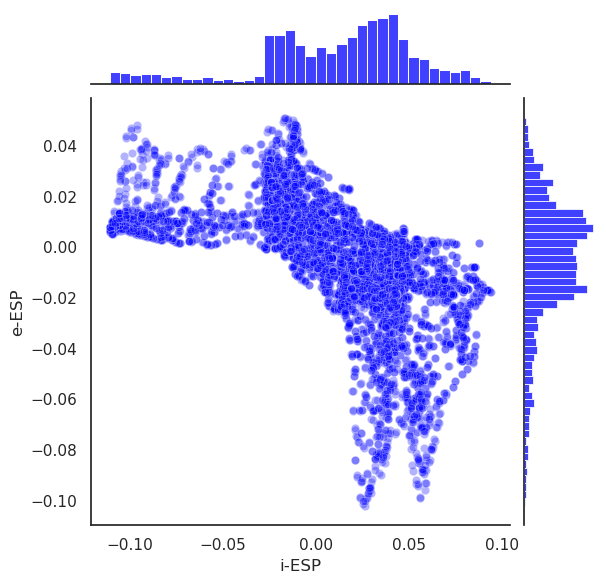

In [4]:
# int, exのデータから相関プロットを作成（ヒストグラムつき）

# 背景を白に設定
sns.set(style="white", color_codes=True)
# plt.figure(figsize=(10, 8))  # プロットのサイズを設定

# plt.rcParams['font.family']= 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']

# グラフを出力
sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")

plt.rcParams['font.size'] = 12
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['figure.subplot.left'] = 0.20

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_ESPAR_plot.png"
plt.savefig(output_fig_path)

In [7]:
# 分割の仕方：まずは負の領域を0~min(負の領域)で指定し、その負の領域で4分割する。（ex: 0~-2なら-1.5~-2の範囲を表示）

# product_dfの負の領域を取得
# 負の値のidx
negative_product_idx = product_df[product_df["φintφex"]<0].index
# 負の値の数
negative_product_num = len(product_df[product_df["φintφex"]<0])
# 負の値のdf
negative_product_df = product_df.iloc[negative_product_idx]

# 正の値のidx
positive_product_idx = product_df[product_df["φintφex"]>0].index
# 正の値の数
positive_product_num = len(product_df[product_df["φintφex"]>0])
# 正の値のdf
positive_product_df = product_df.iloc[positive_product_idx]

concat_df["negative_product"] = np.nan
concat_df["positive_product"] = np.nan

# concat_df["negative_product"]カラムを作成し、負の値ならそのまま、正なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] < 0:
        concat_df["negative_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["negative_product"].iloc[idx] = 0

# concat_df["positive_product"]カラムを作成し、正の値ならそのまま、負なら0を代入
for idx in range(len(product_df)):
    if product_df.iloc[idx][0] > 0:
        concat_df["positive_product"].iloc[idx] = product_df.iloc[idx][0]
    else:
        concat_df["positive_product"].iloc[idx] = 0


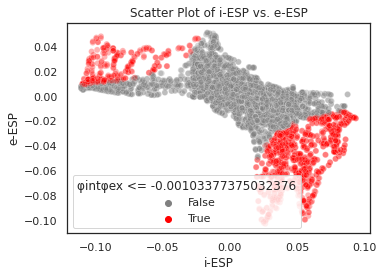

In [8]:
# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
percentage = 0.25

# negative_productの上位25%を取得(四捨五入してる)
over_threshold = round(negative_product_num * percentage)
# 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]

# 赤で描画するthresholdを設定
# 一番最後の行のnegative_productを取得
threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]

# negative_productの上位25%をグラフに表示
sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df['negative_product'] <= threshold, 
                palette={True: 'red', False: 'gray'}
               )
# sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
# sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


# グラフにタイトルとラベルを追加
plt.title("Scatter Plot of i-ESP vs. e-ESP")
plt.xlabel("i-ESP")
plt.ylabel("e-ESP")


# 凡例を調整
plt.legend(title='φintφex <= {}'.format(threshold), loc='best')

output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_test.png"
plt.savefig(output_fig_path)

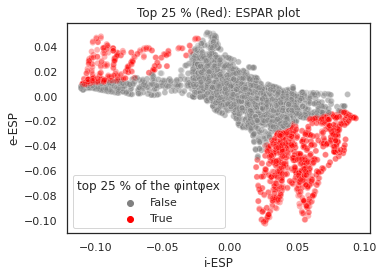

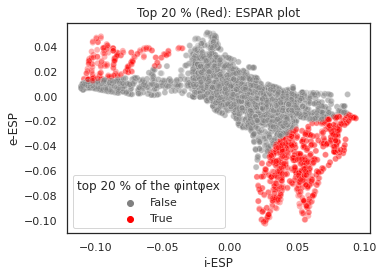

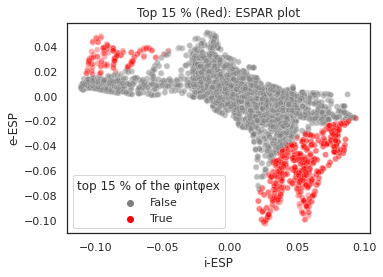

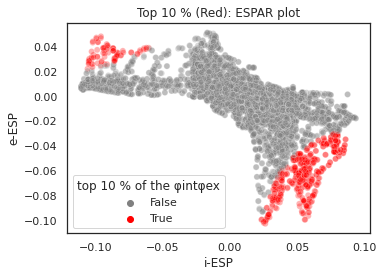

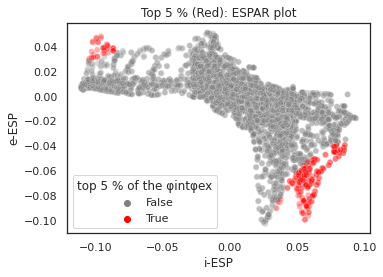

In [9]:
# for文で回して、90, 80, 70, 60, 50とpercentageごとにグラフを作成

# 上位何%を取り出すか？またはどの範囲を取り出すか？
# percentage変数ですが、10%なら0.1にしてください。
# percentageの値が0.01なら上位10%のプロットを赤で表示します
# 開始
start = 25
# 終了
stop = 0
# ステップ
step = -5

percentage_list = np.arange(start=start, stop=stop, step=step)

for percentage in percentage_list:
    # negative_productの上位XX%を取得(四捨五入してる)
    over_threshold = round(negative_product_num * (percentage*0.01))
    # 大きな負の値が最初に来るようにソートし、そのうちのmore_than_25より大きな行を取得
    over_threshold_df_negative = concat_df.sort_values("negative_product")[:over_threshold]
    over_threshold_df_negative_idx = over_threshold_df_negative.index.to_list()
    over_threshold_concat_df_negative = concat_df.iloc[over_threshold_df_negative_idx]
    
    # 赤で描画するthresholdを設定
    # 一番最後の行のnegative_productを取得
    threshold = over_threshold_df_negative[-1:]["negative_product"].iloc[-1]
    
#     それぞれの%のdfを保存
    percentage_column_name = f"Top {percentage} %"
    concat_df[percentage_column_name] = np.nan

    # concat_df[percentage_column_name]カラムを作成し、thresholdよりも
    for idx in range(len(concat_df)):
        if concat_df['negative_product'].iloc[idx] <= threshold:
            concat_df[percentage_column_name].iloc[idx] = product_df.iloc[idx][0]
        else:
            concat_df[percentage_column_name].iloc[idx] = 0

    # negative_productの上位25%をグラフに表示
    sns.scatterplot(x="i-ESP", 
                    y="e-ESP", 
                    data=concat_df, 
                    alpha=0.3, 
                    hue=concat_df['negative_product'] <= threshold, 
                    palette={True: 'red', False: 'gray'}
                   )
    # sns.jointplot(x="i-ESP", y="e-ESP", data=concat_df, alpha=0.3, color="blue")
    # sns.jointplot(x="i-ESP", y="e-ESP", data=more_than_25_concat_df_negative, alpha=0.3, color="red")


    # グラフにタイトルとラベルを追加
    plt.title(f"Top {percentage} % (Red): ESPAR plot")
    plt.xlabel("i-ESP")
    plt.ylabel("e-ESP")
    

    # 凡例を調整
    plt.legend(title='top {} % of the φintφex'.format(percentage), loc='best')

    output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_top_{percentage}%.png"
    plt.savefig(output_fig_path)
    plt.show()

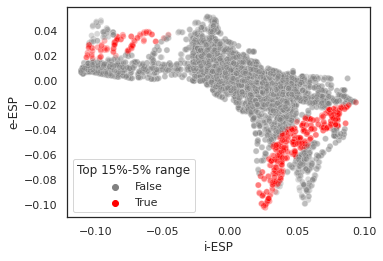

In [10]:
# 例えば30%以上20%以下の範囲にあるプロットを抽出したい場合
# 30%と20%の共通部分を0で置き換えればいい
start = 15
stop = 5
new_column_name = f"Top {start}%-{stop}% range"
percentage_column_name_start = f"Top {start} %"
percentage_column_name_stop = f"Top {stop} %"

concat_df[percentage_column_name_start]
concat_df[percentage_column_name_stop]

# 30%と20%の共通部分のindexを特定
common_index = concat_df[concat_df[percentage_column_name_start] == concat_df[percentage_column_name_stop]].index
# new_column_nameを作成し、共通部分は0で置き換える
concat_df[new_column_name] = concat_df[percentage_column_name_start].copy()  # "C"カラムを"B"カラムのコピーとして作成
concat_df.loc[common_index, new_column_name] = 0  # 共通部分を0で置き換え

sns.scatterplot(x="i-ESP", 
                y="e-ESP", 
                data=concat_df, 
                alpha=0.3, 
                hue=concat_df[new_column_name] != 0, 
                palette={True: 'red', False: 'gray'}
                )


output_fig_path = result_dir + id_name + "/" + dt_now + "_" + id_name + f"_ESPAR_plot_Top_{start}%-{stop}%.png"
plt.savefig(output_fig_path)

In [11]:
concat_df

,i-ESP,e-ESP,φintφex,negative_product,positive_product,Top 25 %,Top 20 %,Top 15 %,Top 10 %,Top 5 %,Top 15%-5% range
0,0.037759,-0.031392,-0.001185,-0.001185,0.0,-0.001185,0.000000,0.000000,0.0,0.0,0.000000
1,0.034955,-0.038615,-0.001350,-0.001350,0.0,-0.001350,-0.001350,0.000000,0.0,0.0,0.000000
2,0.037507,-0.030749,-0.001153,-0.001153,0.0,-0.001153,0.000000,0.000000,0.0,0.0,0.000000
3,0.038264,-0.029236,-0.001119,-0.001119,0.0,-0.001119,0.000000,0.000000,0.0,0.0,0.000000
4,0.036850,-0.030352,-0.001118,-0.001118,0.0,-0.001118,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6629,0.041245,-0.021426,-0.000884,-0.000884,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
6630,0.038669,-0.030749,-0.001189,-0.001189,0.0,-0.001189,0.000000,0.000000,0.0,0.0,0.000000
6631,0.036370,-0.040979,-0.001490,-0.001490,0.0,-0.001490,-0.001490,0.000000,0.0,0.0,0.000000
6632,0.034501,-0.052136,-0.001799,-0.001799,0.0,-0.001799,-0.001799,-0.001799,0.0,0.0,-0.001799


In [12]:
# ESPAR mapを作成するために、txtにlist形式でも保存
output_txt_path = result_dir + id_name + "/" + dt_now + "_" + id_name + "_concat_df_data.txt"
list_top_15_5_range = list(concat_df["Top 15%-5% range"].values)
list_top_5 = list(concat_df["Top 5 %"].values)
list_top_10 = list(concat_df["Top 10 %"].values)
list_top_15 = list(concat_df["Top 15 %"].values)
list_top_20 = list(concat_df["Top 15 %"].values)
list_top_25 = list(concat_df["Top 15 %"].values)


with open(output_txt_path, "w") as f:
    f.write("Top 15%-5% range list = " + str(list_top_15_5_range))
    f.write("\n\n\n\n\n\n")
    f.write("Top 5% list " + str(list_top_5))
    f.write("\n\n\n\n\n\n")
    f.write("Top 10% list " + str(list_top_10))
    f.write("\n\n\n\n\n\n")
    f.write("Top 15% list " + str(list_top_15))
    f.write("\n\n\n\n\n\n")
    f.write("Top 20% list " + str(list_top_15))
    f.write("\n\n\n\n\n\n")
    f.write("Top 25% list " + str(list_top_15))
    f.write("\n\n\n\n\n\n")
            